<a href="https://colab.research.google.com/github/OlhaAD/EDA_IDA_H_and_M_Python/blob/main/HandM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install squarify
!pip install -U -q PyDrive
!pip install -U kaleido
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 24.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import textwrap
import plotly.express as px
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
# Authentifizierung und Autorisierung / Аутентификация и авторизация
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Herunterladen von Dateien von Google Drive / Загрузка файлов с Google Диска
file_ids = {
    'articles': '1H-g4oAbw1ZjYDOncx3xU3oro3tH3UIg6',
    'customers': '1KLM7Vum2O35MR17ULRLneM0uGVX61-VR',
    'transactions': '18ESMoz4VDe_ZCZzRPKKZS-UargXvrRdi'
}

for name, file_id in file_ids.items():
    downloaded = drive.CreateFile({'id': file_id})
    downloaded.GetContentFile(f'{name}.csv')
    print(f'{name}.csv downloaded')

# Lesen der Daten in DataFrames / Чтение данных в DataFrame
df_articles = pd.read_csv('articles.csv')
df_customers = pd.read_csv('customers.csv')
df_transactions = pd.read_csv('transactions.csv')

articles.csv downloaded
customers.csv downloaded
transactions.csv downloaded


***ARTICLES***

In [ ]:
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   article_id                 105542 non-null  int64 
 1   prod_name                  105542 non-null  object
 2   product_type_name          105542 non-null  object
 3   product_group_name         105542 non-null  object
 4   graphical_appearance_name  105542 non-null  object
 5   colour_group_name          105542 non-null  object
 6   index_name                 105542 non-null  object
 7   index_group_name           105542 non-null  object
 8   section_name               105542 non-null  object
 9   garment_group_name         105542 non-null  object
 10  detail_desc                105126 non-null  object
dtypes: int64(1), object(10)
memory usage: 8.9+ MB


In [ ]:
df_articles.head()

article_id          prod_name product_type_name  product_group_name  \
0   108775015          Strap top          Vest top  Garment Upper body   
1   108775044          Strap top          Vest top  Garment Upper body   
2   108775051      Strap top (1)          Vest top  Garment Upper body   
3   110065001  OP T-shirt (Idro)               Bra           Underwear   
4   110065002  OP T-shirt (Idro)               Bra           Underwear   

  graphical_appearance_name colour_group_name        index_name  \
0                     Solid             Black        Ladieswear   
1                     Solid             White        Ladieswear   
2                    Stripe         Off White        Ladieswear   
3                     Solid             Black  Lingeries/Tights   
4                     Solid             White  Lingeries/Tights   

  index_group_name            section_name garment_group_name  \
0       Ladieswear  Womens Everyday Basics       Jersey Basic   
1       Ladieswear  Womens Everyday Basics       Jersey Basic   
2       Ladieswear  Womens Everyday Basics       Jersey Basic   
3       Ladieswear         Womens Lingerie  Under-, Nightwear   
4       Ladieswear         Womens Lingerie  Under-, Nightwear   

                                         detail_desc  
0            Jersey top with narrow shoulder straps.  
1            Jersey top with narrow shoulder straps.  
2            Jersey top with narrow shoulder straps.  
3  Microfibre T-shirt bra with underwired, moulde...  
4  Microfibre T-shirt bra with underwired, moulde...

In [ ]:
# Überprüfen des Wertebereichs in der Spalte 'article_id' / Проверка диапазона значений в столбце article_id
article_id_min = df_articles['article_id'].min()
article_id_max = df_articles['article_id'].max()
print(f"Mindestwert in article_id: {article_id_min}")
print(f"Maximalwert in article_id: {article_id_max}")

Mindestwert in article_id: 108775015
Maximalwert in article_id: 959461001


In [ ]:
# Konvertieren die Spalte 'article_id' von int64 in int32 / Преобразование столбца article_id из int64 в int32
df_articles['article_id'] = df_articles['article_id'].astype('int32')

In [ ]:
# Zählen der Anzahl eindeutiger Werte in jeder Spalte / Подсчет количества уникальных значений в каждом столбце
for col in df_articles.columns:
    un_n = df_articles[col].nunique()
    print(f'no of unique {col}: {un_n}')

no of unique article_id: 105542
no of unique prod_name: 45875
no of unique product_type_name: 131
no of unique product_group_name: 19
no of unique graphical_appearance_name: 30
no of unique colour_group_name: 50
no of unique index_name: 10
no of unique index_group_name: 5
no of unique section_name: 56
no of unique garment_group_name: 21
no of unique detail_desc: 43404


In [ ]:
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   article_id                 105542 non-null  int32 
 1   prod_name                  105542 non-null  object
 2   product_type_name          105542 non-null  object
 3   product_group_name         105542 non-null  object
 4   graphical_appearance_name  105542 non-null  object
 5   colour_group_name          105542 non-null  object
 6   index_name                 105542 non-null  object
 7   index_group_name           105542 non-null  object
 8   section_name               105542 non-null  object
 9   garment_group_name         105542 non-null  object
 10  detail_desc                105126 non-null  object
dtypes: int32(1), object(10)
memory usage: 8.5+ MB


product_group_name
Garment Upper body       42741
Garment Lower body       19812
Garment Full body        13292
Accessories              11158
Underwear                 5490
Shoes                     5283
Swimwear                  3127
Socks & Tights            2442
Nightwear                 1899
Unknown                    121
Underwear/nightwear         54
Cosmetic                    49
Bags                        25
Items                       17
Furniture                   13
Garment and Shoe care        9
Stationery                   5
Interior textile             3
Fun                          2
Name: count, dtype: int64


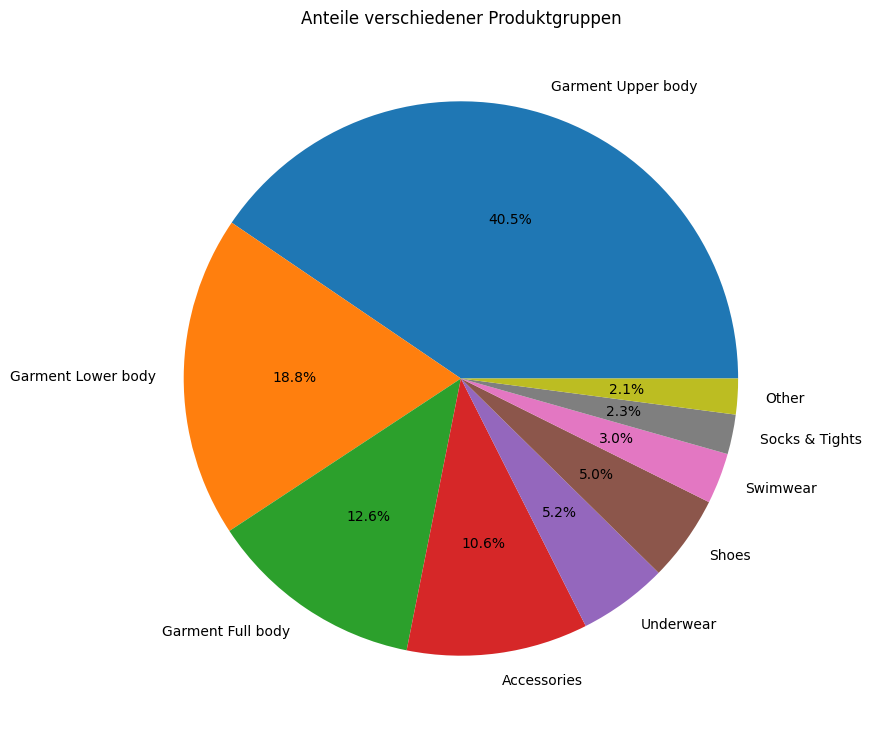

In [ ]:
# Zählen der Anzahl der Produkte in jeder der 19 Produktgruppen / Подсчет количества товаров в каждой из 19 групп продуктов
product_group_counts = df_articles['product_group_name'].value_counts()
print(product_group_counts)
# Berechnung des Prozentsatzes jeder Produktgruppen / Вычисление процента каждой группы продуктов
total_count = product_group_counts.sum()
product_group_percent = product_group_counts / total_count * 100

# Zusammenfassung von Produktgruppen, die weniger als 2 % der Gesamtmenge ausmachen / Объединение групп продуктов, которые составляют менее 2% от общего количества
threshold = 2
small_groups = product_group_percent[product_group_percent < threshold].index
product_group_counts['Other'] = product_group_counts[small_groups].sum()
product_group_counts = product_group_counts.drop(small_groups)

# Erstellen eines Kreisdiagramms / Построение круговой диаграммы
plt.figure(figsize=(10, 9))
product_group_counts.plot.pie(autopct='%1.1f%%')
plt.title('Anteile verschiedener Produktgruppen')
plt.ylabel('')
#plt.savefig('/content/ProductGroupPie.png')
plt.show()

In [ ]:
# Zählen der Anzahl der Produkttypen in jeder Produktgruppe / Подсчет количества типов продуктов в каждой группе продуктов
group_type_counts = df_articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']
pd.set_option('display.max_rows', None)
print(group_type_counts)

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

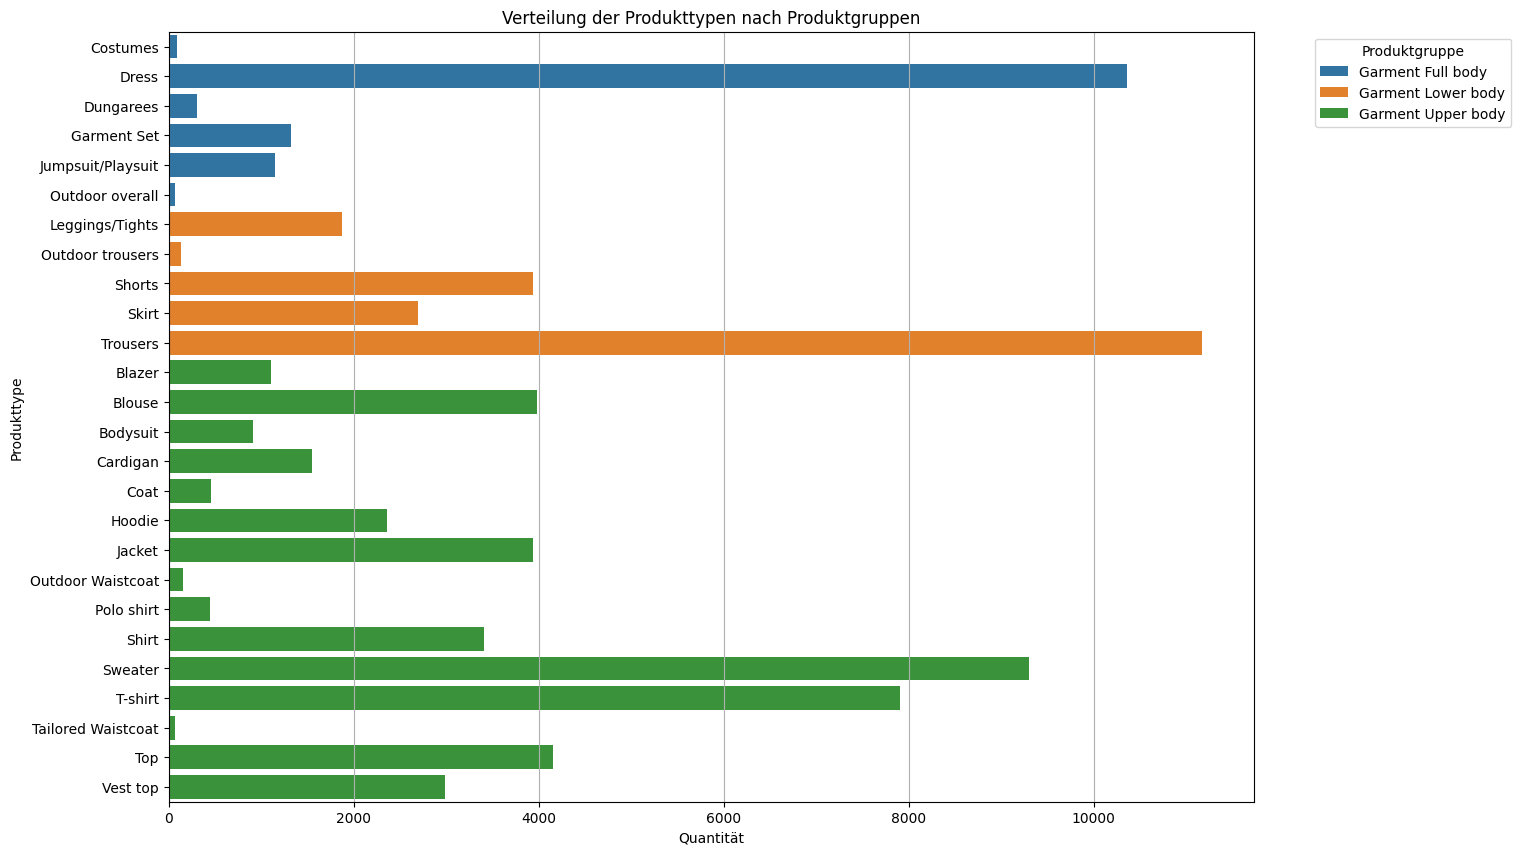

In [ ]:
# Filtern Sie Daten nach den drei größten Gruppen / Фильтрация данных для трех самых больших групп
top_groups = df_articles[df_articles['product_group_name'].isin(['Garment Full body', 'Garment Lower body', 'Garment Upper body'])]

# Zählen der Anzahl der Elemente jedes Typs in jeder Gruppe / Подсчет количества количества товаров каждого типа в каждой группе
group_type_counts = top_groups.groupby(['product_group_name', 'product_type_name']).size().reset_index(name='counts')

# Erstellen eines horizontal gruppierten Balkendiagramms. Verteilung der Produkttypen nach Produktgruppe
# Построение горизонтальной сгруппированной столбчатой диаграммы Распределения типов продуктов по группам продуктов
plt.figure(figsize=(14, 10))
sns.barplot(data=group_type_counts, x='counts', y='product_type_name', hue='product_group_name')
plt.title('Verteilung der Produkttypen nach Produktgruppen')
plt.xlabel('Quantität')
plt.ylabel('Produkttype')
plt.legend(title='Produktgruppe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x')
#plt.savefig('/content/ProductTypesIn3Groups.png')
plt.show()

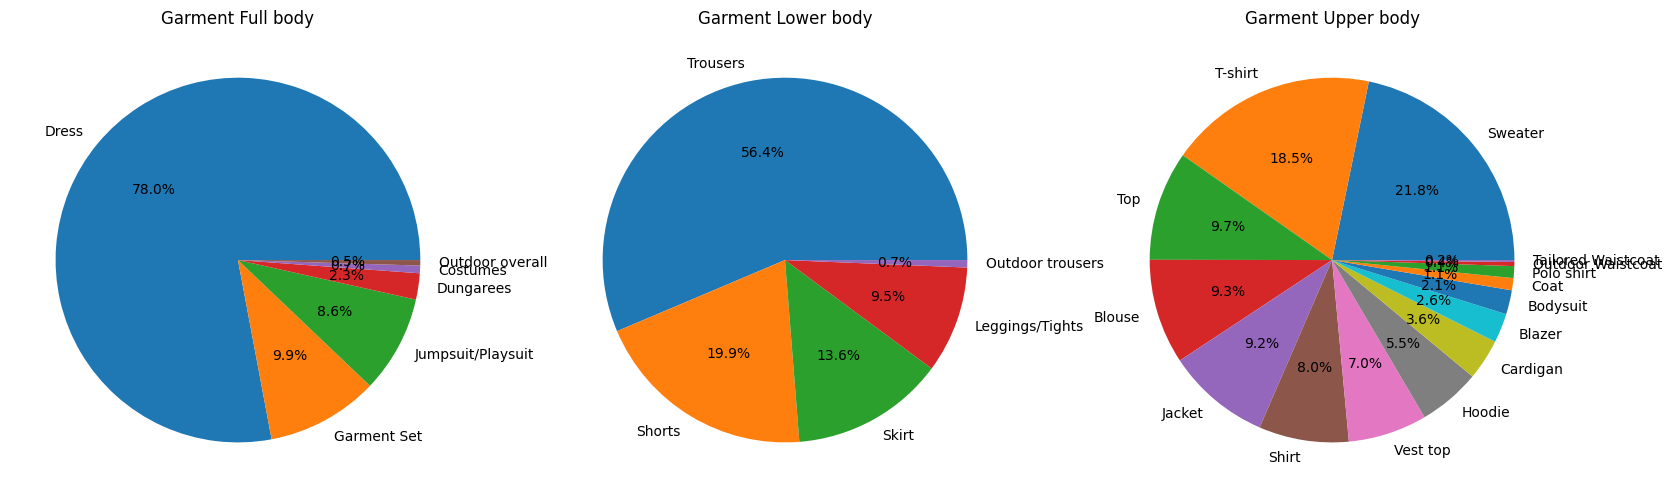

In [ ]:
# Filtern Sie Daten nach den drei größten Gruppen / Фильтрация данных для трех самых больших групп
top_groups = df_articles[df_articles['product_group_name'].isin(['Garment Full body', 'Garment Lower body', 'Garment Upper body'])]
# Zählen der Anzahl der Produkttypen in jeder Gruppe / Подсчет количества типов продуктов в каждой группе
full_body_counts = top_groups[top_groups['product_group_name'] == 'Garment Full body']['product_type_name'].value_counts()
lower_body_counts = top_groups[top_groups['product_group_name'] == 'Garment Lower body']['product_type_name'].value_counts()
upper_body_counts = top_groups[top_groups['product_group_name'] == 'Garment Upper body']['product_type_name'].value_counts()

# Kreisdiagramme erstellen / Построение круговых диаграмм
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

full_body_counts.plot.pie(ax=axs[0], autopct='%1.1f%%')
axs[0].set_title('Garment Full body')
axs[0].set_ylabel('')

lower_body_counts.plot.pie(ax=axs[1], autopct='%1.1f%%')
axs[1].set_title('Garment Lower body')
axs[1].set_ylabel('')

upper_body_counts.plot.pie(ax=axs[2], autopct='%1.1f%%')
axs[2].set_title('Garment Upper body')
axs[2].set_ylabel('')

plt.show()

graphical_appearance_name
Solid                  49747
All over pattern       17165
Melange                 5938
Stripe                  4990
Denim                   4842
Front print             3215
Placement print         3098
Check                   2178
Colour blocking         1830
Lace                    1513
Other structure         1502
Application/3D          1341
Embroidery              1165
Mixed solid/pattern     1132
Glittering/Metallic      958
Jacquard                 830
Sequin                   806
Dot                      681
Treatment                586
Other pattern            515
Contrast                 376
Metallic                 346
Chambray                 322
Slub                     153
Transparent               86
Mesh                      86
Neps                      66
Unknown                   52
Argyle                    15
Hologram                   8
Name: count, dtype: int64


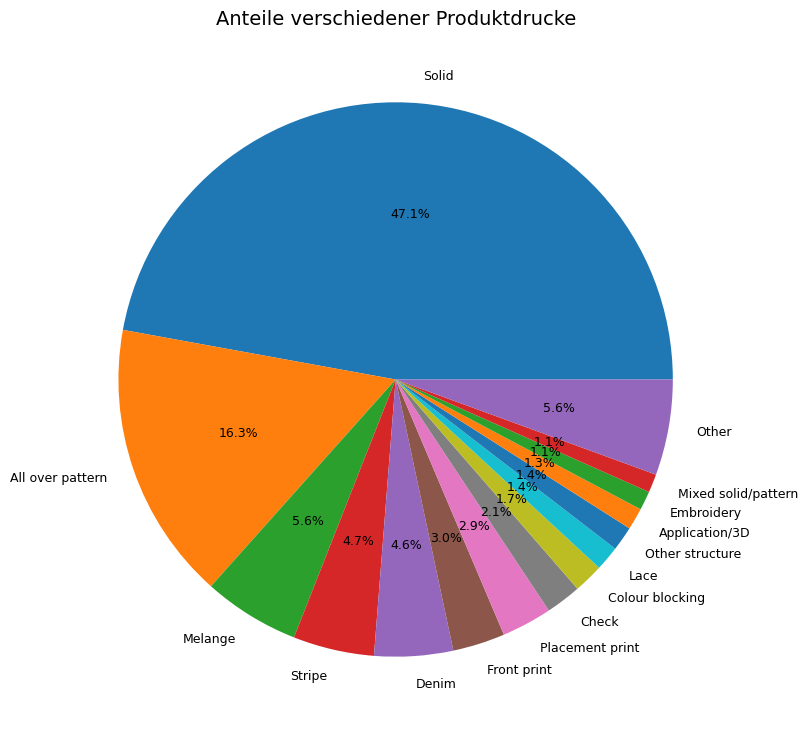

In [ ]:
# Zählen der Anzahl der Artikel für jeden der 30 verschiedenen Drucke / Подсчет количества товаров для каждого из 30 различных принтов
graphical_counts = df_articles['graphical_appearance_name'].value_counts()
print(graphical_counts)
# Berechnung des Prozentsatzes jedes Produktdrucks / Вычисление процента каждого принта товаров
total_graphical_counts = graphical_counts.sum()
graphical_percent = graphical_counts / total_graphical_counts * 100

# Zusammenfassung von Produktdrucke, die weniger als 1 % der Gesamtmenge ausmachen / Объединение принтов продуктов, которые составляют менее 1% от общего количества
threshold = 1
small_groups = graphical_percent[graphical_percent < threshold].index
graphical_counts['Other'] = graphical_counts[small_groups].sum()
graphical_counts = graphical_counts.drop(small_groups)

# Erstellen eines Kreisdiagramms / Построение круговой диаграммы
plt.figure(figsize=(10, 9))
graphical_counts.plot.pie(autopct='%1.1f%%', fontsize=9)
plt.title('Anteile verschiedener Produktdrucke', fontsize=14)
plt.ylabel('')  # Уменьшаем размер шрифта меток по вертикали
#plt.savefig('/content/ProductDruckePie.png')
plt.show()

colour_group_name
Black              22670
Dark Blue          12171
White               9542
Light Pink          5811
Grey                4487
Light Beige         3356
Blue                3308
Red                 3056
Light Blue          3012
Greenish Khaki      2767
Dark Grey           2731
Off White           2726
Beige               2712
Dark Red            2340
Dark Green          2106
Light Grey          2105
Pink                2063
Yellow              1645
Light Orange        1520
Yellowish Brown     1471
Gold                1377
Dark Beige          1084
Light Turquoise     1027
Light Yellow         984
Dark Orange          886
Dark Pink            818
Green                815
Orange               779
Other Pink           750
Silver               709
Light Green          681
Dark Yellow          574
Light Purple         553
Dark Turquoise       473
Turquoise            435
Dark Purple          315
Light Red            285
Greyish Beige        226
Other Yellow         225
Purple 

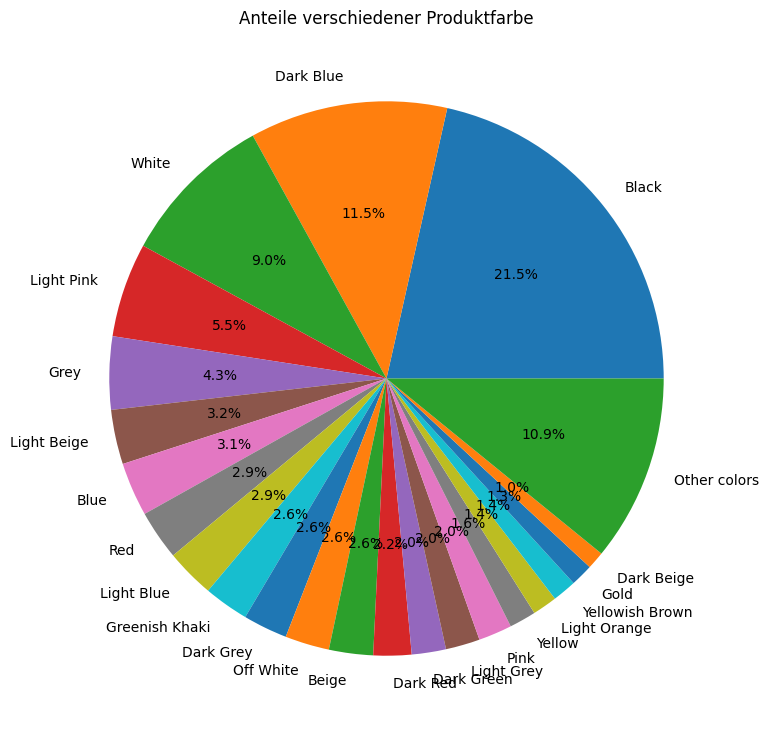

In [ ]:
# Zählen der Anzahl der Artikel für jeden der 50 verschiedenen Farben / Подсчет количества товаров для каждого из 50 различных цветов
colors_counts = df_articles['colour_group_name'].value_counts()
print(colors_counts)
# Berechnung des Prozentsatzes jedes Produktfarbs / Вычисление процента каждого цвета товаров
total_colors_counts = colors_counts.sum()
colors_percent = colors_counts / total_colors_counts * 100

# Zusammenfassung von Produkte, die weniger als 1 % der Gesamtmenge ausmachen / Объединение продуктов, которые составляют менее 1% от общего количества
threshold = 1
small_groups = colors_percent[colors_percent < threshold].index
colors_counts['Other colors'] = colors_counts[small_groups].sum()
colors_counts = colors_counts.drop(small_groups)

# Erstellen eines Kreisdiagramms / Построение круговой диаграммы
plt.figure(figsize=(10, 9))
colors_counts.plot.pie(autopct='%1.1f%%')
plt.title('Anteile verschiedener Produktfarbe')
plt.ylabel('')
plt.show()

In [ ]:
# Zählen der Anzahl der Artikel für jeden der 50 verschiedenen Farben / Подсчет количества товаров для каждого из 50 различных цветов
colors_counts = df_articles['colour_group_name'].value_counts()

# Berechnung des Prozentsatzes jedes Produktfarbs / Вычисление процента каждого цвета товаров
total_colors_counts = colors_counts.sum()
colors_percent = colors_counts / total_colors_counts * 100

# Zusammenfassung von Produkte, die weniger als 1 % der Gesamtmenge ausmachen / Объединение продуктов, которые составляют менее 1% от общего количества
threshold = 1
small_groups = colors_percent[colors_percent < threshold].index
colors_counts['Other colors'] = colors_counts[small_groups].sum()
colors_percent['Other colors'] = colors_counts['Other colors'] / total_colors_counts * 100
colors_counts = colors_counts.drop(small_groups)
print(colors_percent['Other colors'])
print(colors_counts)

10.879081313600272
colour_group_name
Black              22670
Dark Blue          12171
White               9542
Light Pink          5811
Grey                4487
Light Beige         3356
Blue                3308
Red                 3056
Light Blue          3012
Greenish Khaki      2767
Dark Grey           2731
Off White           2726
Beige               2712
Dark Red            2340
Dark Green          2106
Light Grey          2105
Pink                2063
Yellow              1645
Light Orange        1520
Yellowish Brown     1471
Gold                1377
Dark Beige          1084
Other colors       11482
Name: count, dtype: int64


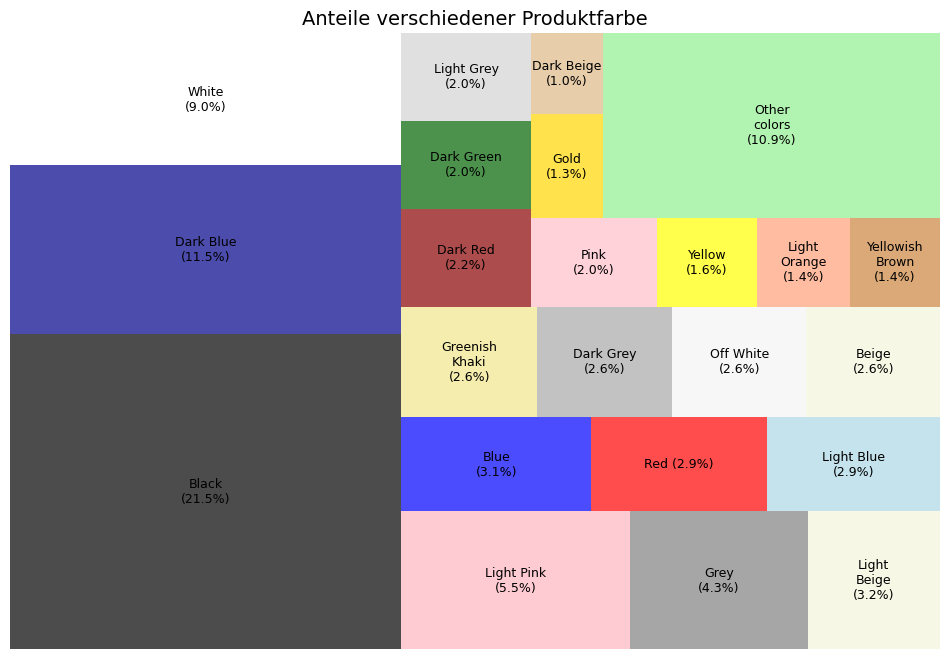

In [ ]:
# Erstellen eines Wörterbuchs, das Farbgruppen ihren tatsächlichen Farben zuordnet / Создание словаря, сопоставляющего цветовые группы и их фактические цвета
color_dict = {
    'Black': 'black',
    'Dark Blue': 'darkblue',
    'White': 'white',
    'Light Pink': 'lightpink',
    'Grey': 'grey',
    'Light Beige': 'beige',
    'Blue': 'blue',
    'Red': 'red',
    'Light Blue': 'lightblue',
    'Greenish Khaki': 'khaki',
    'Dark Grey': 'darkgrey',
    'Off White': 'whitesmoke',
    'Beige': 'beige',
    'Dark Red': 'darkred',
    'Dark Green': 'darkgreen',
    'Light Grey': 'lightgrey',
    'Pink': 'pink',
    'Yellow': 'yellow',
    'Light Orange': 'lightsalmon',
    'Yellowish Brown': 'peru',
    'Gold': 'gold',
    'Dark Beige': 'burlywood',
    'Other colors': 'lightgreen'
}

# Erstellen einer Farbliste für eine Treemap / Создание списка цветов для Treemap
colors = [color_dict.get(color, 'lightgray') for color in colors_counts.index]
# Funktion zum Formatieren von Beschriftungen mit Zeilenumbrüchen / Функция для форматирования меток с переносом строки
def wrap_labels_with_percent(labels, percents, width=10):
    wrapped_labels = []
    for label, percent in zip(labels, percents):
        if label == 'Other colors':
            percent = colors_percent['Other colors']
        wrapped_label = f"{label}\n({percent:.1f}%)"
        wrapped_labels.append('\n'.join(textwrap.wrap(wrapped_label, width)))
    return wrapped_labels

wrapped_labels = wrap_labels_with_percent(colors_counts.index, colors_percent)
# Erstellen einer Treemap / Построение Treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=colors_counts, label=wrapped_labels, color=colors, alpha=0.7, text_kwargs={'fontsize': 9})
plt.axis('off')
plt.title('Anteile verschiedener Produktfarbe', fontsize=14)
#plt.savefig('/content/ProductColorsTreemap.png')
plt.show()


index_name
Ladieswear                        26001
Divided                           15149
Menswear                          12553
Children Sizes 92-140             12007
Children Sizes 134-170             9214
Baby Sizes 50-98                   8875
Ladies Accessories                 6961
Lingeries/Tights                   6775
Children Accessories, Swimwear     4615
Sport                              3392
Name: count, dtype: int64


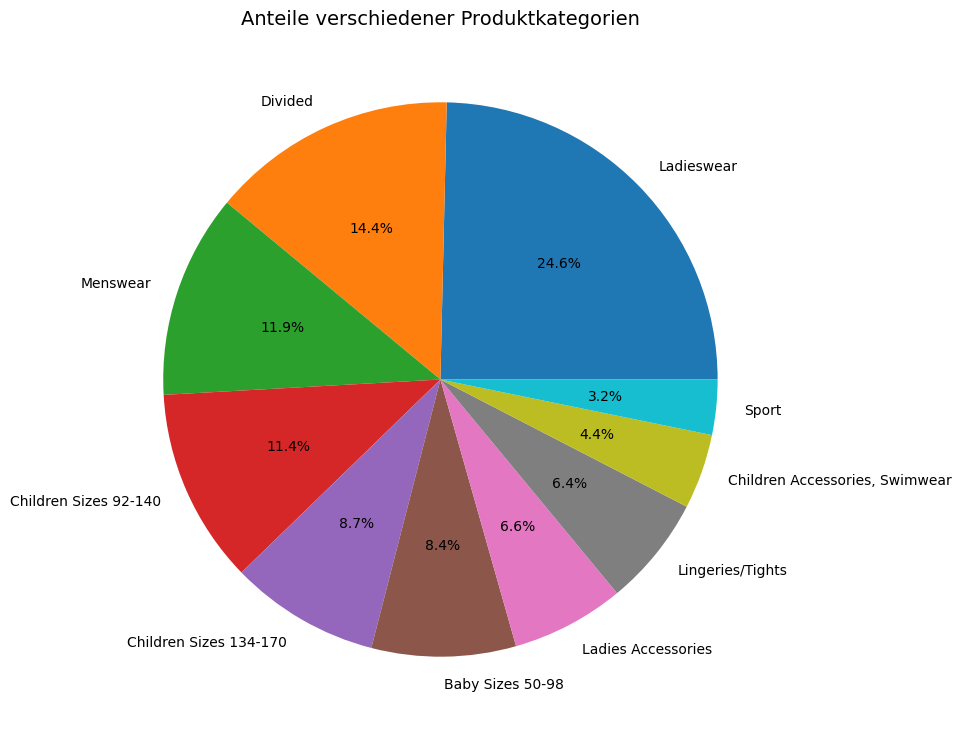

In [ ]:
# Zählen der Anzahl der Produkte in jeder Kategorie / Подсчет количества товаров в каждой категории
index_counts = df_articles['index_name'].value_counts()
print(index_counts)

# Erstellen eines Kreisdiagramms / Построение круговой диаграммы
plt.figure(figsize=(10, 9))
index_counts.plot.pie(autopct='%1.1f%%')
plt.title('Anteile verschiedener Produktkategorien', fontsize=14)
plt.ylabel('')
#plt.savefig('/content/ProductIndexPie.png')
plt.show()

In [ ]:
# Zählen der Anzahl der Produkte in jeder Unterkategorie / Подсчет количества продуктов в каждой подкатегории
index_group_counts = df_articles.groupby(['index_group_name', 'index_name']).count()['article_id']
pd.set_option('display.max_rows', None)
print(index_group_counts)

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64


In [ ]:
# Zählen der Anzahl der Produkte in jeder Sektion / Подсчет количества товаров в каждой секции
section_counts = df_articles['section_name'].value_counts()
print(section_counts)

section_name
Womens Everyday Collection        7295
Divided Collection                7124
Baby Essentials & Complements     4932
Kids Girl                         4469
Young Girl                        3899
Womens Lingerie                   3598
Girls Underwear & Basics          3490
Womens Tailoring                  3376
Kids Boy                          3328
Womens Small accessories          3270
Womens Casual                     2725
Kids Outerwear                    2665
Womens Trend                      2622
Divided Projects                  2364
Young Boy                         2352
H&M+                              2337
Men Underwear                     2322
Mama                              2266
Kids & Baby Shoes                 2142
Boys Underwear & Basics           2034
Womens Shoes                      2026
Ladies H&M Sport                  1894
Womens Swimwear, beachwear        1839
Contemporary Smart                1778
Baby Girl                         1760
Divided Acce

In [ ]:
!pip install -U kaleido plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 27.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
color_scheme = px.colors.qualitative.G10
# Zählen der Anzahl der Produkte in jeder Sektion unter Berücksichtigung der Hierarchie / Подсчет количества продуктов в каждой секции с учетом иерархии
section_group_counts = df_articles.groupby(['index_group_name', 'index_name', 'section_name']).count()['article_id']
pd.set_option('display.max_rows', None)

# Daten in einen Datenrahmen konvertieren und Indizes zurücksetzen / Преобразование данных в датафрейм и сброс индексов
section_group_counts = pd.DataFrame(section_group_counts)
section_group_counts = section_group_counts.reset_index()

# Erstellen eines Sunburst-Diagramms / Создание Sunburst диаграммы
fig = px.sunburst(
    section_group_counts,
    path=['index_group_name', 'index_name', 'section_name'],
    values='article_id',
    title='Verteilung der Produkte in verschiedenen Kategorien',
    width=1000,
    height=1000,
    color_discrete_sequence=color_scheme  # Настройка цветовой схемы
)
# Schriftarteinstellungen / Настройка шрифта
fig.update_traces(textinfo='label+percent entry', textfont_size=18)

# Header Einstellungen / Настройка заголовка
fig.update_layout(title={'text': 'Verteilung der Produkte in verschiedenen Kategorien', 'x': 0.5, 'xanchor': 'center', 'font': {'size': 26}})
fig.write_image('/content/ProductSectionsInCategories.png')
fig.show()

In [ ]:
color_scheme = px.colors.qualitative.G10
# Funktion zum Erstellen und Speichern von Sunburst-Diagrammen ohne index_group_name / Функция для создания и сохранения sunburst диаграмм без index_group_name
def create_sunburst(df, main_category, color_scheme):
    section_group_counts = df[df['index_group_name'] == main_category].groupby(['index_name', 'section_name']).count()['article_id']
    section_group_counts = pd.DataFrame(section_group_counts).reset_index()

    fig = px.sunburst(
        section_group_counts,
        path=['index_name', 'section_name'],
        values='article_id',
        title=f'Verteilung der Produkte in {main_category}',
        width=1000,
        height=1000,
        color_discrete_sequence=color_scheme
    )

    fig.update_traces(textinfo='label+percent entry', textfont_size=18)
    fig.update_layout(
        title={
            'text': f'Verteilung der Produkte in {main_category}',
            'x': 0.5,
            'xanchor': 'center',
            'font': {'size': 26}
        }
    )

    safe_category = main_category.replace('/', '_')
    #fig.write_image(f'/content/ProductSectionsIn{safe_category}.png')
    fig.show()

# Hauptkategorien / Основные категории
categories = ["Ladieswear", "Baby/Children"]
# Erstellen und speichern Sie Diagramme für jede Kategorie mit G10-Farbschema / Создание и сохранение диаграмм для каждой категории с цветовой схемой G10
for category in categories:
    create_sunburst(df_articles, category, color_scheme)

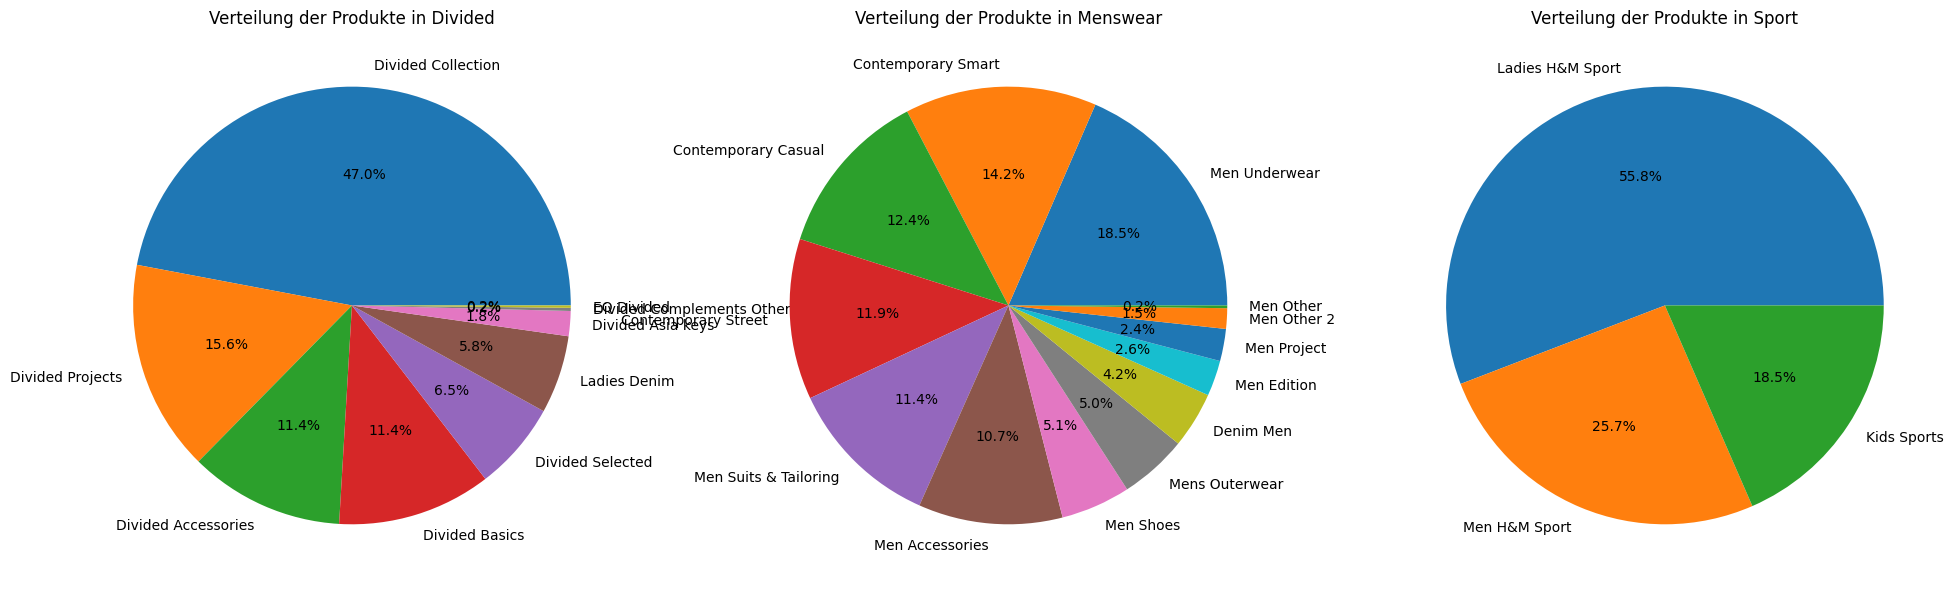

In [ ]:
# Filtern Sie Daten für die drei verbleibenden Unterkategorien /  Фильтрация данных для трех оставшихся подкатегорий
index_groups = df_articles[df_articles['index_name'].isin(['Divided', 'Menswear', 'Sport'])]
# Zählen der Anzahl der Produktabschnitte in jeder Unterkategorie / Подсчет количества секций продуктов в каждой подкатегории
divided_counts = index_groups[index_groups['index_name'] == 'Divided']['section_name'].value_counts()
menswear_counts = index_groups[index_groups['index_name'] == 'Menswear']['section_name'].value_counts()
sport_counts = index_groups[index_groups['index_name'] == 'Sport']['section_name'].value_counts()

# Kreisdiagramme erstellen / Построение круговых диаграмм
fig, axs = plt.subplots(1, 3, figsize=(24, 10))

divided_counts.plot.pie(ax=axs[0], autopct='%1.1f%%')
axs[0].set_title('Verteilung der Produkte in Divided')
axs[0].set_ylabel('')

menswear_counts.plot.pie(ax=axs[1], autopct='%1.1f%%')
axs[1].set_title('Verteilung der Produkte in Menswear')
axs[1].set_ylabel('')

sport_counts.plot.pie(ax=axs[2], autopct='%1.1f%%')
axs[2].set_title('Verteilung der Produkte in Sport')
axs[2].set_ylabel('')

plt.show()

               garment_group_name  counts
0                    Jersey Fancy   21445
1                     Accessories   11519
2                    Jersey Basic    8126
3                        Knitwear    7490
4               Under-, Nightwear    7441
5                        Trousers    6727
6                         Blouses    5838
7                           Shoes    5145
8                  Dresses Ladies    4874
9                         Outdoor    4501
10                        Unknown    3873
11                 Trousers Denim    3100
12                       Swimwear    2787
13               Socks and Tights    2272
14                         Shirts    2116
15  Woven/Jersey/Knitted mix Baby    1965
16                         Shorts    1559
17           Dresses/Skirts girls    1541
18                         Skirts    1254
19                 Special Offers    1061
20                        Dressed     908


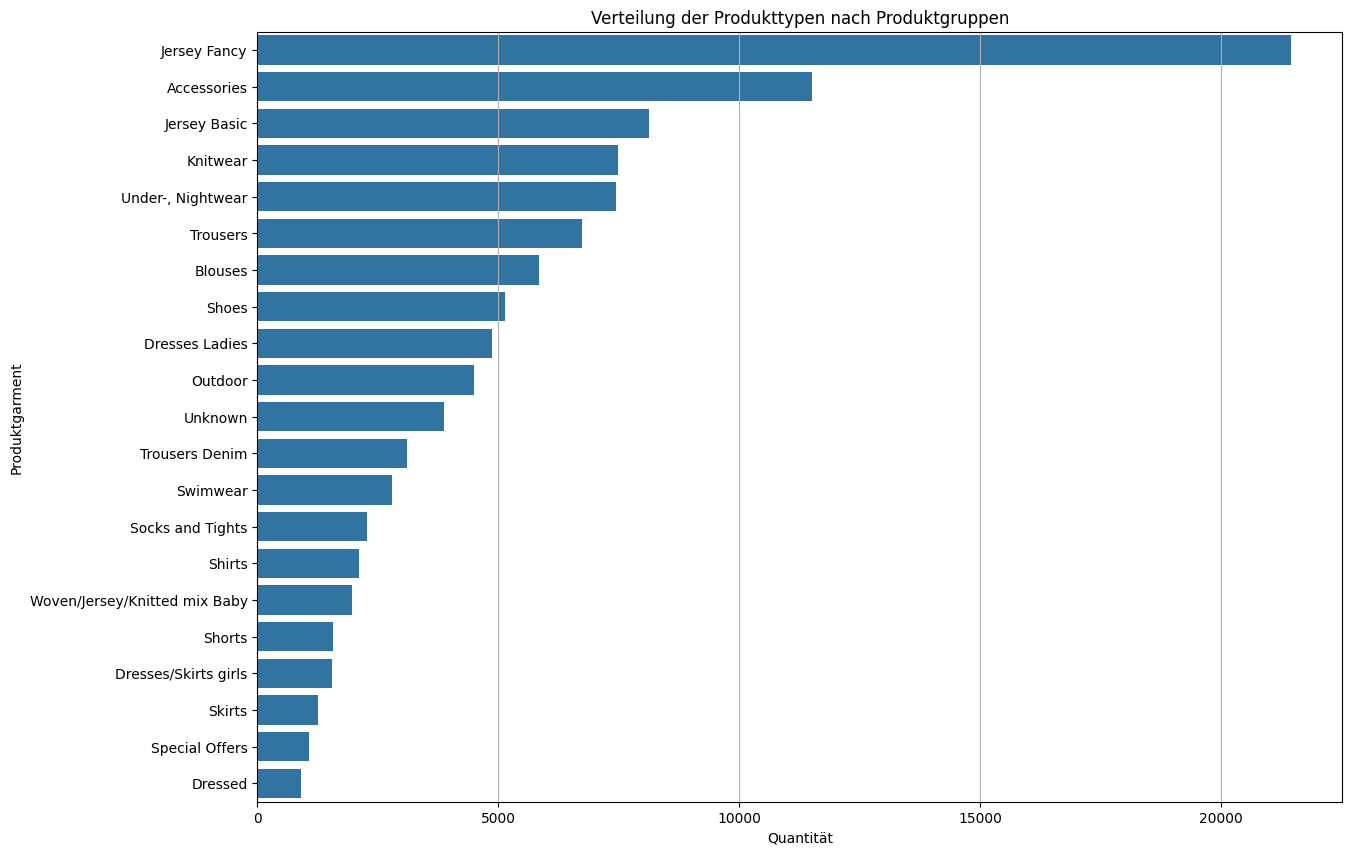

In [ ]:
# Zählen der Anzahl der Produkte in jeder der 21 Kategorien / Подсчет количества товаров в каждой из 21 категорий
garment_group_counts = df_articles['garment_group_name'].value_counts().reset_index()
garment_group_counts.columns = ['garment_group_name', 'counts']
print(garment_group_counts)

# Erstellen eines horizontalen Balkendiagramms / Построение горизонтальной сгруппированной столбчатой диаграммы
plt.figure(figsize=(14, 10))
sns.barplot(data=garment_group_counts, x='counts', y='garment_group_name')
plt.title('Verteilung der Produkte nach Kategorie')
plt.xlabel('Quantität')
plt.ylabel('Produktgarment')
plt.grid(axis='x')
plt.show()

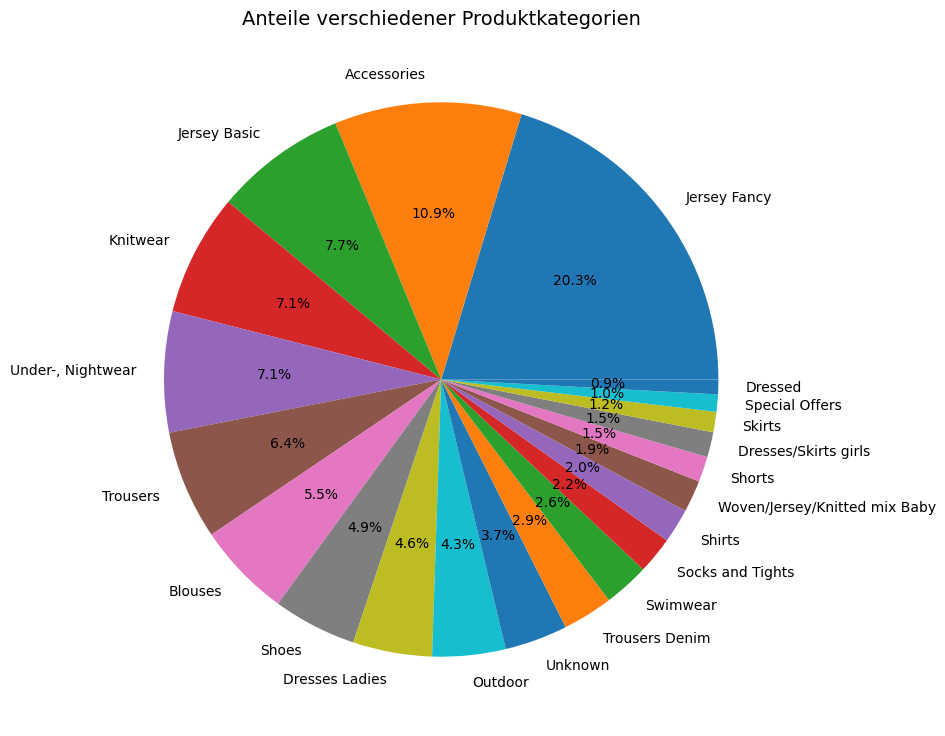

In [ ]:
# Zählen der Anzahl der Produkte in jeder der 21 Kategorien / Подсчет количества товаров в каждой из 21 категорий
garment_group_counts = df_articles['garment_group_name'].value_counts()

# Erstellen eines Kreisdiagramms / Построение круговой диаграммы
plt.figure(figsize=(10, 9))
garment_group_counts.plot.pie(autopct='%1.1f%%')
plt.title('Anteile verschiedener Produktkategorien', fontsize=14)
plt.ylabel('')
#plt.savefig('/content/ProductGarmentPie.png')
plt.show()

***CUSTOMERS***

In [4]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   Active                  464404 non-null   float64
 2   club_member_status      1365918 non-null  object 
 3   fashion_news_frequency  1355969 non-null  object 
 4   age                     1356119 non-null  float64
 5   postal_code             1371980 non-null  object 
dtypes: float64(2), object(4)
memory usage: 62.8+ MB


In [5]:
# Überprüfen der Anzahl eindeutiger Werte in 'customer_id' / Проверка количества уникальных значений в 'customer_id'
unique_customer_ids = df_customers['customer_id'].nunique()
total_customer_ids = len(df_customers)
print(f"Anzahl der eindeutigen Werte in customer_id: {unique_customer_ids}")
print(f"Gesamtzahl der Datensätze: {total_customer_ids}")

Anzahl der eindeutigen Werte in customer_id: 1371980
Gesamtzahl der Datensätze: 1371980


In [6]:
df_customers.describe()

Active           age
count  464404.0  1.356119e+06
mean        1.0  3.638696e+01
std         0.0  1.431363e+01
min         1.0  1.600000e+01
25%         1.0  2.400000e+01
50%         1.0  3.200000e+01
75%         1.0  4.900000e+01
max         1.0  9.900000e+01

In [7]:
df_customers.head()

customer_id  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4  25fa5ddee9aac01b35208d01736e57942317d756b32ddd...

In [8]:
for col in df_customers.columns:
    un_n = df_customers[col].nunique()
    print(f'no of unique {col}: {un_n}')

no of unique customer_id: 1371980
no of unique Active: 1
no of unique club_member_status: 3
no of unique fashion_news_frequency: 3
no of unique age: 84
no of unique postal_code: 352899


In [9]:
# Konvertieren der Spalte 'age' in einen Ganzzahltyp / Преобразование столбца 'age' в целочисленный тип
df_customers['age'] = df_customers['age'].fillna(0).astype('uint8')

In [10]:
df_customers['Active'].unique()

array([nan,  1.])

In [11]:
# Konvertieren Sie nan in False und 1 in True für die Spalte 'Aktiv' / Преобразование nan в False и 1 в True для столбца 'Active'
df_customers['Active'] = df_customers['Active'].fillna(0).astype(bool)

In [17]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   customer_id             1371980 non-null  object  
 1   Active                  1371980 non-null  bool    
 2   club_member_status      1371980 non-null  category
 3   fashion_news_frequency  1371980 non-null  category
 4   age                     1371980 non-null  uint8   
 5   postal_code             1371980 non-null  object  
dtypes: bool(1), category(2), object(2), uint8(1)
memory usage: 26.2+ MB


Active
False    907576
True     464404
Name: count, dtype: int64


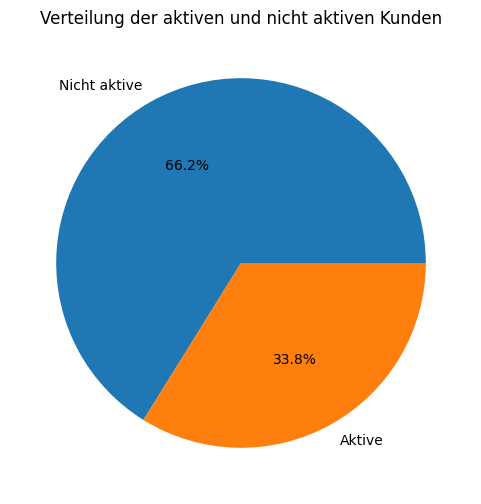

In [12]:
# Zählen der Anzahl eindeutiger Werte in 'Active' / Подсчет количества уникальных значений в 'Active'
active_counts = df_customers['Active'].value_counts()
print(active_counts)
# Erstellen eines Kreisdiagramms / Построение круговой диаграммы
labels = {True: 'Aktive', False: 'Nicht aktive'}
plt.figure(figsize=(6, 6))
active_counts.plot.pie(autopct='%1.1f%%', labels=[labels[i] for i in active_counts.index])
plt.title('Verteilung der aktiven und nicht aktiven Kunden')
plt.ylabel('')
#plt.savefig('/content/ActiveClientsPie.png')
plt.show()


In [13]:
df_customers['club_member_status'].unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [14]:
# Преобразование club_member_status в категориальный тип и замена nan на 'NONE':
df_customers['club_member_status'] = df_customers['club_member_status'].fillna('NONE').astype('category')

club_member_status
ACTIVE        1272491
PRE-CREATE      92960
NONE             6062
LEFT CLUB         467
Name: count, dtype: int64


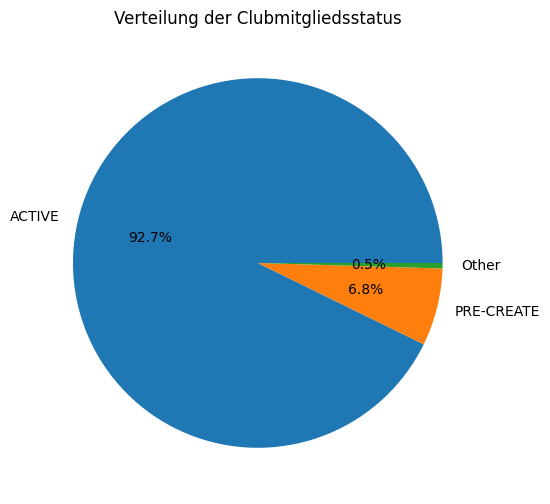

In [ ]:
# Zählen der Anzahl eindeutiger Werte in 'club_member_status' / Подсчет количества уникальных значений в 'club_member_status'
status_counts = df_customers['club_member_status'].value_counts()
print(status_counts)

# Berechnung des Prozentsatzes jedes Status / Вычисление процента каждого статуса
total_status_counts = status_counts.sum()
status_percent = status_counts / total_status_counts * 100

# Zusammenfassung von Statusen, die weniger als 1 % der Gesamtmenge ausmachen / Объединение cтатусов, которые составляют менее 1% от общего количества
threshold = 1
small_groups = status_percent[status_percent < threshold].index
status_counts['Other'] = status_counts[small_groups].sum()
status_percent['Other'] = status_counts['Other'] / total_status_counts * 100
status_counts = status_counts.drop(small_groups)

# Erstellen eines Kreisdiagramms / Построение круговой диаграммы
plt.figure(figsize=(6, 6))
status_counts.plot.pie(autopct='%1.1f%%')
plt.title('Verteilung der Clubmitgliedsstatus')
plt.ylabel('')
#plt.savefig('/content/ClubStatusClientPie.png')
plt.show()

In [15]:
df_customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly'], dtype=object)

fashion_news_frequency
NONE         893722
Regularly    477416
Monthly         842
Name: count, dtype: int64


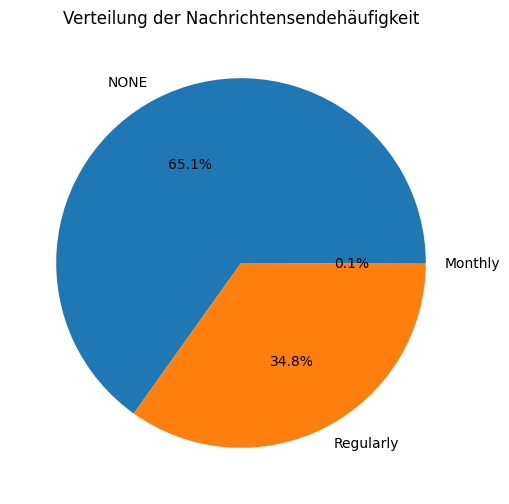

In [16]:
# Konvertieren Sie 'fashion_news_frequency' in einen kategorialen Typ und ersetzen Sie nan durch 'NONE' / Преобразование 'fashion_news_frequency' в категориальный тип и замена nan на 'NONE'
df_customers['fashion_news_frequency'] = df_customers['fashion_news_frequency'].fillna('NONE').astype('category')
# Analyse der Sendehäufigkeit von Nachrichten / Анализ частоты отправки новостей
fashion_news_counts = df_customers['fashion_news_frequency'].value_counts()
print(fashion_news_counts)

# Erstellen eines Kreisdiagramms / Построение круговой диаграммы
plt.figure(figsize=(6, 6))
fashion_news_counts.plot.pie(autopct='%1.1f%%')
plt.title('Verteilung der Nachrichtensendehäufigkeit')
plt.ylabel('')
#plt.savefig('/content/FashionNewsFrequencytPie.png')
plt.show()

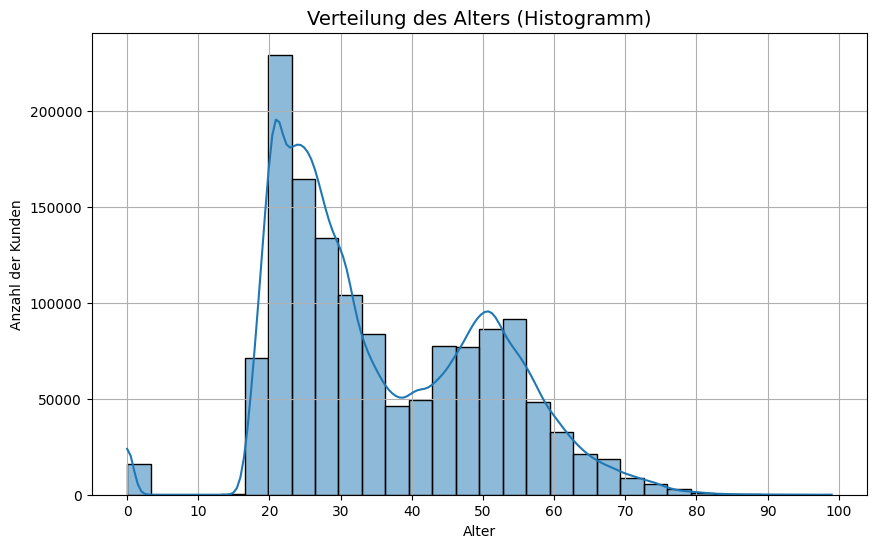

In [ ]:
# Visualisierung der Altersverteilung mithilfe eines Histogramms / Визуализация распределения возраста с помощью гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(df_customers['age'], bins=30, kde=True)
plt.title('Verteilung des Alters (Histogramm)', fontsize=14)
plt.xlabel('Alter')
plt.ylabel('Anzahl der Kunden')
plt.grid(True)
plt.xticks(range(0, df_customers['age'].max() + 10, 10))
#plt.savefig('/content/ClientsAgeHistogramm.png')
plt.show()

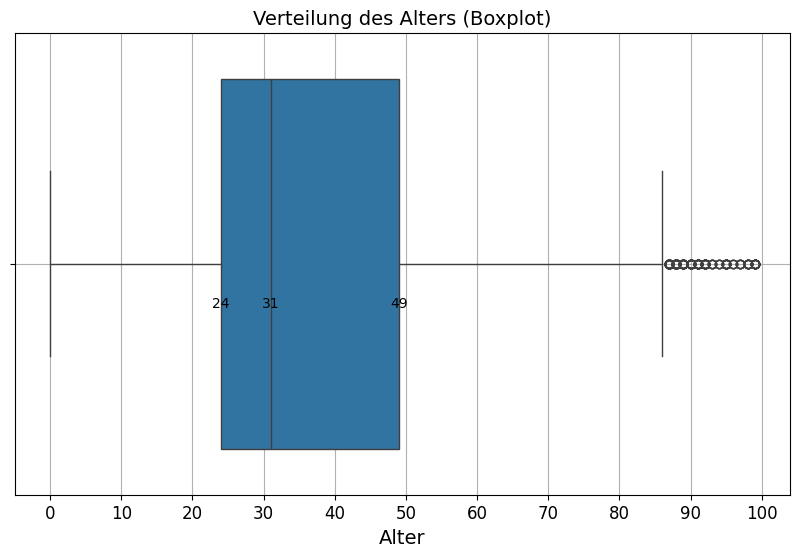

In [ ]:
# Visualisierung der Altersverteilung mithilfe eines Boxplots / Визуализация распределения возраста с помощью box plot
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x=df_customers['age'])
plt.title('Verteilung des Alters (Boxplot)', fontsize=14)
plt.xlabel('Alter', fontsize=14)
plt.grid(True)

# Berechnung von Quartilen / Вычисление квартилей
quartiles = df_customers['age'].quantile([0.25, 0.5, 0.75]).values

# Anmerkungen für Quartile hinzufügen / Добавление аннотаций для квартилей
for q, value in zip([0.25, 0.5, 0.75], quartiles):
    plt.annotate(f'{value:.0f}', xy=(value, 0.02), xytext=(value, 0.1),
                 textcoords='data', ha='center', va='bottom',
                 fontsize=10, color='black')

plt.xticks(range(0, df_customers['age'].max() + 10, 10), fontsize=12)
#plt.savefig('/content/ClientsAgeBoxPlot.png')
plt.show()

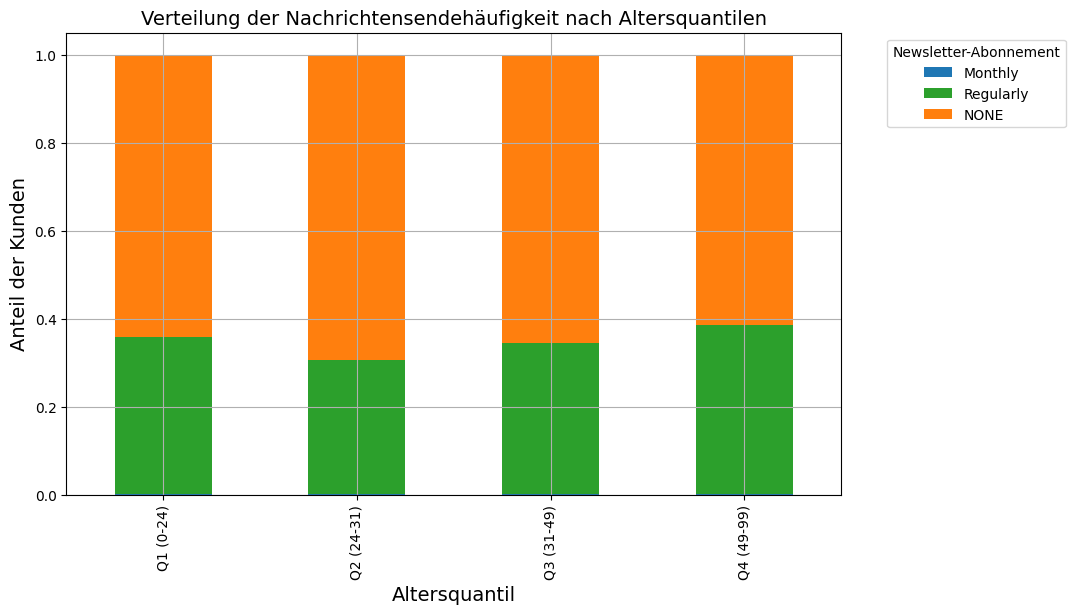

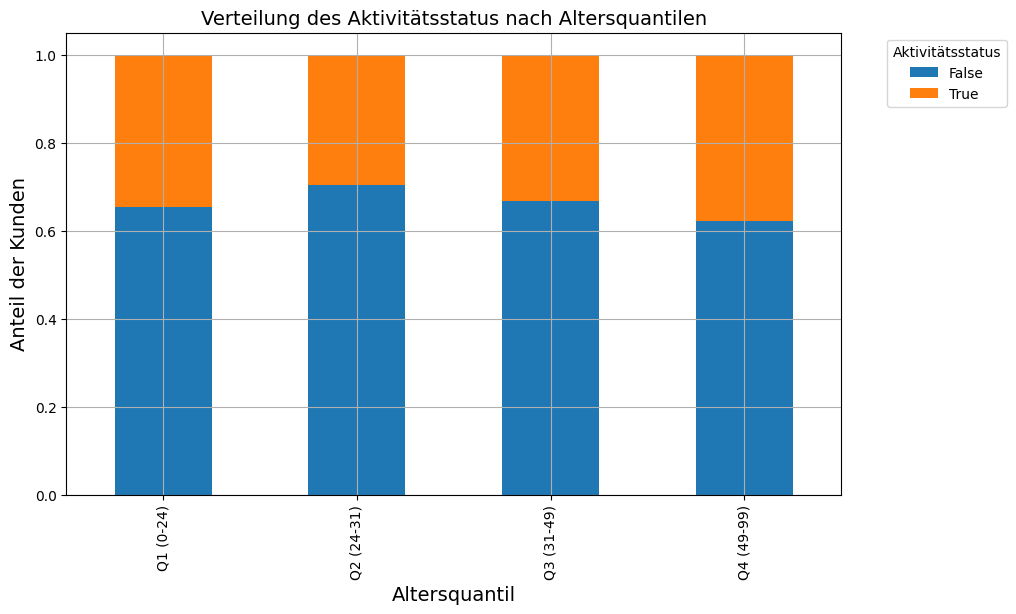

In [ ]:
# Berechnen Sie Quartile und fügen Sie Altersbezeichnungen hinzu / Вычисление квартилей и добавление меток со значениями возраста
quantiles = df_customers['age'].quantile([0.25, 0.5, 0.75])
labels = [
    f'Q1 ({df_customers["age"].min()}-{quantiles[0.25]:.0f})',
    f'Q2 ({quantiles[0.25]:.0f}-{quantiles[0.5]:.0f})',
    f'Q3 ({quantiles[0.5]:.0f}-{quantiles[0.75]:.0f})',
    f'Q4 ({quantiles[0.75]:.0f}-{df_customers["age"].max()})'
]
df_customers['age_quantile'] = pd.qcut(df_customers['age'], 4, labels=labels)

# Berechnen die Verteilung der Nachrichtensendehäufigkeit in jeder Quantilgruppe / Посчитать распределение подписки на новости в каждой квантильной группе
subscription_distribution = df_customers.groupby('age_quantile')['fashion_news_frequency'].value_counts(normalize=True).unstack().fillna(0)
# Ordnen Sie die Spalten für die Anzeige neu an / Переупорядочение столбцов для отображения
subscription_distribution = subscription_distribution[['Monthly', 'Regularly', 'NONE']]

# Balkendiagramme erstellen / Построение столбчатых диаграмм
subscription_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#2ca02c', '#ff7f0e'])
plt.title('Verteilung der Nachrichtensendehäufigkeit nach Altersquantilen', fontsize=14)
plt.xlabel('Altersquantil', fontsize=14)
plt.ylabel('Anteil der Kunden', fontsize=14)
plt.legend(title='Newsletter-Abonnement', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
#plt.savefig('/content/FashionNewsFrequencyAgeQuartile.png')
plt.show()

# Ersetzen von Nan-Werten durch „NONE“ in der Spalte „Active“ und konvertieren aller Werte in das String-Format / Замена nan значений на 'NONE' в колонке 'Active' и приведение всех значений к строковому формату
df_customers['Active'] = df_customers['Active'].fillna('NONE').astype(str)
# Berechnen Sie die Verteilung des Status „Active“ in jeder Quantilgruppe / Посчитать распределение статуса "Active" в каждой квантильной группе
active_distribution = df_customers.groupby('age_quantile')['Active'].value_counts(normalize=True).unstack().fillna(0)

# Balkendiagramme erstellen / Построение столбчатых диаграмм
active_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Verteilung des Aktivitätsstatus nach Altersquantilen', fontsize=14)
plt.xlabel('Altersquantil', fontsize=14)
plt.ylabel('Anteil der Kunden', fontsize=14)
plt.legend(title='Aktivitätsstatus', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
#plt.savefig('/content/ActiveStatusAgeQuartile.png')
plt.show()

In [ ]:
# Gruppieren Sie nach Postleitzahl und zählen Sie die Anzahl der Kunden in jeder Postleitzahl / Группировка по почтовому коду и подсчет количества клиентов в каждом почтовом коде
postal_code_counts = df_customers.groupby('postal_code').size().reset_index(name='counts')
# Sortieren Sie nach der Anzahl der Kunden in absteigender Reihenfolge und zeigen Sie die ersten 5 Positionen an / Сортировка по количеству клиентов в убывающем порядке и вывод первых 5 позиций
postal_code_counts.sort_values(by='counts', ascending=False).head(5)

postal_code  counts
61034   2c29ae653a9282cce4151bd87643c907644e09541abc28...  120303
281937  cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...     261
156090  714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...     159
171208  7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...     157
126228  5b7eb31eabebd3277de632b82267286d847fd5d44287ee...     156

In [ ]:
print(df_customers[df_customers['postal_code'] == '2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'])

                                               customer_id  Active  \
5        000064249685c11552da43ef22a5030f35a147f723d5b0...   False   
8        00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...   False   
9        00008469a21b50b3d147c97135e25b4201a8c58997f787...   False   
11       000097d91384a0c14893c09ed047a963c4fc6a5c021044...   False   
14       0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...    True   
...                                                    ...     ...   
1371911  fffc36edc9658a27fc810a5a752b26a917c1a0a6b4261a...   False   
1371914  fffc582abe0ed452f145f2e86649d7d745a2b3a16942dd...    True   
1371917  fffc8a9f1545e08fdf09f7dc3bd0736e1bdccceecca685...    True   
1371943  fffdf87d73dfab4ff56920a14c89e6cc929fda2a0619c9...   False   
1371974  ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...    True   

        club_member_status fashion_news_frequency  age  \
5                     NONE                   NONE    0   
8                   ACTIVE                 

***TRANSACTIONS***

In [18]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [19]:
df_transactions.head()

t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2  
2  0.015237                 2  
3  0.016932                 2  
4  0.016932                 2

In [20]:
# Überprüfen der Anzahl eindeutiger Werte in 'customer_id' / Проверка количества уникальных значений в 'customer_id'
unique_customer_ids = df_transactions['customer_id'].nunique()
total_customer_ids = len(df_transactions)
print(f"Anzahl der eindeutigen Werte in customer_id: {unique_customer_ids}")
print(f"Gesamtzahl der Datensätze: {total_customer_ids}")

Anzahl der eindeutigen Werte in customer_id: 1362281
Gesamtzahl der Datensätze: 31788324


In [21]:
# Konvertieren Sie der Spalte 't_dat' in das Datum/Uhrzeit-Format / Преобразование столбца 't_dat' в формат datetime
df_transactions['t_dat'] = pd.to_datetime(df_transactions['t_dat'])

# Definieren eindeutiger Werte in der Spalte 'sales_channel_id' / Определение уникальных значений в столбце 'sales_channel_id'
unique_sales_channel_id = df_transactions['sales_channel_id'].unique()
print(f"Einzigartige Werte in sales_channel_id: {unique_sales_channel_id}")

Einzigartige Werte in sales_channel_id: [2 1]


In [22]:
# Konvertieren der Spalte 'sales_chanel_id' in int8 / Преобразование столбца 'sales_chanel_id' в int8
df_transactions['sales_channel_id'] = df_transactions['sales_channel_id'].astype('int8')

# Überprüfung des Wertebereichs in der Spalte 'price' / Проверка диапазона значений в столбце 'price'
price_min = df_transactions['price'].min()
price_max = df_transactions['price'].max()
print(f"Mindestwert in price: {price_min}")
print(f"Maximalwert в price: {price_max}")

Mindestwert in price: 1.694915254237288e-05
Maximalwert в price: 0.5915254237288136


In [23]:
# Überprüfung der Konvertierungsgenauigkeit / Проверка точности преобразования
df_transactions['price_float32'] = df_transactions['price'].astype('float32')
# Vergleich der Werte vor und nach der Konvertierung / Сравнение значений до и после преобразования
comparison = df_transactions['price'] - df_transactions['price_float32']
max_difference = comparison.abs().max()
print(f"Maximale Differenz zwischen Werten float64 und float32: {max_difference}")

Maximale Differenz zwischen Werten float64 und float32: 2.5975502082609125e-08


In [24]:
# Konvertieren der Spalte „Preis“ in float32, da Tests gezeigt haben, dass der Unterschied in den Werten vernachlässigbar ist.
# Преобразование столбца 'price'  в float32, так как проверка показала, что разница в значениях незначительна.
df_transactions['price'] = df_transactions['price_float32']
df_transactions = df_transactions.drop(columns=['price_float32'])

In [25]:
# Überprüfen des Wertebereichs in der Spalte 'article_id' / Проверка диапазона значений в столбце 'article_id'
article_id_min = df_transactions['article_id'].min()
article_id_max = df_transactions['article_id'].max()
print(f"Mindestwert in article_id: {article_id_min}")
print(f"Maximalwert in article_id: {article_id_max}")

Mindestwert in article_id: 108775015
Maximalwert in article_id: 956217002


In [26]:
# Konvertieren die Spalte 'article_id' von int64 in int32 / Преобразование столбца article_id из int64 в int32
df_transactions['article_id'] = df_transactions['article_id'].astype('int32')

In [27]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int32         
 3   price             float32       
 4   sales_channel_id  int8          
dtypes: datetime64[ns](1), float32(1), int32(1), int8(1), object(1)
memory usage: 757.9+ MB


In [ ]:
# Festlegen des Anzeigeformats für Gleitkommazahlen / Установка формата отображения чисел с плавающей запятой
pd.set_option('display.float_format', '{:.4f}'.format)
df_transactions.describe()['price']

count   31788324.0000
mean           0.0278
min            0.0000
25%            0.0158
50%            0.0254
75%            0.0339
max            0.5915
std            0.0192
Name: price, dtype: float64

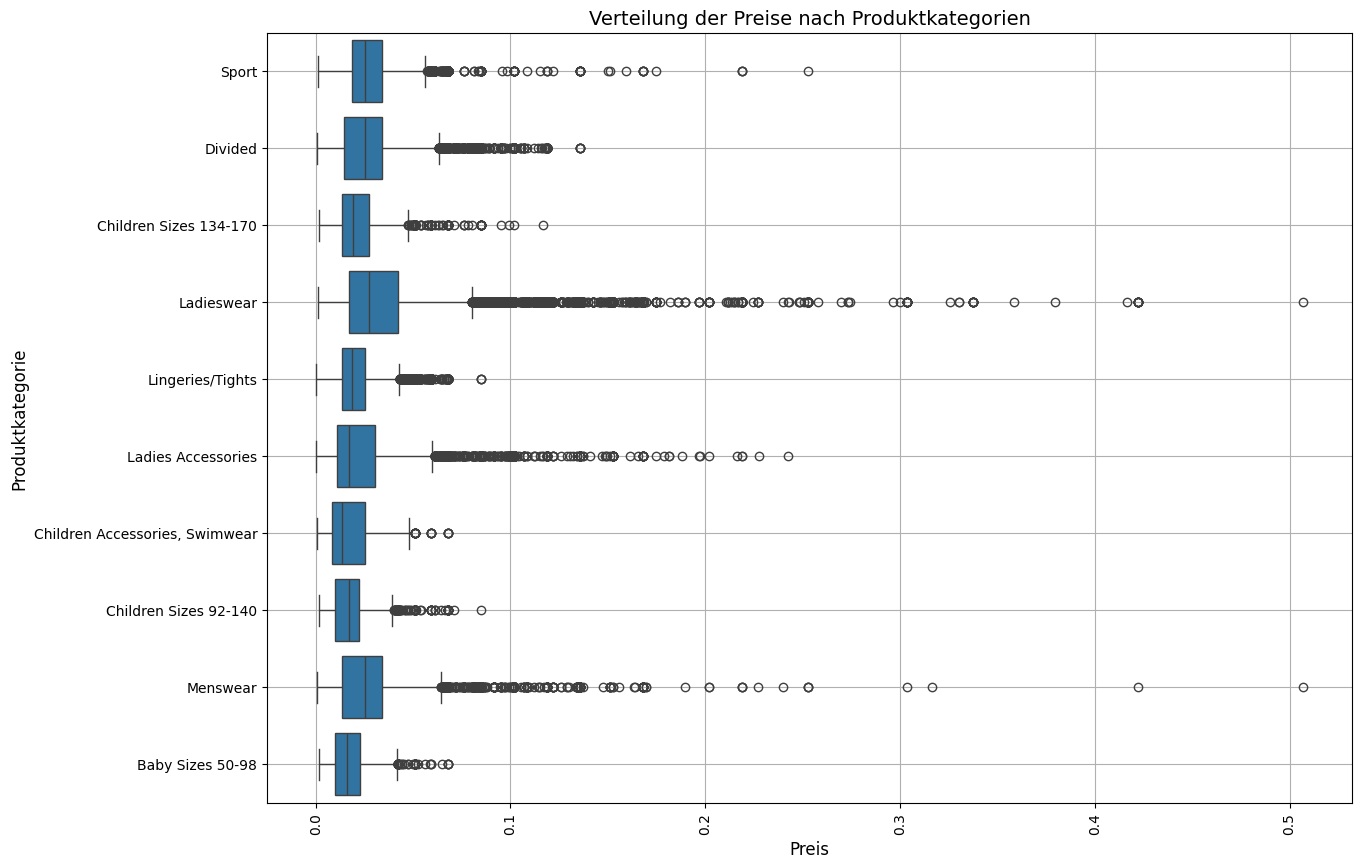

In [ ]:
# Auswahl erforderlicher Spalten aus df_articles / Отбор необходимых столбцов из df_articles
articles_subset = df_articles[['article_id', 'index_name']]
# Zusammenführen df_transactions mit df_articles / Объединение таблицы транзакций с таблицей артикулов
merged_df = pd.merge(df_transactions, articles_subset, on='article_id', how='left')
# Festlegen des Anzeigeformats für Gleitkommazahlen / Установка формата отображения чисел с плавающей запятой
pd.set_option('display.float_format', '{:.4f}'.format)

# Erstellen eines Boxplots / Построение boxplot
plt.figure(figsize=(14, 10))
sns.boxplot(y='index_name', x='price', data=merged_df.sample(frac=0.01, random_state=1))  # 1 % Datennutzung
plt.xticks(rotation=90)
plt.title('Verteilung der Preise nach Produktkategorien', fontsize=14)
plt.xlabel('Preis', fontsize=12)
plt.ylabel('Produktkategorie', fontsize=12)
plt.grid(True)
#plt.savefig('/content/PreiseNachProduktkategorien.png')
plt.show()

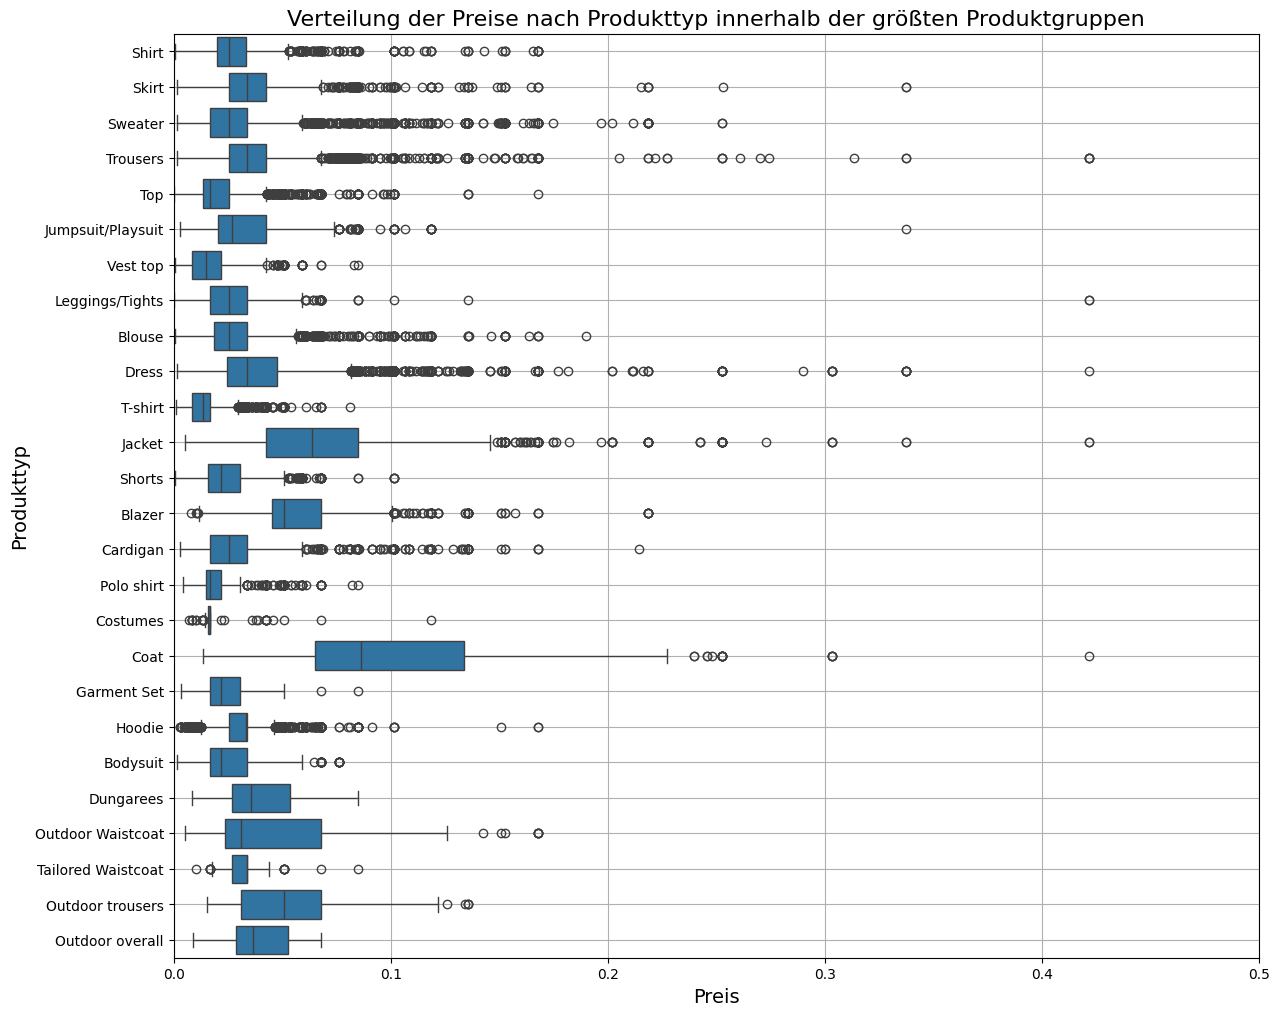

In [ ]:
# Filtern Sie Daten nach den drei größten Gruppen / Фильтрация данных для трех самых больших групп
top_groups = df_articles[df_articles['product_group_name'].isin(['Garment Full body', 'Garment Lower body', 'Garment Upper body'])]
# Auswahl der erforderlichen Spalten aus top_groups / Отбор необходимых столбцов из top_groups
top_groups_subset = top_groups[['article_id', 'product_group_name', 'product_type_name']]
# Verknüpfen einer Transaktionstabelle mit einer Tabelle top_groups_subset / Объединение таблицы транзакций с таблицей top_groups_subset
merged_top_groups = pd.merge(df_transactions, top_groups_subset, on='article_id', how='left')
# Zeilen mit NaN entfernen / Удаление строк с NaN в product_group_name
merged_top_groups = merged_top_groups.dropna(subset=['product_group_name'])
# Festlegen des Anzeigeformats für Gleitkommazahlen / Установка формата отображения чисел с плавающей запятой
pd.set_option('display.float_format', '{:.4f}'.format)

# Erstellen eines Boxplots für die drei größten Gruppen nach product_type_name / Построение boxplot для трех самых больших групп по product_type_name
plt.figure(figsize=(14, 12))
sns.boxplot(y='product_type_name', x='price', data=merged_top_groups.sample(frac=0.01, random_state=1))  # 1 % Datennutzung
plt.title('Verteilung der Preise nach Produkttyp innerhalb der größten Produktgruppen', fontsize=16)
plt.xlabel('Preis', fontsize=14)
plt.ylabel('Produkttyp', fontsize=14)
plt.xlim(0, 0.5)
plt.grid(True)
#plt.savefig('/content/PreiseInDreiProduktgruppen.png')
plt.show()

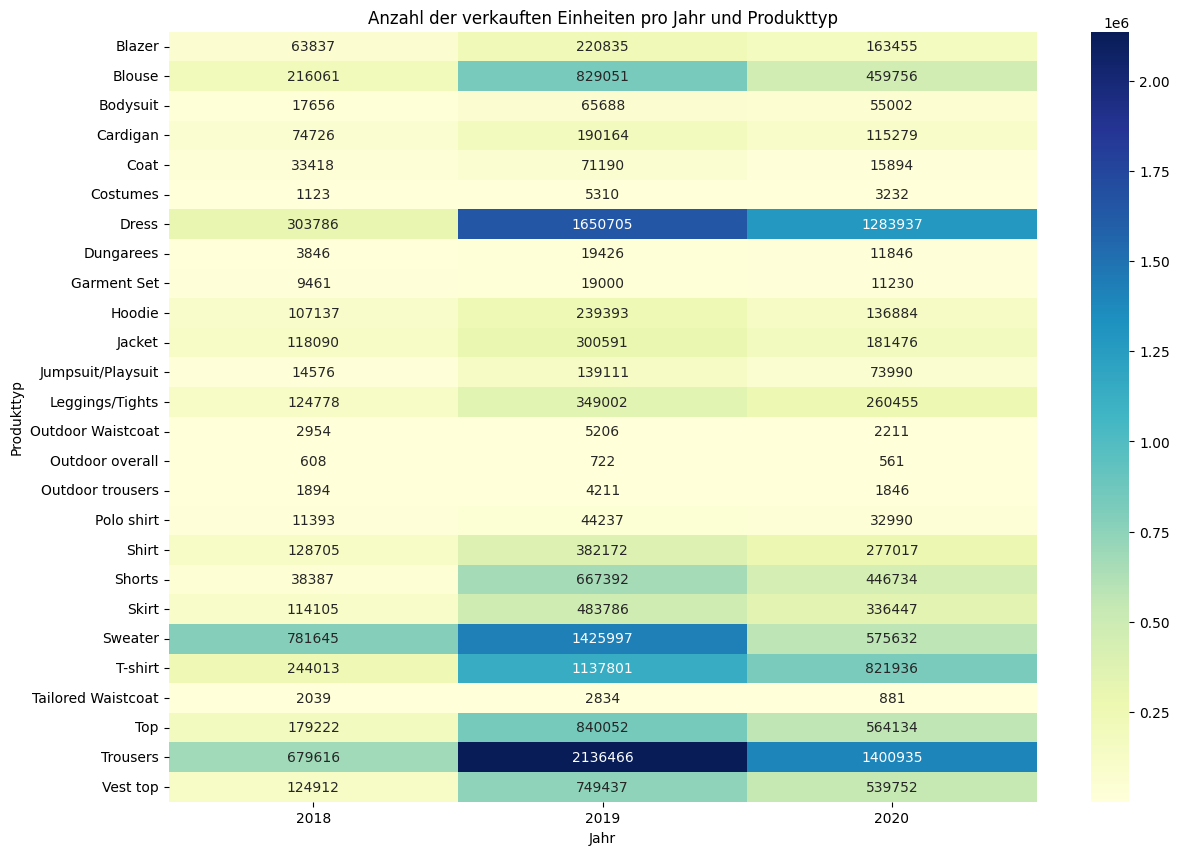

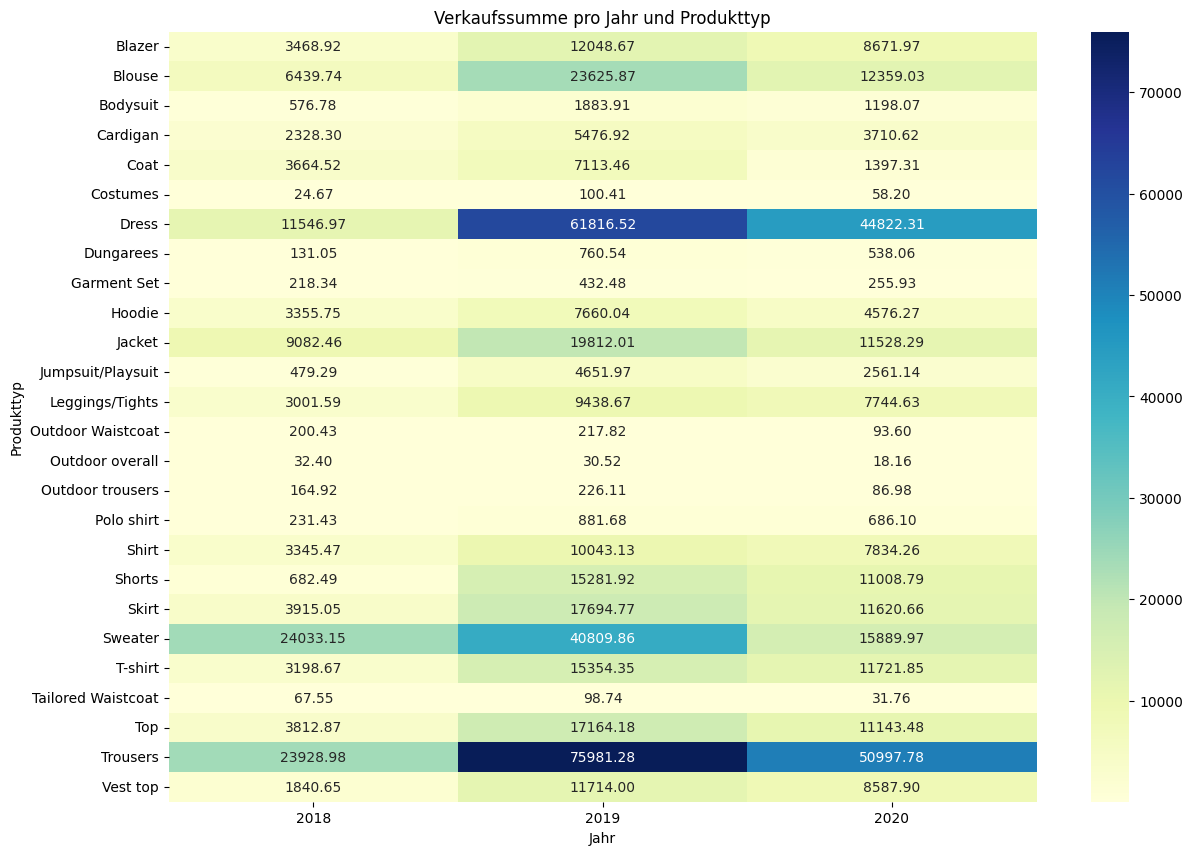

In [ ]:
# Filtern Sie Daten nach den drei größten Gruppen / Фильтрация данных для трех самых больших групп
top_groups = df_articles[df_articles['product_group_name'].isin(['Garment Full body', 'Garment Lower body', 'Garment Upper body'])]
# Auswahl der erforderlichen Spalten aus top_groups / Отбор необходимых столбцов из top_groups
top_groups_subset = top_groups[['article_id', 'product_group_name', 'product_type_name']]
# Verknüpfen einer Transaktionstabelle mit einer Tabelle top_groups_subset / Объединение таблицы транзакций с таблицей top_groups_subset
merged_top_groups = pd.merge(df_transactions, top_groups_subset, on='article_id', how='left')
# Zeilen mit NaN entfernen / Удаление строк с NaN в product_group_name
merged_top_groups = merged_top_groups.dropna(subset=['product_group_name'])
# Konvertieren eines Datums in das datetime-Format / Преобразование даты в формат datetime
merged_top_groups['t_dat'] = pd.to_datetime(merged_top_groups['t_dat'])
# Hinzufügen einer Jahresspalte / Добавление колонки года
merged_top_groups['year'] = merged_top_groups['t_dat'].dt.year

# Pivot-Tabelle für die Anzahl der verkauften Einheiten nach Jahr und Produkttyp / Сводная таблица для количества проданных единиц по годам и типам продуктов
quantity_pivot = merged_top_groups.pivot_table(index='product_type_name', columns='year', values='article_id', aggfunc='count', fill_value=0)
# Pivot-Tabelle für Verkaufsbeträge nach Jahr und Produkttyp / Сводная таблица для суммы продаж по годам и типам продуктов
sales_pivot = merged_top_groups.pivot_table(index='product_type_name', columns='year', values='price', aggfunc='sum', fill_value=0)

# Erstellen einer Heatmap für die Anzahl der verkauften Einheiten / Построение тепловой карты для количества проданных единиц
plt.figure(figsize=(14, 10))
sns.heatmap(quantity_pivot, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Anzahl der verkauften Einheiten pro Jahr und Produkttyp')
plt.xlabel('Jahr')
plt.ylabel('Produkttyp')
plt.show()

# Erstellen einer Heatmap für den Verkaufsbetrag / Построение тепловой карты для суммы продаж
plt.figure(figsize=(14, 10))
sns.heatmap(sales_pivot, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Verkaufssumme pro Jahr und Produkttyp')
plt.xlabel('Jahr')
plt.ylabel('Produkttyp')
plt.show()

In [ ]:
# Finden Sie die frühesten und spätesten Termine / Находим самую раннюю и позднюю даты
earliest_date = df_transactions['t_dat'].min()
latest_date = df_transactions['t_dat'].max()
print("Frühestes Datum:", earliest_date)
print("Letztes Date:", latest_date)

Frühestes Datum: 2018-09-20 00:00:00
Letztes Date: 2020-09-22 00:00:00


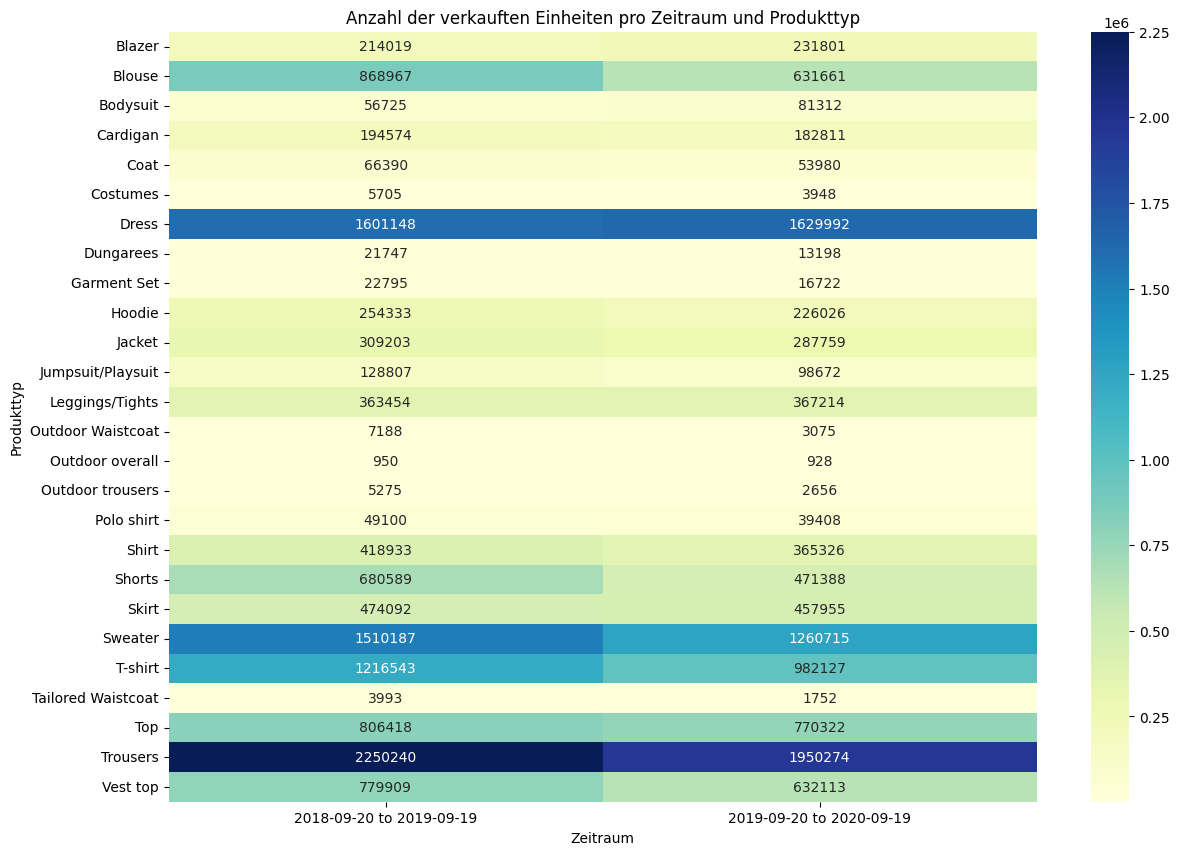

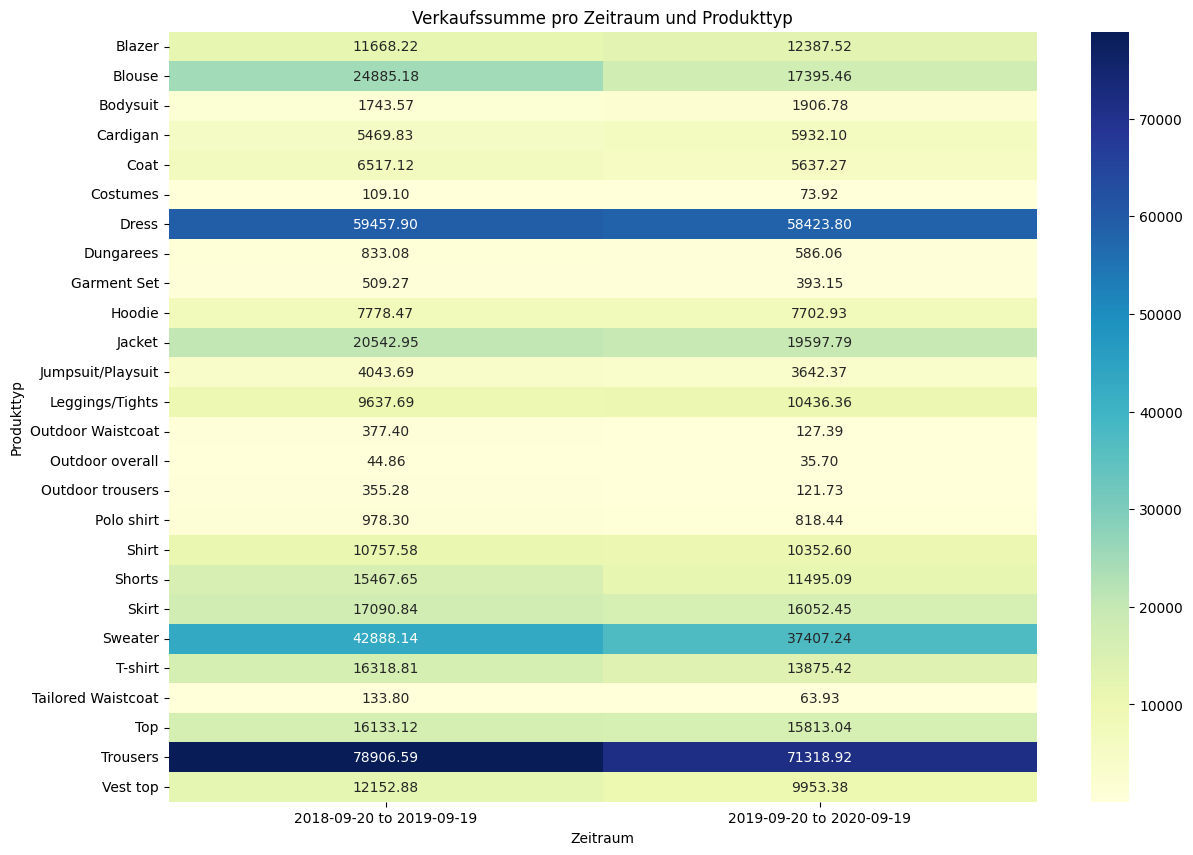

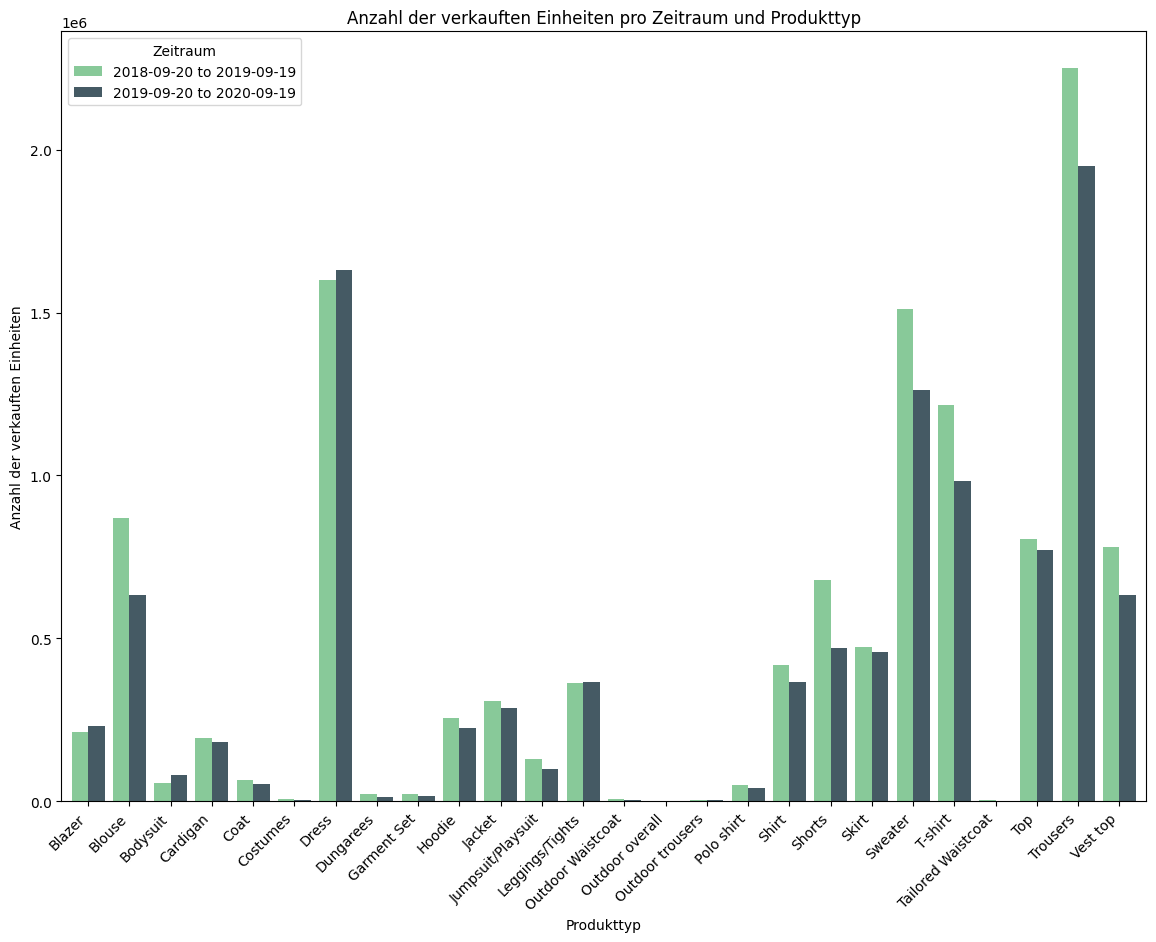

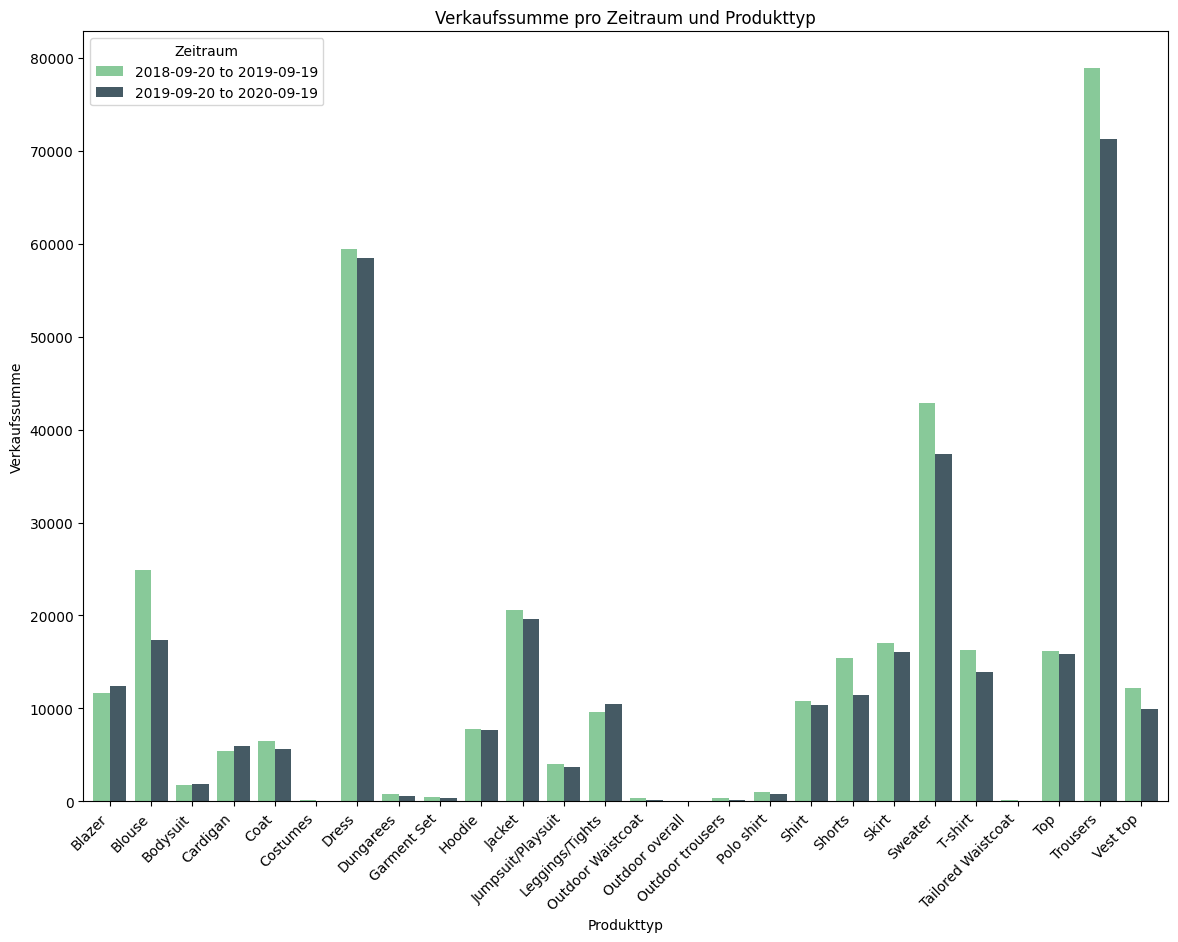

In [ ]:
# Termine für die Trennung festlegen / Определяем даты для разделения
split_date1 = pd.to_datetime('2019-09-20')
split_date2 = pd.to_datetime('2020-09-20')
# Wir teilen die Daten in zwei Zeiträume auf / Разделяем данные на два периода
period1_transactions = df_transactions[df_transactions['t_dat'] < split_date1]
period2_transactions = df_transactions[(df_transactions['t_dat'] >= split_date1) & (df_transactions['t_dat'] < split_date2)]

# Funktion zum Filtern von Daten und zum Vorbereiten von Pivot-Tabellen / Функция для фильтрации данных и подготовки сводных таблиц
def prepare_data(transactions, articles):
    # Filtern Sie Daten nach den drei größten Gruppen / Фильтрация данных для трех самых больших групп
    top_groups = articles[articles['product_group_name'].isin(['Garment Full body', 'Garment Lower body', 'Garment Upper body'])]
    # Auswahl der erforderlichen Spalten aus top_groups / Отбор необходимых столбцов из top_groups
    top_groups_subset = top_groups[['article_id', 'product_group_name', 'product_type_name']]
    # Verknüpfen einer Transaktionstabelle mit einer Tabelle top_groups_subset / Объединение таблицы транзакций с таблицей top_groups_subset
    merged_top_groups = pd.merge(transactions, top_groups_subset, on='article_id', how='left')
    # Zeilen mit NaN entfernen / Удаление строк с NaN в product_group_name
    merged_top_groups = merged_top_groups.dropna(subset=['product_group_name'])
    # Konvertieren eines Datums in das datetime-Format / Преобразование даты в формат datetime
    merged_top_groups['t_dat'] = pd.to_datetime(merged_top_groups['t_dat'])

    return merged_top_groups

# Daten für jeden Zeitraum vorbereiten / Подготовка данных для каждого периода
merged_top_groups_period1 = prepare_data(period1_transactions, df_articles)
merged_top_groups_period2 = prepare_data(period2_transactions, df_articles)

# Hinzufügen einer Periodenspalte für jeden Datensatz / Добавляем колонку периода для каждого набора данных
merged_top_groups_period1['period'] = '2018-09-20 to 2019-09-19'
merged_top_groups_period2['period'] = '2019-09-20 to 2020-09-19'
# Kombinieren von Daten aus beiden Zeiträumen / Объединяем данные обоих периодов
merged_top_groups = pd.concat([merged_top_groups_period1, merged_top_groups_period2])

# Pivot-Tabelle für die Anzahl der verkauften Einheiten nach Zeitraum und Produkttyp / Сводная таблица для количества проданных единиц по периодам и типам продуктов
quantity_pivot = merged_top_groups.pivot_table(index='product_type_name', columns='period', values='article_id', aggfunc='count', fill_value=0)
# Pivot-Tabelle für Verkaufsbeträge nach Zeitraum und Produkttyp / Сводная таблица для суммы продаж по периодам и типам продуктов
sales_pivot = merged_top_groups.pivot_table(index='product_type_name', columns='period', values='price', aggfunc='sum', fill_value=0)

# Erstellen einer Heatmap für die Anzahl der verkauften Einheiten / Построение тепловой карты для количества проданных единиц
plt.figure(figsize=(14, 10))
sns.heatmap(quantity_pivot, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Anzahl der verkauften Einheiten pro Zeitraum und Produkttyp')
plt.xlabel('Zeitraum')
plt.ylabel('Produkttyp')
#plt.savefig('/content/VerkauftenEinheitenInDreiProduktgruppen.png')
plt.show()

# Erstellen einer Heatmap für den Verkaufsbetrag / Построение тепловой карты для суммы продаж
plt.figure(figsize=(14, 10))
sns.heatmap(sales_pivot, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Verkaufssumme pro Zeitraum und Produkttyp')
plt.xlabel('Zeitraum')
plt.ylabel('Produkttyp')
#plt.savefig('/content/VerkaufssummeInDreiProduktgruppen.png')
plt.show()

# Zeichnen eines Balkendiagramms für die Anzahl der verkauften Einheiten / Построение столбчатой диаграммы для количества проданных единиц
soft_green = '#88c999'
soft_dark_green = '#455a64'
colors = [soft_green, soft_dark_green]
quantity_pivot.plot(kind='bar', figsize=(14, 10), width=0.8, color=colors)
plt.title('Anzahl der verkauften Einheiten pro Zeitraum und Produkttyp')
plt.xlabel('Produkttyp')
plt.ylabel('Anzahl der verkauften Einheiten')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Zeitraum')
#plt.savefig('/content/VerkauftenEinheitenInDreiProduktgruppenPlot.png')
plt.show()

# Erstellen eines Balkendiagramms für den Verkaufsbetrag / Построение столбчатой диаграммы для суммы продаж
sales_pivot.plot(kind='bar', figsize=(14, 10), width=0.8, color=colors)
plt.title('Verkaufssumme pro Zeitraum und Produkttyp')
plt.xlabel('Produkttyp')
plt.ylabel('Verkaufssumme')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Zeitraum')
#plt.savefig('/content/VerkaufssummeInDreiProduktgruppenPlot.png')
plt.show()

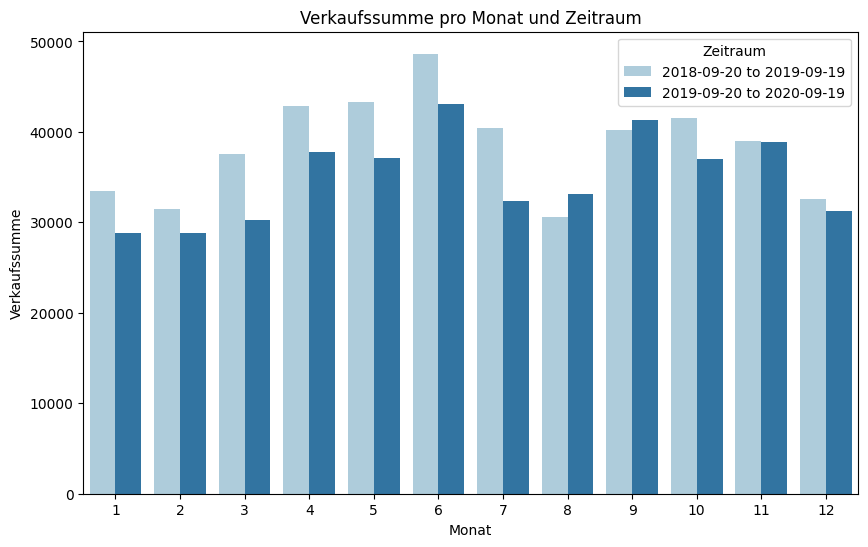

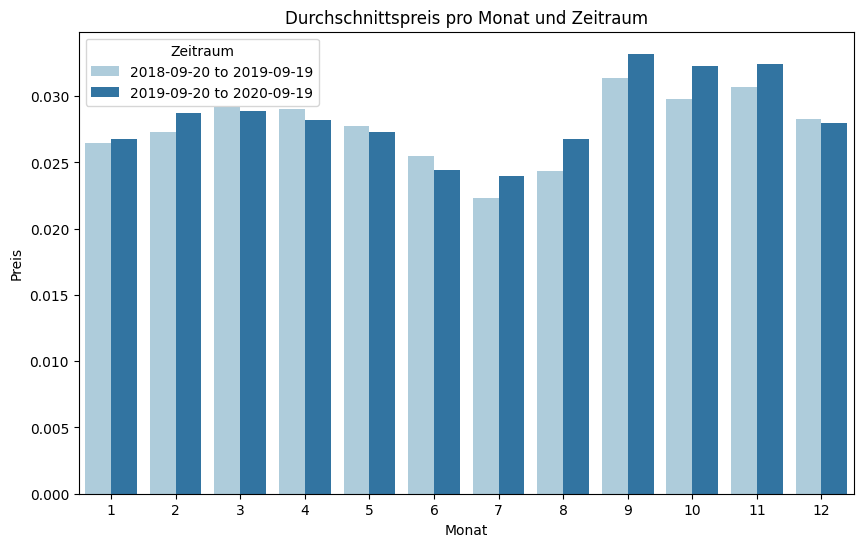

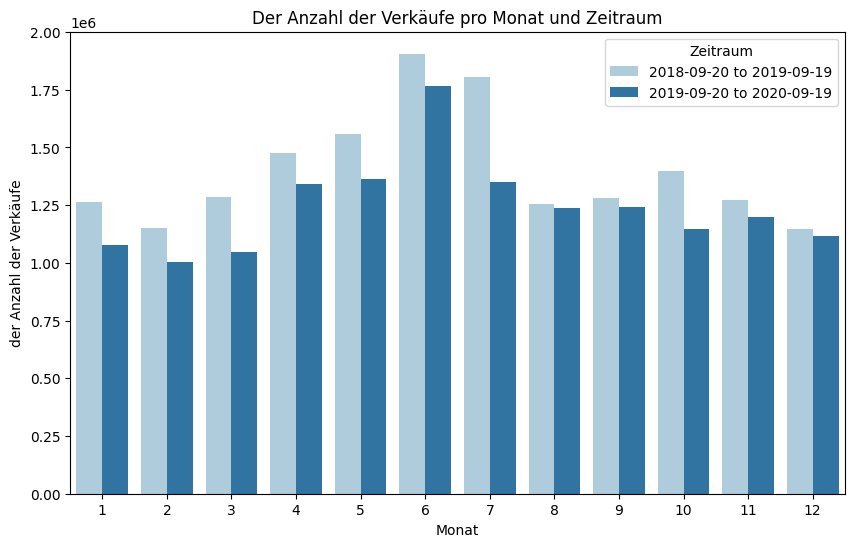

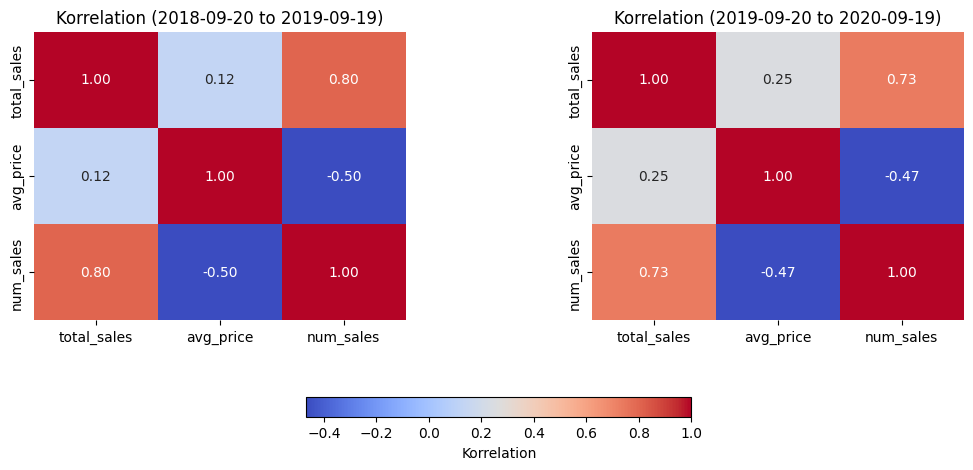

In [ ]:
# Termine für die Einteilung festlegen / Определяем даты для разделения
split_date1 = pd.to_datetime('2019-09-20')
split_date2 = pd.to_datetime('2020-09-20')
# Wir teilen die Daten in zwei Zeiträume auf / Разделяем данные на два периода
period1_transactions = df_transactions[df_transactions['t_dat'] < split_date1].copy()
period2_transactions = df_transactions[(df_transactions['t_dat'] >= split_date1) & (df_transactions['t_dat'] < split_date2)].copy()
# Fügen Sie für jeden Datensatz eine Monatsspalte hinzu / Добавляем колонку месяца для каждого набора данных
period1_transactions.loc[:, 'month'] = period1_transactions['t_dat'].dt.month
period2_transactions.loc[:, 'month'] = period2_transactions['t_dat'].dt.month

# Pivot-Tabelle für den Umsatzbetrag pro Monat für jeden Zeitraum / Сводная таблица для суммы продаж по месяцам для каждого периода
sales_pivot_period1 = period1_transactions.pivot_table(index='month', values='price', aggfunc='sum', fill_value=0)
sales_pivot_period2 = period2_transactions.pivot_table(index='month', values='price', aggfunc='sum', fill_value=0)
# Hinzufügen einer Periodenspalte zur Identifizierung im kombinierten DataFrame / Добавляем колонку периода для идентификации в объединенном DataFrame
sales_pivot_period1['period'] = '2018-09-20 to 2019-09-19'
sales_pivot_period2['period'] = '2019-09-20 to 2020-09-19'
# Kombinieren von Daten aus beiden Zeiträumen / Объединяем данные обоих периодов
sales_pivot = pd.concat([sales_pivot_period1, sales_pivot_period2])

# Erstellen ein Balkendiagramm für die Umsatzmenge pro Monat / Построение столбчатой диаграммы для суммы продаж по месяцам
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_pivot.index, y='price', hue='period', data=sales_pivot, palette='Paired')
plt.title('Verkaufssumme pro Monat und Zeitraum')
plt.xlabel('Monat')
plt.ylabel('Verkaufssumme')
plt.legend(title='Zeitraum')
#plt.savefig('/content/VerkaufssummeProMonatPlot.png')
plt.show()

# Pivot-Tabelle für den Umsatzbetrag pro Monat für jeden Zeitraum / Сводная таблица для суммы продаж по месяцам для каждого периода
prices_pivot_period1 = period1_transactions.pivot_table(index='month', values='price', aggfunc='mean', fill_value=0)
prices_pivot_period2 = period2_transactions.pivot_table(index='month', values='price', aggfunc='mean', fill_value=0)
# Hinzufügen einer Periodenspalte zur Identifizierung im kombinierten DataFrame / Добавляем колонку периода для идентификации в объединенном DataFrame
prices_pivot_period1['period'] = '2018-09-20 to 2019-09-19'
prices_pivot_period2['period'] = '2019-09-20 to 2020-09-19'
# Kombinieren von Daten aus beiden Zeiträumen / Объединяем данные обоих периодов
prices_pivot = pd.concat([prices_pivot_period1, prices_pivot_period2])

# Erstellen Sie ein Balkendiagramm für den Durchschnittspreis pro Monat / Построение столбчатой диаграммы для средней цены по месяцам
plt.figure(figsize=(10, 6))
sns.barplot(x=prices_pivot.index, y='price', hue='period', data=prices_pivot, palette='Paired')
plt.title('Durchschnittspreis pro Monat und Zeitraum')
plt.xlabel('Monat')
plt.ylabel('Preis')
plt.legend(title='Zeitraum')
#plt.savefig('/content/DurchschnittsPreisProMonatPlot.png')
plt.show()

# Pivot-Tabelle für die Anzahl der Verkäufe pro Monat für jeden Zeitraum / Сводная таблица для количества продаж по месяцам для каждого периода
num_sales_pivot_period1 = period1_transactions.pivot_table(index='month', values='article_id', aggfunc='count', fill_value=0)
num_sales_pivot_period2 = period2_transactions.pivot_table(index='month', values='article_id', aggfunc='count', fill_value=0)
# Hinzufügen einer Periodenspalte zur Identifizierung im kombinierten DataFrame / Добавляем колонку периода для идентификации в объединенном DataFrame
num_sales_pivot_period1['period'] = '2018-09-20 to 2019-09-19'
num_sales_pivot_period2['period'] = '2019-09-20 to 2020-09-19'
# Kombinieren von Daten aus beiden Zeiträumen / Объединяем данные обоих периодов
num_sales_pivot = pd.concat([num_sales_pivot_period1, num_sales_pivot_period2])

# Erstellen Sie ein Balkendiagramm mit der Anzahl der Verkäufe pro Monat / Построение столбчатой диаграммы количества продаж по месяцам
plt.figure(figsize=(10, 6))
sns.barplot(x=num_sales_pivot.index, y='article_id', hue='period', data=num_sales_pivot, palette='Paired')
plt.title('Der Anzahl der Verkäufe pro Monat und Zeitraum')
plt.xlabel('Monat')
plt.ylabel('der Anzahl der Verkäufe')
plt.legend(title='Zeitraum')
#plt.savefig('/content/AnzahlDerVerkäufeProMonatPlot.png')
plt.show()

# Korrelation berechnen / Рассчитываем корреляцию
# Erstellen eines DataFrame für den ersten Zeitraum / Создание DataFrame для первого периода
data_period1 = pd.DataFrame({
    'total_sales': sales_pivot_period1['price'].values,
    'avg_price': prices_pivot_period1['price'].values,
    'num_sales': num_sales_pivot_period1['article_id'].values
})
# Erstellen eines DataFrame für den zweiten Zeitraum / Создание DataFrame для второго периода
data_period2 = pd.DataFrame({
    'total_sales': sales_pivot_period2['price'].values,
    'avg_price': prices_pivot_period2['price'].values,
    'num_sales': num_sales_pivot_period2['article_id'].values
})

# Berechnung der Korrelationsmatrix für jede Periode / Вычисление корреляционной матрицы для первого периода
correlation_matrix_period1 = data_period1.corr()
correlation_matrix_period2 = data_period2.corr()

# Visualisierung von Korrelationsmatrizen in einer Zeile / Визуализация корреляционных матриц в одном ряду
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
sns.heatmap(correlation_matrix_period1, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[0], cbar=False)
axes[0].set_title('Korrelation (2018-09-20 to 2019-09-19)')
sns.heatmap(correlation_matrix_period2, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1], cbar=False)
axes[1].set_title('Korrelation (2019-09-20 to 2020-09-19)')

# Настройка отображения цветовой шкалы только на одном графике для компактности
plt.subplots_adjust(wspace=0.5)  # Пространство между графиками
plt.colorbar(axes[1].collections[0], ax=axes, orientation='horizontal', fraction=0.05, pad=0.2, label='Korrelation')
plt.savefig('/content/CorrAvgPriceNumSalesTotalSales.png')
plt.show()

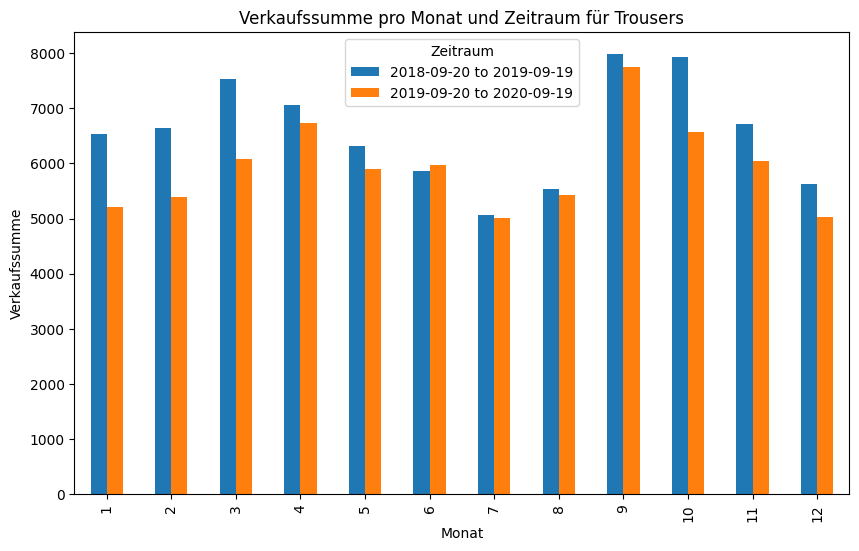

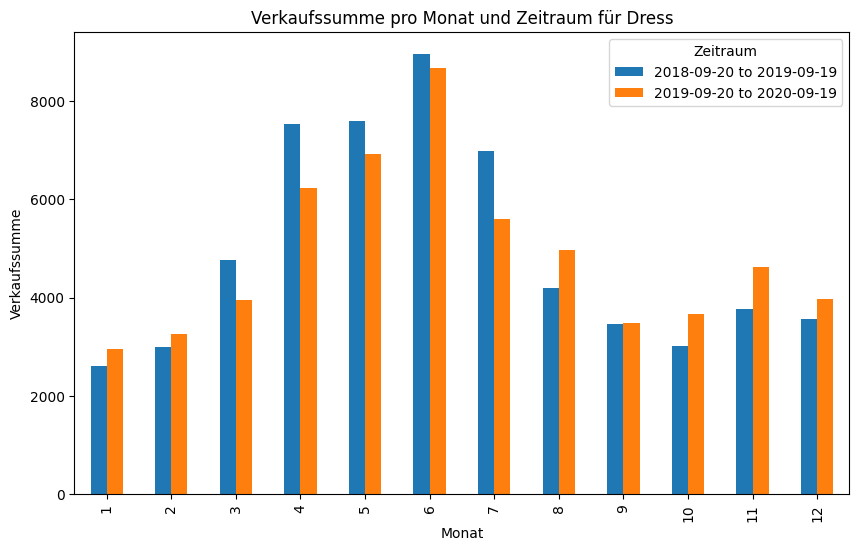

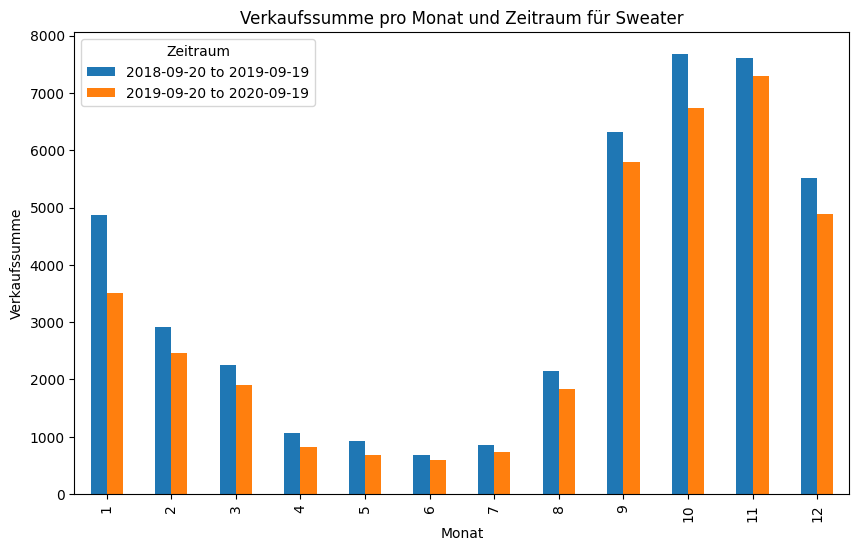

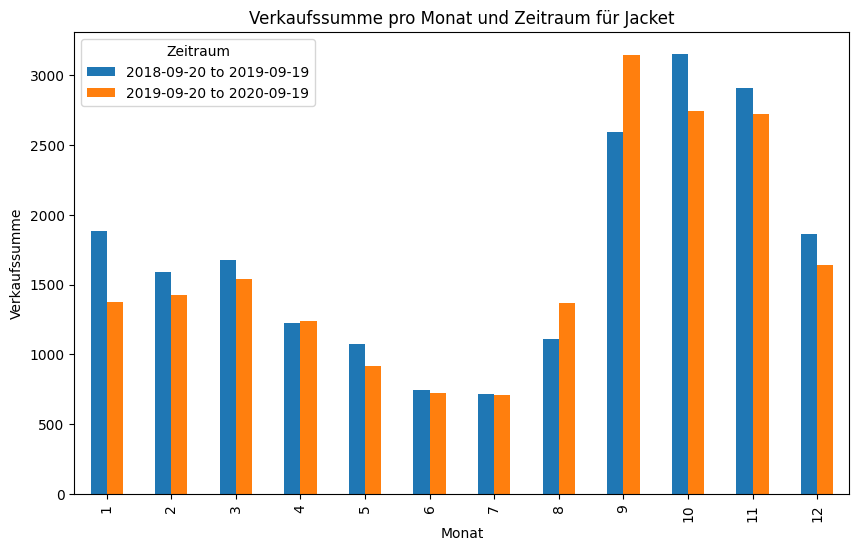

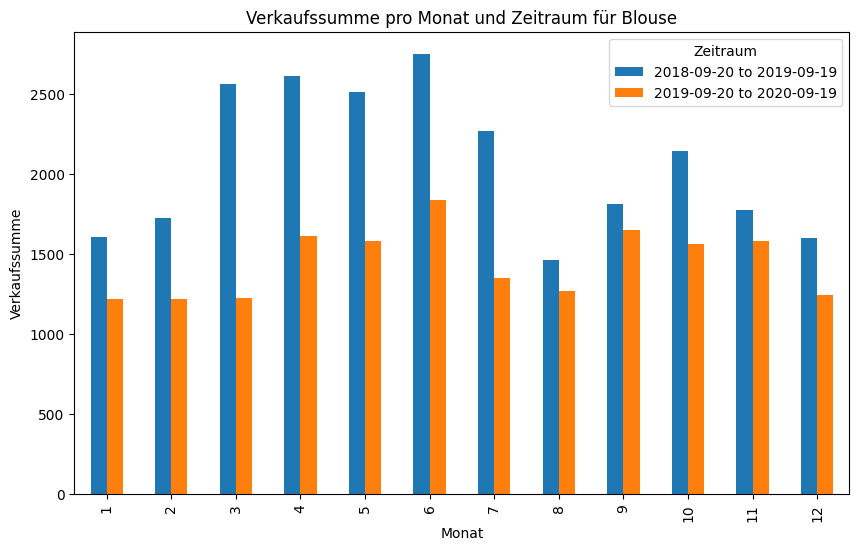

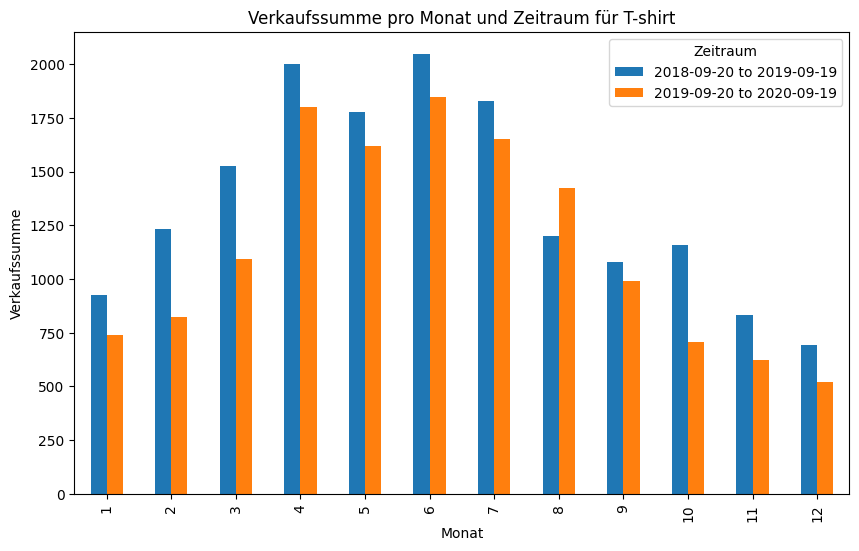

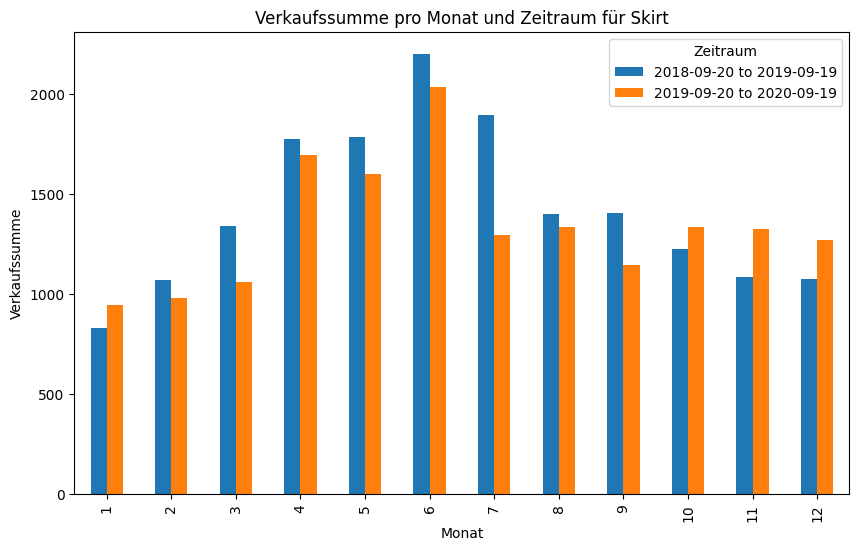

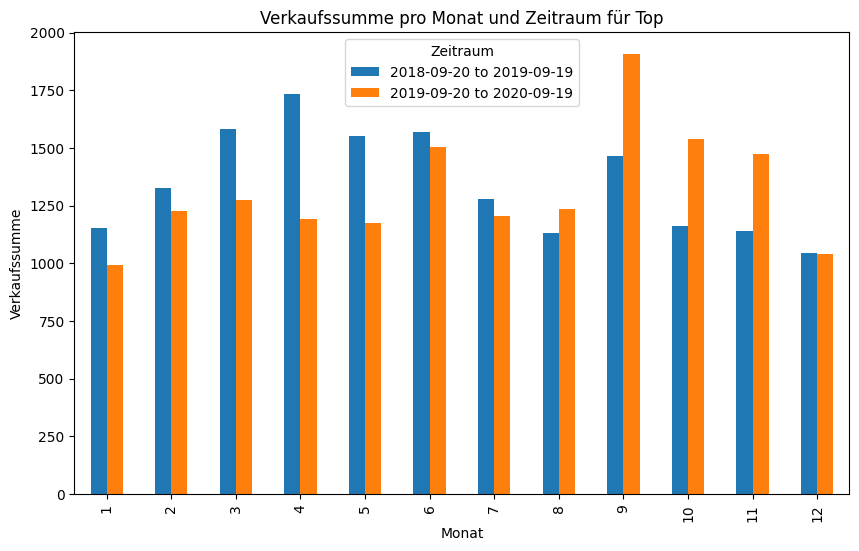

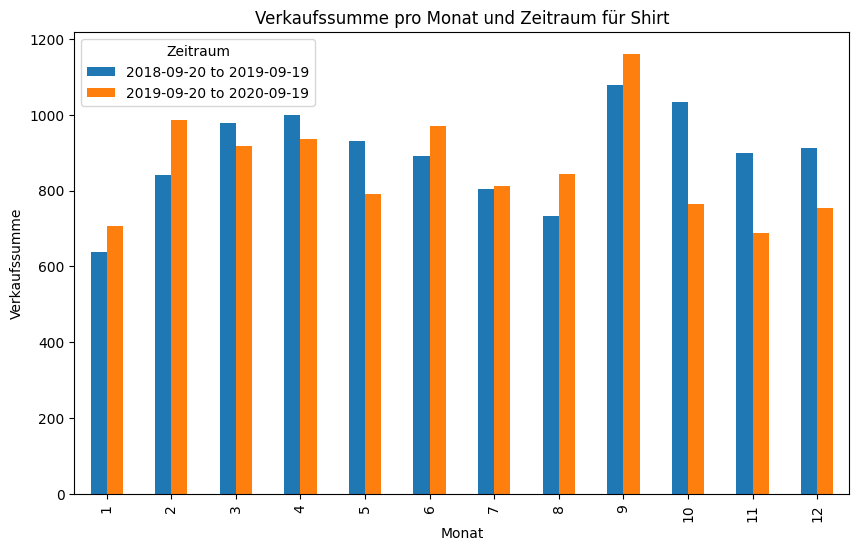

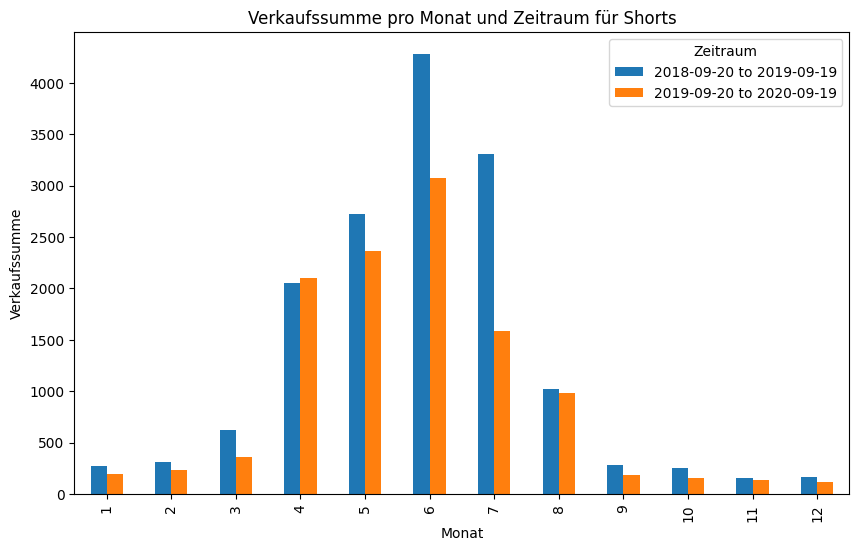

In [ ]:
# Termine für die Einteilung festlegen / Определяем даты для разделения
split_date1 = pd.to_datetime('2019-09-20')
split_date2 = pd.to_datetime('2020-09-20')
# Wir teilen die Daten in zwei Zeiträume auf / Разделяем данные на два периода
period1_transactions = df_transactions[df_transactions['t_dat'] < split_date1].copy()
period2_transactions = df_transactions[(df_transactions['t_dat'] >= split_date1) & (df_transactions['t_dat'] < split_date2)].copy()
# Fügen Sie für jeden Datensatz eine Monatsspalte hinzu / Добавляем колонку месяца для каждого набора данных
period1_transactions.loc[:, 'month'] = period1_transactions['t_dat'].dt.month
period2_transactions.loc[:, 'month'] = period2_transactions['t_dat'].dt.month
# Kombinieren von Daten aus beiden Zeiträumen / Объединяем данные обоих периодов
merged_transactions = pd.concat([period1_transactions, period2_transactions])
# Verknüpfen der Transaktionstabelle mit der Tabelle mit den erforderlichen Feldern df_articles / Объединение таблицы транзакций с таблицей необходимыми полями df_articles
top_groups = df_articles[['article_id', 'product_group_name', 'product_type_name']]
merged_data = pd.merge(merged_transactions, top_groups, on='article_id', how='left')

# Filtern von Daten nach interessanten Produkttypen / Фильтрация данных по интересующим типам продуктов
product_types_of_interest = ['Trousers', 'Dress', 'Sweater', 'Jacket', 'Blouse', 'T-shirt', 'Skirt', 'Top', 'Shirt', 'Shorts']
filtered_data = merged_data[merged_data['product_type_name'].isin(product_types_of_interest)].copy()
# Fügen Sie eine Monatsspalte hinzu / Добавляем колонку месяца
filtered_data.loc[:, 'period'] = pd.cut(filtered_data['t_dat'], bins=[pd.Timestamp('2018-09-20'), split_date1, split_date2], labels=['2018-09-20 to 2019-09-19', '2019-09-20 to 2020-09-19'])

def plot_product_sales(data, product_type):
    # Pivot-Tabelle für den Umsatzbetrag pro Monat / Сводная таблица для суммы продаж по месяцам
    sales_pivot = data.pivot_table(index='month', columns='period', values='price', aggfunc='sum', fill_value=0)
    sales_pivot.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Verkaufssumme pro Monat und Zeitraum für {product_type}')
    plt.xlabel('Monat')
    plt.ylabel('Verkaufssumme')
    plt.legend(title='Zeitraum')
    filename = product_type.replace(' ', '_').replace('/', '_')
    plt.savefig(f'/content/VerkaufssummeProMonat&{filename}.png')
    plt.show()

# Zeichnen von Diagrammen für jeden Produkttyp / Построение графиков для каждого типа продукта
for product_type in product_types_of_interest:
    product_data = filtered_data[filtered_data['product_type_name'] == product_type]
    plot_product_sales(product_data, product_type)


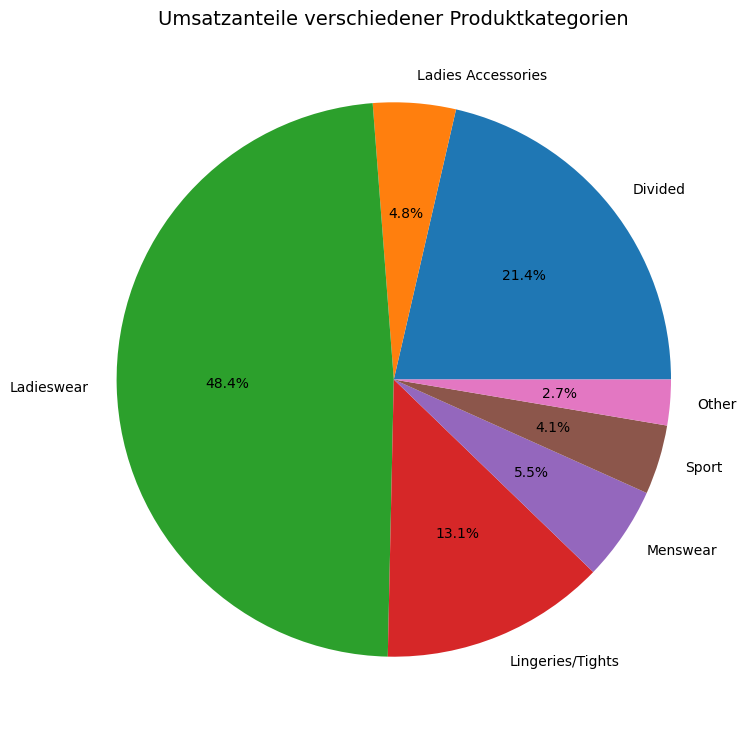

In [ ]:
# Auswahl der erforderlichen Spalten aus df_articles / Отбор необходимых столбцов из df_articles
index_subset = df_articles[['article_id', 'index_name']]
# Verknüpfen einer Transaktionstabelle mit einer Tabelle index_subset / Объединение таблицы транзакций с таблицей index_subset
merged_index = pd.merge(df_transactions, index_subset, on='article_id', how='left')
# Zeilen mit NaN entfernen / Удаление строк с NaN в index_name
merged_index = merged_index.dropna(subset=['index_name'])
# Gruppieren der Daten nach 'index_name' und Summierung der 'price' / группируем данные по index_name и суммируем по прайсу
index_sales_sum = merged_index.groupby('index_name')['price'].sum()

# Berechnung des Prozentsatzes jeder Produktgruppen / Вычисление процента каждой группы продуктов
total_count = index_sales_sum.sum()
index_name_percent = index_sales_sum / total_count * 100

# Zusammenfassung von Produktgruppen, die weniger als 2 % der Gesamtmenge ausmachen / Объединение групп продуктов, которые составляют менее 2% от общего количества
threshold = 2
small_groups = index_name_percent[index_name_percent < threshold].index
index_sales_sum['Other'] = index_sales_sum[small_groups].sum()
index_sales_sum = index_sales_sum.drop(small_groups)
# Erstellen eines Kreisdiagramms / Построение круговой диаграммы
plt.figure(figsize=(10, 9))
index_sales_sum.plot.pie(autopct='%1.1f%%')
plt.title('Umsatzanteile verschiedener Produktkategorien', fontsize=14)
plt.ylabel('')  # Entfernen des y-Achsenlabels
plt.savefig('/content/UmsatzanteileProductIndexPie.png')
plt.show()

In [ ]:
# index_sales_sum.plot.pie(autopct='%1.1f%%', colors=plt.cm.Paired(np.arange(len(index_sales_sum)))) красивая палитра

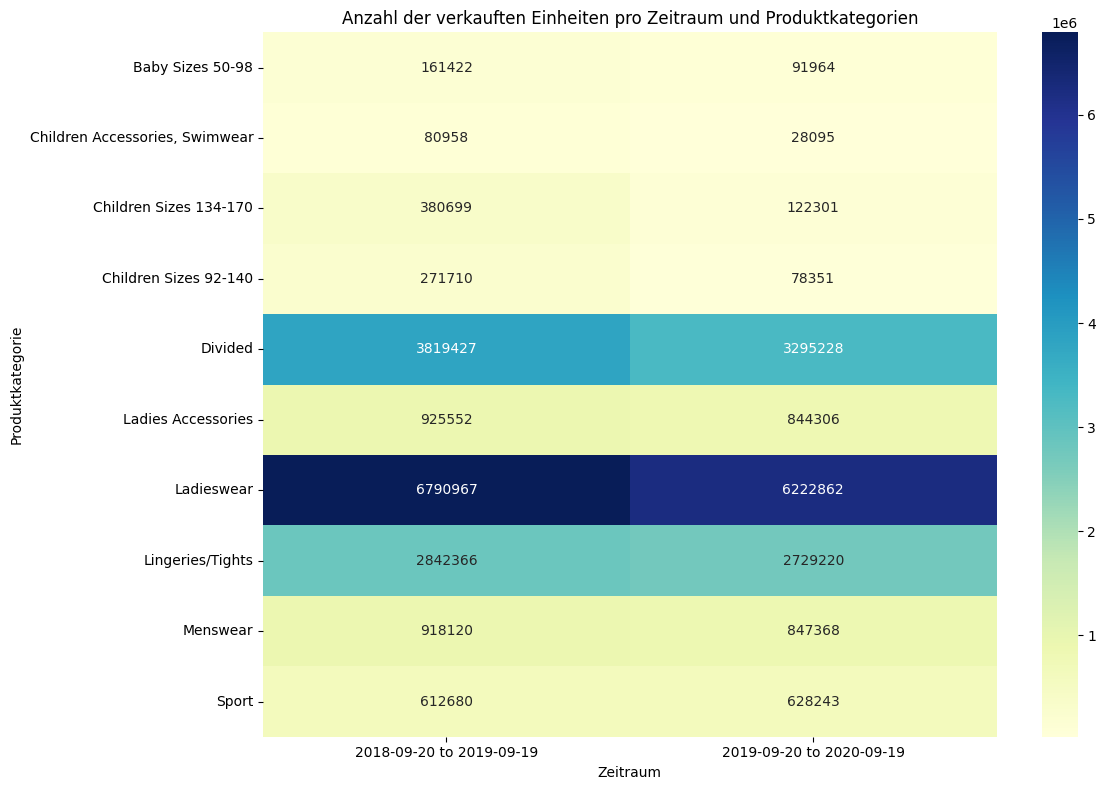

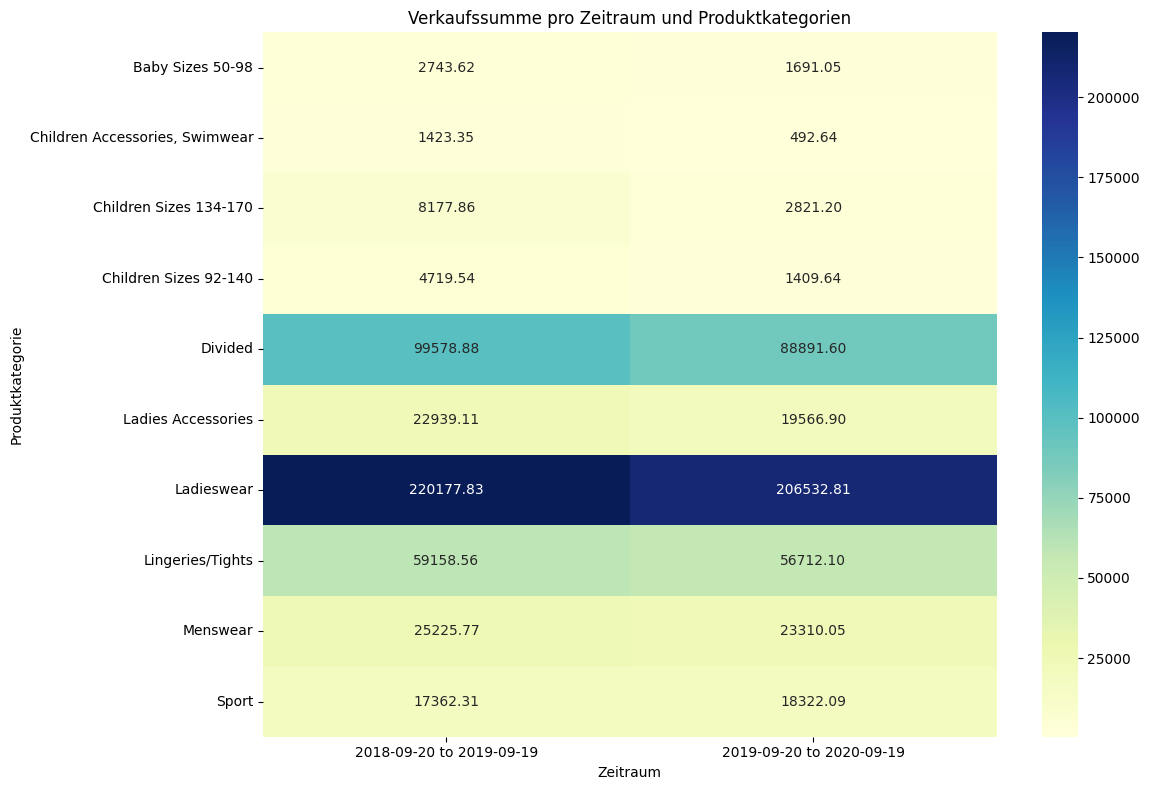

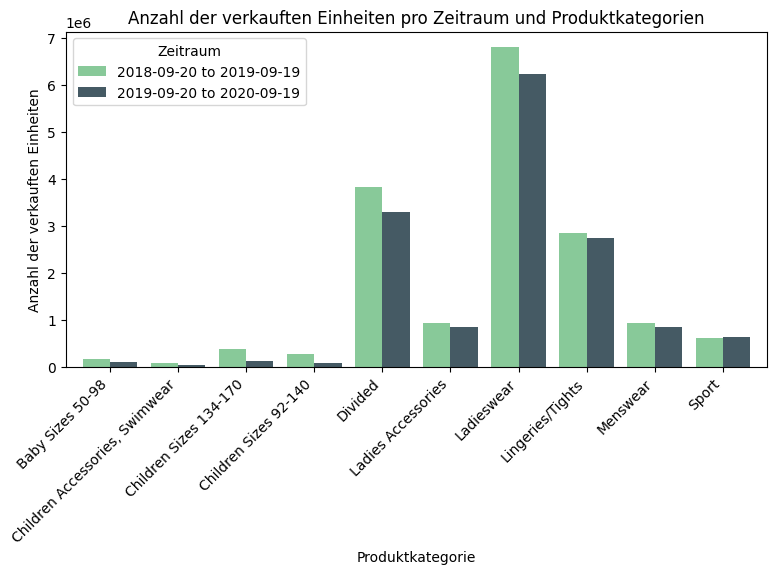

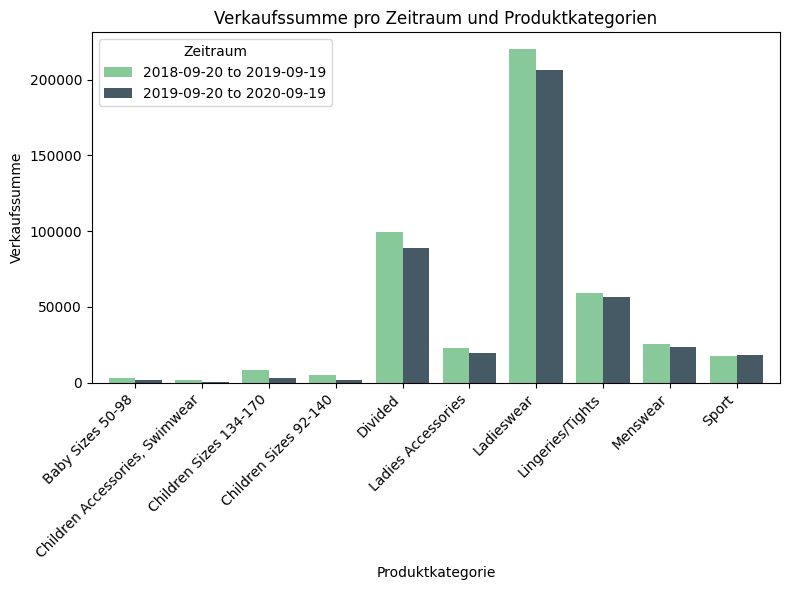

In [ ]:
# Termine für die Trennung festlegen / Определяем даты для разделения
split_date1 = pd.to_datetime('2019-09-20')
split_date2 = pd.to_datetime('2020-09-20')
# Wir teilen die Daten in zwei Zeiträume auf / Разделяем данные на два периода
period1_transactions = df_transactions[df_transactions['t_dat'] < split_date1]
period2_transactions = df_transactions[(df_transactions['t_dat'] >= split_date1) & (df_transactions['t_dat'] < split_date2)]

# Funktion zum Filtern von Daten und zum Vorbereiten von Pivot-Tabellen / Функция для фильтрации данных и подготовки сводных таблиц
def prepare_data(transactions, articles):
    # Auswahl der erforderlichen Spalten aus df_articles / Отбор необходимых столбцов из df_articles
    index_subset = df_articles[['article_id', 'index_name']]
    # Verknüpfen einer Transaktionstabelle mit einer Tabelle index_subset / Объединение таблицы транзакций с таблицей index_subset
    merged_index = pd.merge(transactions, index_subset, on='article_id', how='left')
    # Zeilen mit NaN entfernen / Удаление строк с NaN в index_name
    merged_index = merged_index.dropna(subset=['index_name'])
    # Konvertieren eines Datums in das datetime-Format / Преобразование даты в формат datetime
    merged_index['t_dat'] = pd.to_datetime(merged_index['t_dat'])

    return merged_index

# Daten für jeden Zeitraum vorbereiten / Подготовка данных для каждого периода
merged_index_period1 = prepare_data(period1_transactions, df_articles)
merged_index_period2 = prepare_data(period2_transactions, df_articles)

# Hinzufügen einer Periodenspalte für jeden Datensatz / Добавляем колонку периода для каждого набора данных
merged_index_period1['period'] = '2018-09-20 to 2019-09-19'
merged_index_period2['period'] = '2019-09-20 to 2020-09-19'
# Kombinieren von Daten aus beiden Zeiträumen / Объединяем данные обоих периодов
merged_index = pd.concat([merged_index_period1, merged_index_period2])

# Pivot-Tabelle für die Anzahl der verkauften Einheiten nach Zeitraum und Produktkategorien / Сводная таблица для количества проданных единиц по периодам и разделам
quantity_pivot_index = merged_index.pivot_table(index='index_name', columns='period', values='article_id', aggfunc='count', fill_value=0)
# Pivot-Tabelle für Verkaufsbeträge nach Zeitraum und Produktkategorien / Сводная таблица для суммы продаж по периодам и разделам
sales_pivot_index = merged_index.pivot_table(index='index_name', columns='period', values='price', aggfunc='sum', fill_value=0)

# Erstellen einer Heatmap für die Anzahl der verkauften Einheiten / Построение тепловой карты для количества проданных единиц
plt.figure(figsize=(12, 8))
sns.heatmap(quantity_pivot_index, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Anzahl der verkauften Einheiten pro Zeitraum und Produktkategorien')
plt.xlabel('Zeitraum')
plt.ylabel('Produktkategorie')
plt.tight_layout()
#plt.savefig('/content/VerkauftenEinheitenInProduktkategorien.png')
plt.show()

# Erstellen einer Heatmap für den Verkaufsbetrag / Построение тепловой карты для суммы продаж
plt.figure(figsize=(12, 8))
sns.heatmap(sales_pivot_index, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Verkaufssumme pro Zeitraum und Produktkategorien')
plt.xlabel('Zeitraum')
plt.ylabel('Produktkategorie')
plt.tight_layout()
#plt.savefig('/content/VerkaufssummeInProduktkategorien.png')
plt.show()

# Zeichnen eines Balkendiagramms für die Anzahl der verkauften Einheiten / Построение столбчатой диаграммы для количества проданных единиц
soft_green = '#88c999'
soft_dark_green = '#455a64'
colors = [soft_green, soft_dark_green]
quantity_pivot_index.plot(kind='bar', figsize=(8, 6), width=0.8, color=colors)
plt.title('Anzahl der verkauften Einheiten pro Zeitraum und Produktkategorien')
plt.xlabel('Produktkategorie')
plt.ylabel('Anzahl der verkauften Einheiten')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Zeitraum')
#plt.savefig('/content/VerkauftenEinheitenInProduktkategorienPlot.png')
plt.show()

# Zeichnen eines Balkendiagramms für die Verkaufssumme / Построение столбчатой диаграммы для объема продаж
sales_pivot_index.plot(kind='bar', figsize=(8, 6), width=0.8, color=colors)
plt.title('Verkaufssumme pro Zeitraum und Produktkategorien')
plt.xlabel('Produktkategorie')
plt.ylabel('Verkaufssumme')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Zeitraum')
plt.tight_layout()
#plt.savefig('/content/VerkaufssummeInProduktkategorienPlot.png')
plt.show()

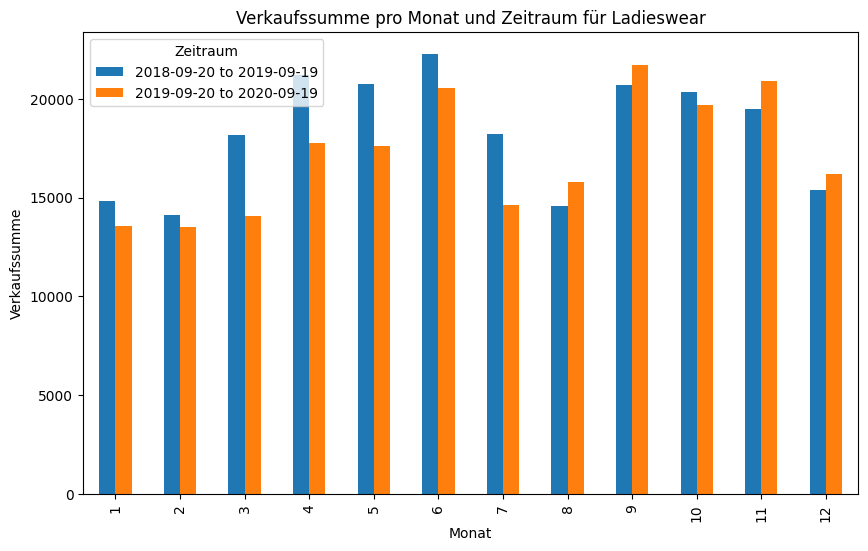

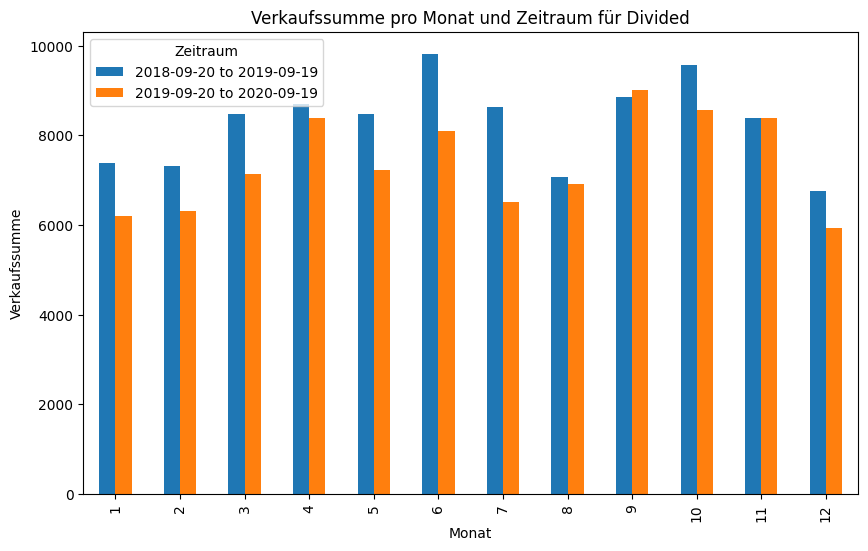

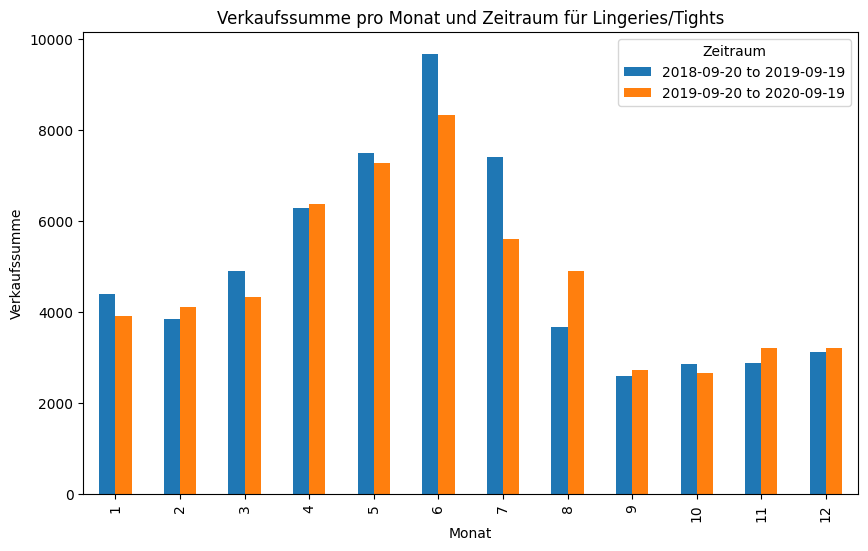

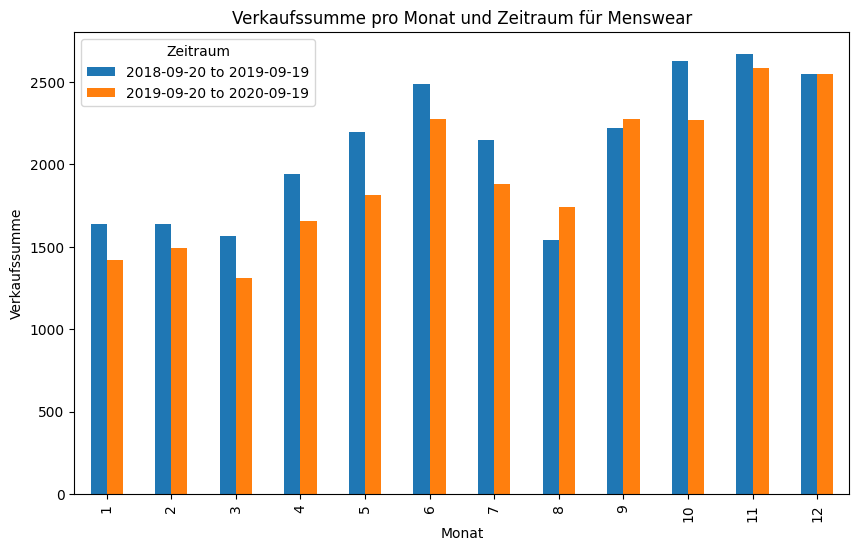

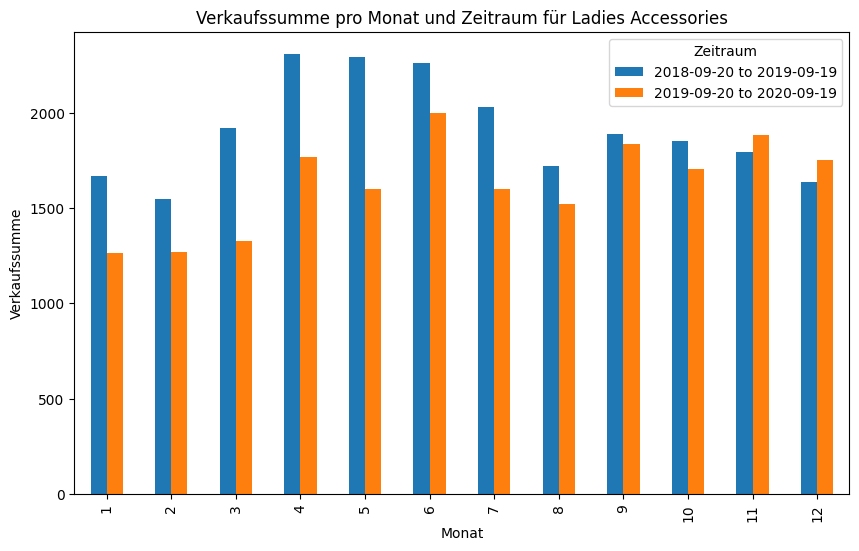

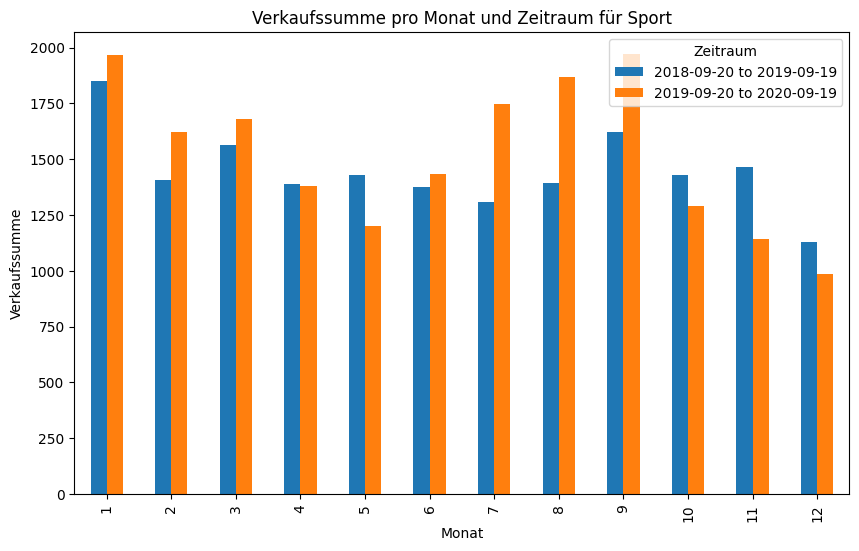

In [ ]:
# Termine für die Einteilung festlegen / Определяем даты для разделения
split_date1 = pd.to_datetime('2019-09-20')
split_date2 = pd.to_datetime('2020-09-20')
# Wir teilen die Daten in zwei Zeiträume auf / Разделяем данные на два периода
period1_transactions = df_transactions[df_transactions['t_dat'] < split_date1].copy()
period2_transactions = df_transactions[(df_transactions['t_dat'] >= split_date1) & (df_transactions['t_dat'] < split_date2)].copy()
# Fügen Sie für jeden Datensatz eine Monatsspalte hinzu / Добавляем колонку месяца для каждого набора данных
period1_transactions.loc[:, 'month'] = period1_transactions['t_dat'].dt.month
period2_transactions.loc[:, 'month'] = period2_transactions['t_dat'].dt.month
# Kombinieren von Daten aus beiden Zeiträumen / Объединяем данные обоих периодов
merged_transactions = pd.concat([period1_transactions, period2_transactions])
# Verknüpfen der Transaktionstabelle mit der Tabelle mit den erforderlichen Feldern df_articles / Объединение таблицы транзакций с таблицей необходимыми полями df_articles
top_index = df_articles[['article_id', 'index_name']]
merged_data = pd.merge(merged_transactions, top_index, on='article_id', how='left')

# Filtern von Daten nach interessanten Produkttypen / Фильтрация данных по интересующим типам продуктов
product_index_of_interest = ['Ladieswear', 'Divided', 'Lingeries/Tights', 'Menswear', 'Ladies Accessories', 'Sport']
filtered_data = merged_data[merged_data['index_name'].isin(product_index_of_interest)].copy()
#Fügen Sie eine Monatsspalte hinzu / Добавляем колонку месяца
filtered_data.loc[:, 'period'] = pd.cut(filtered_data['t_dat'], bins=[pd.Timestamp('2018-09-20'), split_date1, split_date2], labels=['2018-09-20 to 2019-09-19', '2019-09-20 to 2020-09-19'])

def plot_product_sales(data, product_index):
    # Pivot-Tabelle für den Umsatzbetrag pro Monat / Сводная таблица для суммы продаж по месяцам
    sales_pivot = data.pivot_table(index='month', columns='period', values='price', aggfunc='sum', fill_value=0)
    sales_pivot.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Verkaufssumme pro Monat und Zeitraum für {product_index}')
    plt.xlabel('Monat')
    plt.ylabel('Verkaufssumme')
    plt.legend(title='Zeitraum')
    filename = product_index.replace(' ', '_').replace('/', '_')
    plt.savefig(f'/content/VerkaufssummeProMonatIndex&{filename}.png')
    plt.show()

# Zeichnen von Diagrammen für jeden index_name / Построение графиков для каждого интересующего индекса(раздела)
for index_name in product_index_of_interest:
    product_data = filtered_data[filtered_data['index_name'] == index_name]
    plot_product_sales(product_data, index_name)

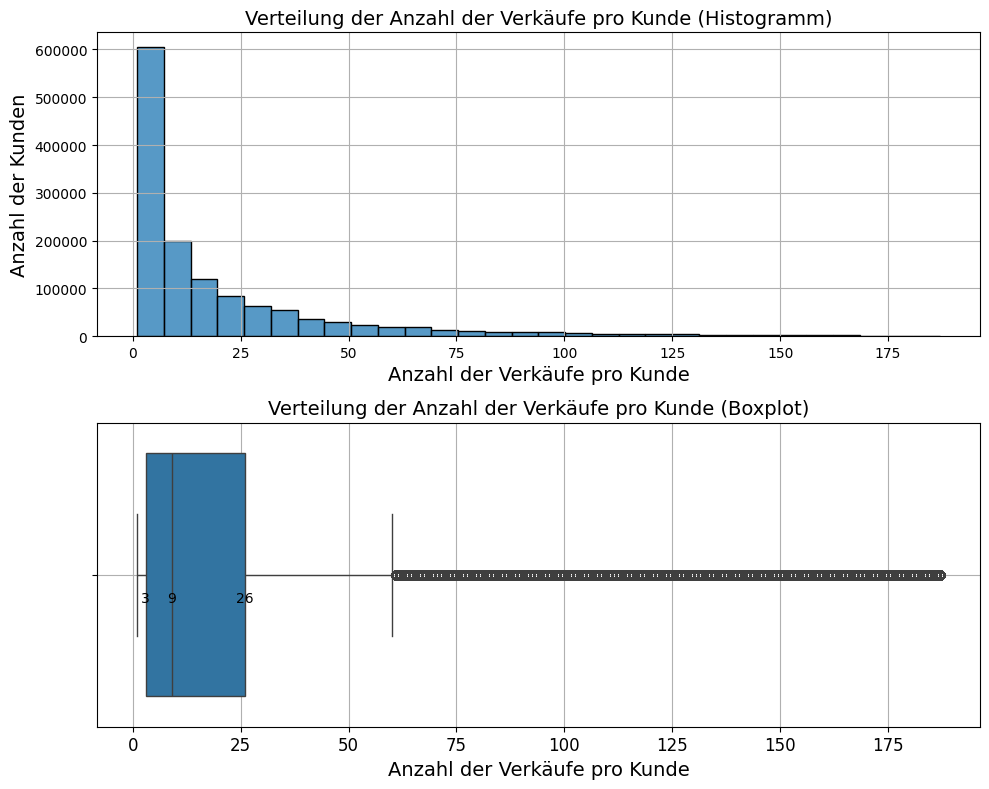

In [ ]:
# Lassen Sie uns die Daten nach Kunden gruppieren und die Anzahl der Verkäufe für jeden Kunden berechnen
# Сгруппируем данные по клиентам и подсчитаем количество продаж для каждого клиента
customer_sales = df_transactions.groupby('customer_id').size().reset_index(name='num_sales')
# Beschränken die Daten für die Darstellung auf das obere 99. Perzentil / Ограничиваем данные для построения графика верхним 99-й процентиль
upper_limit = customer_sales['num_sales'].quantile(0.99)
customer_sales_limited = customer_sales[customer_sales['num_sales'] <= upper_limit]

# Erstellen eines Histogramms und eines Boxplots in einem Diagramm / Построим гистограмму и box plot на одном графике
plt.figure(figsize=(10, 8))

# Histogramm / Гистограмма
plt.subplot(2, 1, 1)
sns.histplot(customer_sales_limited['num_sales'], bins=30, kde=False)
plt.title('Verteilung der Anzahl der Verkäufe pro Kunde (Histogramm)', fontsize=14)
plt.xlabel('Anzahl der Verkäufe pro Kunde', fontsize=14)
plt.ylabel('Anzahl der Kunden', fontsize=14)
plt.grid(True)

# Boxplot / Box plot
plt.subplot(2, 1, 2)
sns.boxplot(x=customer_sales_limited['num_sales'])
plt.title('Verteilung der Anzahl der Verkäufe pro Kunde (Boxplot)', fontsize=14)
plt.xlabel('Anzahl der Verkäufe pro Kunde', fontsize=14)
plt.grid(True)

# Berechnung von Quartilen / Вычисление квартилей
quartiles1 = customer_sales_limited['num_sales'].quantile([0.25, 0.5, 0.75]).values
# Anmerkungen für Quartile hinzufügen / Добавление аннотаций для квартилей
for q, value in zip([0.25, 0.5, 0.75], quartiles1):
    plt.annotate(f'{value:.0f}', xy=(value, 0.02), xytext=(value, 0.1),
                 textcoords='data', ha='center', va='bottom',
                 fontsize=10, color='black')

plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig('/content/AnzahlVerkäufeProKundeHistAndBoxPlot.png')
plt.show()

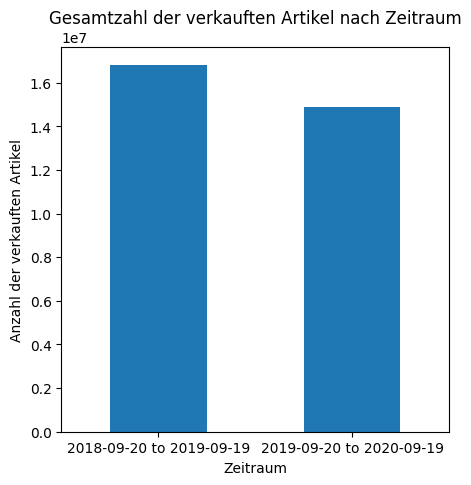

Gesamtzahl der Verkäufe für den Zeitraum 2018-09-20 - 2019-09-19: 16803901.00
Gesamtzahl der Verkäufe für den Zeitraum 2019-09-20 - 2020-09-19: 14887938.00
Prozentuale Veränderung der Gesamtzahl der verkauften Artikel: -11.40%


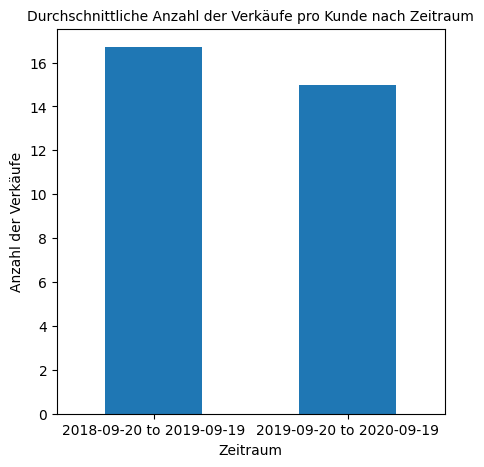

Durchschnittliche Anzahl der Verkäufe pro Kunde für den Zeitraum 2018-09-20 - 2019-09-19: 16.71
Durchschnittliche Anzahl der Verkäufe pro Kunde für den Zeitraum 2018-09-20 - 2019-09-19: 14.99
Prozentuale Änderung der durchschnittlichen Anzahl von Verkäufen: -10.26%


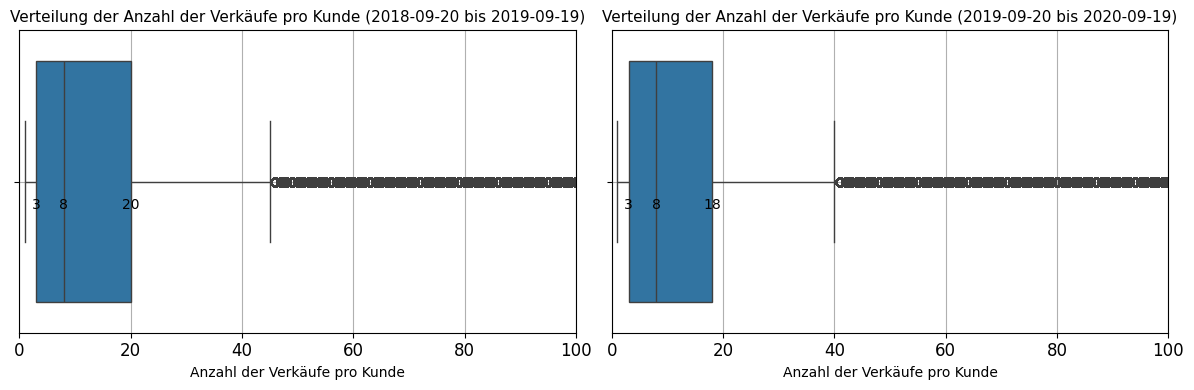

In [ ]:
# Termine für die Einteilung festlegen / Определяем даты для разделения
split_date1 = pd.to_datetime('2019-09-20')
split_date2 = pd.to_datetime('2020-09-20')
# Teilen Sie die Daten in zwei Zeiträume auf Разделяем данные на два периода
period1_transactions = df_transactions[df_transactions['t_dat'] < split_date1].copy()
period2_transactions = df_transactions[(df_transactions['t_dat'] >= split_date1) & (df_transactions['t_dat'] < split_date2)].copy()
# Hinzufügen einer Periodenspalte / Добавляем колонку периода
period1_transactions['period'] = '2018-09-20 to 2019-09-19'
period2_transactions['period'] = '2019-09-20 to 2020-09-19'
# Kombinieren Daten aus zwei Zeiträumen / Объединяем данные двух периодов
all_transactions = pd.concat([period1_transactions, period2_transactions])

# Analyse der Gesamtzahl der verkauften Waren nach Zeitraum / Анализ общего количества проданных товаров по периодам
total_items_sold = all_transactions.pivot_table(index='period', values='article_id', aggfunc='count')
total_items_sold.plot(kind='bar', legend=False, figsize=(5, 5))
plt.title('Gesamtzahl der verkauften Artikel nach Zeitraum')
plt.xlabel('Zeitraum')
plt.ylabel('Anzahl der verkauften Artikel')
plt.xticks(rotation=0)
#plt.savefig('/content/GesamtanzahlVerkauftenArtikelPlot.png')
plt.show()

# Berechnung der Gesamtzahl der Käufe für jeden Zeitraum / Вычисление общего количества покупок на каждый период
all_transactions_period1 = period1_transactions.shape[0]
all_transactions_period2 = period2_transactions.shape[0]
print(f"Gesamtzahl der Verkäufe für den Zeitraum 2018-09-20 - 2019-09-19: {all_transactions_period1:.2f}")
print(f"Gesamtzahl der Verkäufe für den Zeitraum 2019-09-20 - 2020-09-19: {all_transactions_period2:.2f}")
# Berechnung der prozentualen Änderung / Вычисление процентного изменения
percent_change_all_tr = ((all_transactions_period2 - all_transactions_period1) / all_transactions_period1) * 100
print(f"Prozentuale Veränderung der Gesamtzahl der verkauften Artikel: {percent_change_all_tr:.2f}%")

# Berechnung der durchschnittlichen Anzahl der Verkäufe pro Kunde für jeden Zeitraum
# Вычисление среднего количества покупок на одного клиента для каждого периода
avg_transactions_period1 = period1_transactions.groupby('customer_id').size().mean()
avg_transactions_period2 = period2_transactions.groupby('customer_id').size().mean()

# Visualisierung der durchschnittlichen Anzahl der Verkäufe pro Kunde nach Zeitraum / Визуализация среднего количества покупок на одного клиента по периодам
avg_transactions = pd.DataFrame({
    'period': ['2018-09-20 to 2019-09-19', '2019-09-20 to 2020-09-19'],
    'avg_transactions_per_customer': [avg_transactions_period1, avg_transactions_period2]
})

avg_transactions.plot(kind='bar', x='period', y='avg_transactions_per_customer', legend=False, figsize=(5, 5))
plt.title('Durchschnittliche Anzahl der Verkäufe pro Kunde nach Zeitraum', fontsize=10)
plt.xlabel('Zeitraum')
plt.ylabel('Anzahl der Verkäufe')
plt.xticks(rotation=0)
#plt.savefig('/content/DurchschnittlicheanzahlVerkäufeProKundelPlot.png')
plt.show()

print(f"Durchschnittliche Anzahl der Verkäufe pro Kunde für den Zeitraum 2018-09-20 - 2019-09-19: {avg_transactions_period1:.2f}")
print(f"Durchschnittliche Anzahl der Verkäufe pro Kunde für den Zeitraum 2018-09-20 - 2019-09-19: {avg_transactions_period2:.2f}")
# Berechnung der prozentualen Änderung / Вычисление процентного изменения
percent_change = ((avg_transactions_period2 - avg_transactions_period1) / avg_transactions_period1) * 100
print(f"Prozentuale Änderung der durchschnittlichen Anzahl von Verkäufen: {percent_change:.2f}%")

# Visualisierung der Verteilung der Anzahl der Verkäufe pro Kunde anhand eines Boxplots für jeden Zeitraum
# Визуализация распределения количества продаж на одного клиента с помощью box plot для каждого периода
plt.figure(figsize=(12, 4))
# Daten auf Zeitraum 1 und 2/  Данные для периода 1 и 2
limited_period1 = period1_transactions.groupby('customer_id').size().reset_index(name='num_sales')
limited_period2 = period2_transactions.groupby('customer_id').size().reset_index(name='num_sales')

# Boxplot für Zeitraum 1 / Box plot для периода 1
plt.subplot(1, 2, 1)
sns.boxplot(x=limited_period1['num_sales'])
plt.title('Verteilung der Anzahl der Verkäufe pro Kunde (2018-09-20 bis 2019-09-19)', fontsize=11)
plt.xlabel('Anzahl der Verkäufe pro Kunde')
plt.xlim(0, 100)
plt.grid(True)

# Berechnung von Quartilen / Вычисление квартилей
quartiles1 = limited_period1['num_sales'].quantile([0.25, 0.5, 0.75]).values
# Anmerkungen für Quartile hinzufügen / Добавление аннотаций для квартилей
for q, value in zip([0.25, 0.5, 0.75], quartiles1):
    plt.annotate(f'{value:.0f}', xy=(value, 0.02), xytext=(value, 0.1),
                 textcoords='data', ha='center', va='bottom',
                 fontsize=10, color='black')
plt.xticks(fontsize=12)

# Boxplot für Zeitraum 2 / Box plot для периода 2
plt.subplot(1, 2, 2)
sns.boxplot(x=limited_period2['num_sales'])
plt.title('Verteilung der Anzahl der Verkäufe pro Kunde (2019-09-20 bis 2020-09-19)', fontsize=11)
plt.xlabel('Anzahl der Verkäufe pro Kunde')
plt.xlim(0, 100)
plt.grid(True)

# Berechnung von Quartilen / Вычисление квартилей
quartiles2 = limited_period2['num_sales'].quantile([0.25, 0.5, 0.75]).values
# Anmerkungen für Quartile hinzufügen / Добавление аннотаций для квартилей
for q, value in zip([0.25, 0.5, 0.75], quartiles2):
    plt.annotate(f'{value:.0f}', xy=(value, 0.02), xytext=(value, 0.1),
                 textcoords='data', ha='center', va='bottom',
                 fontsize=10, color='black')
plt.xticks(fontsize=12)

plt.tight_layout()
#plt.savefig('/content/AnzahlVerkäufeProKundeZweiPeriodeBoxPlot.png')
plt.show()


In [ ]:
limited_period1.describe()

num_sales
count 1005899.0000
mean       16.7054
std        25.0597
min         1.0000
25%         3.0000
50%         8.0000
75%        20.0000
max       897.0000

In [ ]:
limited_period2.describe()

num_sales
count 993045.0000
mean      14.9922
std       21.9679
min        1.0000
25%        3.0000
50%        8.0000
75%       18.0000
max     1021.0000

**Erstes Quartil (25. Perzentil):**
In beiden Zeiträumen bleibt das erste Quartil bei 3, was bedeutet, dass 25 % der Kunden in beiden Zeiträumen maximal 3 Einkäufe getätigt haben.

**Median (50. Perzentil):**
Auch der Wert ist in beiden Zeiträumen gleich und beträgt 8. Das bedeutet, dass der Mediankunde in beiden Zeiträumen 8 Käufe getätigt hat

**Oberes Quartil (75. Perzentil):**
Der Wert sank von 20 im ersten Zeitraum auf 18 im zweiten Zeitraum. Dies deutet auf einen Rückgang der Kaufaktivität bei den aktivsten 25 % der Kunden hin.

**Maximalwerte:**
Der Anstieg der maximalen Anzahl an Käufen von 897 auf 1021 deutet auf eine geringe Anzahl von Kunden hin, die im zweiten Zeitraum deutlich mehr Käufe getätigt haben als im ersten.

Diese Verkaufszahlen und Statistiken erfordern eine weitere Analyse und Entwicklung von Strategien zur künftigen Umsatzsteigerung.

**Первый квартиль (25-й процентиль):**
В обоих периодах первый квартиль остается на уровне 3, что означает, что 25% клиентов сделали максимум 3 покупки за оба периода.

**Медиана (50-й процентиль):**
Значение также одинаково в обоих периодах и составляет 8. Это означает, что медианный клиент в обоих периодах совершал 8 покупок

**Верхний квартиль (75-й процентиль):**
Значение снизилось с 20 в первом периоде до 18 во втором периоде. Это указывает на снижение покупательной активности среди наиболее активных 25% клиентов.

**Максимальные значения:**
Повышение максимального значения количества покупок с 897 до 1021 указывает на появление небольшого числа клиентов, которые совершали значительно больше покупок во втором периоде по сравнению с первым.

Эти данные о количестве продаж и статистике требуют дальнейшего анализа и разработки стратегий по увеличению продаж в будущем.

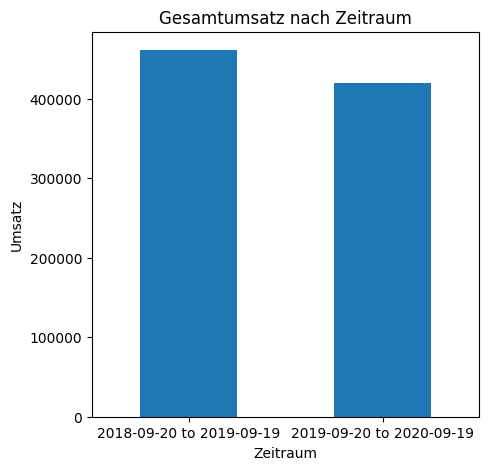

Gesamtumsatz für den Zeitraum 2018-09-20 - 2019-09-19: 461507.12
Gesamtumsatz für den Zeitraum 2019-09-20 - 2020-09-19: 419750.19
Prozentuale Veränderung des Gesamtumsatzes: -9.05%


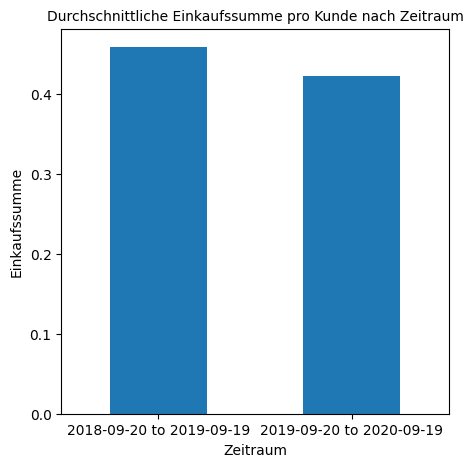

Durchschnittliche Einkaufssumme pro Kunde für den Zeitraum 2018-09-20 - 2019-09-19: 0.46
Durchschnittliche Einkaufssumme pro Kunde für den Zeitraum 2018-09-20 - 2019-09-19: 0.42
Prozentuale Änderung der durchschnittlichen Einkaufssumme pro Kunde: -7.87%


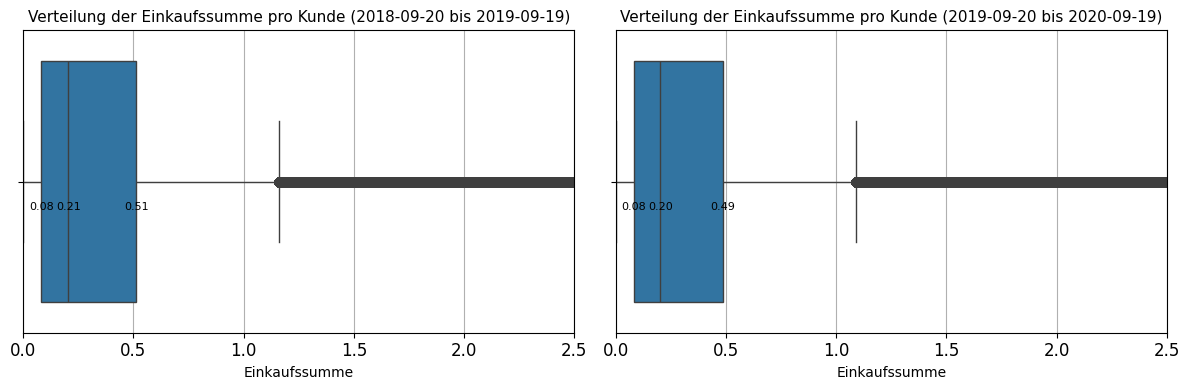

In [ ]:
# Termine für die Einteilung festlegen / Определяем даты для разделения
split_date1 = pd.to_datetime('2019-09-20')
split_date2 = pd.to_datetime('2020-09-20')
# Teilen Sie die Daten in zwei Zeiträume auf Разделяем данные на два периода
period1_transactions = df_transactions[df_transactions['t_dat'] < split_date1].copy()
period2_transactions = df_transactions[(df_transactions['t_dat'] >= split_date1) & (df_transactions['t_dat'] < split_date2)].copy()
# Hinzufügen einer Periodenspalte / Добавляем колонку периода
period1_transactions['period'] = '2018-09-20 to 2019-09-19'
period2_transactions['period'] = '2019-09-20 to 2020-09-19'
# Kombinieren Daten aus zwei Zeiträumen / Объединяем данные двух периодов
all_transactions = pd.concat([period1_transactions, period2_transactions])

# Analyse des Gesamtumsatzes nach Zeitraum / Анализ общей суммы проданных товаров по периодам
total_purchase = all_transactions.pivot_table(index='period', values='price', aggfunc='sum')
total_purchase.plot(kind='bar', legend=False, figsize=(5, 5))
plt.title('Gesamtumsatz nach Zeitraum')
plt.xlabel('Zeitraum')
plt.ylabel('Umsatz')
plt.xticks(rotation=0)
#plt.savefig('/content/GesamtUmsatzlPlot.png')
plt.show()

# Berechnung der Gesamtzahl der Käufe für jeden Zeitraum / Вычисление общей суммы продаж на каждый период
total_purchase_period1 = period1_transactions['price'].sum()
total_purchase_period2 = period2_transactions['price'].sum()
print(f"Gesamtumsatz für den Zeitraum 2018-09-20 - 2019-09-19: {total_purchase_period1:.2f}")
print(f"Gesamtumsatz für den Zeitraum 2019-09-20 - 2020-09-19: {total_purchase_period2:.2f}")
# Berechnung der prozentualen Änderung / Вычисление процентного изменения
percent_change_total_purch = ((total_purchase_period2 - total_purchase_period1) / total_purchase_period1) * 100
print(f"Prozentuale Veränderung des Gesamtumsatzes: {percent_change_total_purch:.2f}%")

# Berechnung der durchschnittlichen Einkaufssumme pro Kunde für jeden Zeitraum
# Вычисление средней суммы покупок на одного клиента для каждого периода
avg_sum_transactions_period1 = period1_transactions.groupby('customer_id')['price'].sum().mean()
avg_sum_transactions_period2 = period2_transactions.groupby('customer_id')['price'].sum().mean()

# Visualisierung der durchschnittlichen Einkaufsmenge pro Kunde nach Zeitraum / Визуализация средней суммы покупок на одного клиента по периодам
avg_sum_transactions = pd.DataFrame({
    'period': ['2018-09-20 to 2019-09-19', '2019-09-20 to 2020-09-19'],
    'avg_sum_transactions_per_customer': [avg_sum_transactions_period1, avg_sum_transactions_period2]
})

avg_sum_transactions.plot(kind='bar', x='period', y='avg_sum_transactions_per_customer', legend=False, figsize=(5, 5))
plt.title('Durchschnittliche Einkaufssumme pro Kunde nach Zeitraum', fontsize=10)
plt.xlabel('Zeitraum')
plt.ylabel('Einkaufssumme')
plt.xticks(rotation=0)
#plt.savefig('/content/DurchschnittlicheEinkaufssummeProKundelPlot.png')
plt.show()

print(f"Durchschnittliche Einkaufssumme pro Kunde für den Zeitraum 2018-09-20 - 2019-09-19: {avg_sum_transactions_period1:.2f}")
print(f"Durchschnittliche Einkaufssumme pro Kunde für den Zeitraum 2018-09-20 - 2019-09-19: {avg_sum_transactions_period2:.2f}")
# Berechnung der prozentualen Änderung / Вычисление процентного изменения
percent_change_sum = ((avg_sum_transactions_period2 - avg_sum_transactions_period1) / avg_sum_transactions_period1) * 100
print(f"Prozentuale Änderung der durchschnittlichen Einkaufssumme pro Kunde: {percent_change_sum:.2f}%")

# Visualisierung der Verteilung der Einkaufssumme pro Kunde anhand eines Boxplots für jeden Zeitraum
# Визуализация распределения суммы продаж на одного клиента с помощью box plot для каждого периода
plt.figure(figsize=(12, 4))
# Daten auf Zeitraum 1 und 2 /  Данные для периода 1 и 2
limited_period_sum1 = period1_transactions.groupby('customer_id')['price'].sum().reset_index(name='sum_sales')
limited_period_sum2 = period2_transactions.groupby('customer_id')['price'].sum().reset_index(name='sum_sales')

# Boxplot für Zeitraum 1 / Box plot для периода 1
plt.subplot(1, 2, 1)
sns.boxplot(x=limited_period_sum1['sum_sales'])
plt.title('Verteilung der Einkaufssumme pro Kunde (2018-09-20 bis 2019-09-19)', fontsize=11)
plt.xlabel('Einkaufssumme')
plt.xlim(0, 2.5)
plt.grid(True)

# Berechnung von Quartilen / Вычисление квартилей
quartiles1 = limited_period_sum1['sum_sales'].quantile([0.25, 0.5, 0.75]).values
# Anmerkungen für Quartile hinzufügen / Добавление аннотаций для квартилей
for q, value in zip([0.25, 0.5, 0.75], quartiles1):
    plt.annotate(f'{value:.2f}', xy=(value, 0.02), xytext=(value, 0.1),
                 textcoords='data', ha='center', va='bottom',
                 fontsize=8, color='black')
plt.xticks(fontsize=12)

# Boxplot für Zeitraum 2 / Box plot для периода 2
plt.subplot(1, 2, 2)
sns.boxplot(x=limited_period_sum2['sum_sales'])
plt.title('Verteilung der Einkaufssumme pro Kunde (2019-09-20 bis 2020-09-19)', fontsize=11)
plt.xlabel('Einkaufssumme')
plt.xlim(0, 2.5)
plt.grid(True)

# Berechnung von Quartilen / Вычисление квартилей
quartiles2 = limited_period_sum2['sum_sales'].quantile([0.25, 0.5, 0.75]).values
# Anmerkungen für Quartile hinzufügen / Добавление аннотаций для квартилей
for q, value in zip([0.25, 0.5, 0.75], quartiles2):
    plt.annotate(f'{value:.2f}', xy=(value, 0.02), xytext=(value, 0.1),
                 textcoords='data', ha='center', va='bottom',
                 fontsize=8, color='black')
plt.xticks(fontsize=12)

plt.tight_layout()
#plt.savefig('/content/EinkaufssummeProKundeZweiPeriodeBoxPlot.png')
plt.show()

In [ ]:
limited_period_sum1['sum_sales'].describe()

count   1005899.0000
mean          0.4588
std           0.7656
min           0.0008
25%           0.0826
50%           0.2054
75%           0.5136
max          26.3276
Name: sum_sales, dtype: float64

In [ ]:
limited_period_sum2['sum_sales'].describe()

count   993045.0000
mean         0.4227
std          0.6770
min          0.0008
25%          0.0830
50%          0.2027
75%          0.4862
max         34.9546
Name: sum_sales, dtype: float64

- Daten zur Anzahl der Verkäufe und Statistiken bestätigen einen Rückgang der Einkaufsaktivität. Der Gesamtumsatz des Jahres ging um 9,05 % zurück, während der durchschnittliche Einkaufsbetrag pro Kunde um 7,87 % sank.
- Das erste Quartil und die Medianwerte für die Menge der Käufe und die Anzahl der Käufe bleiben zwischen den Zeiträumen nahezu unverändert. Das bedeutet, dass 50 % der Kunden in beiden Zeiträumen gleich viele Einkäufe tätigen und ungefähr den gleichen Betrag ausgeben. Dies deutet auf eine stabile Basis treuer Kunden hin.
- Rückgang der Kaufaktivität bei Top-Kunden: Im obersten Quartil (75. Perzentil) ist sowohl ein Rückgang sowohl der Kaufmenge als auch der Anzahl der Käufe zu verzeichnen. Dies deutet darauf hin, dass die 25 % der aktivsten Kunden begonnen haben, sowohl mengenmäßig als auch mengenmäßig weniger einzukaufen.
- Die Höchstwerte sowohl für den Kaufbetrag als auch für die Anzahl der Käufe wurden erhöht. Dies deutet darauf hin, dass eine kleine Gruppe von Kunden im zweiten Zeitraum deutlich mehr Einkäufe tätigte und mehr Geld ausgab als im ersten. Diese Kunden waren äußerst aktiv.

- Данные о количестве продаж и статистике подтверждают снижение покупательской активности. Общий оборот за год снизился на 9.05%, в то время как средняя сумма покупок на одного клиента снизилась на 7.87%.
- Значения первого квартиля и медианы для суммы покупок и количество покупок остаются практически неизменными между периодами. Это означает, что 50% клиентов совершают одинаковое количество покупок и тратят примерно одинаковую сумму в обоих периодах. Это указывает на стабильную базу лояльных клиентов.
- Снижение покупательной активности среди топовых клиентов: в верхнем квартиле (75-й перцентиль) наблюдается снижение как в сумме покупок, так и в количестве покупок. Это свидетельствует о том, что 25% самых активных клиентов стали покупать меньше как в количестве, так и в суммах.
- Максимальные значения и для суммы покупок, и для количества покупок увеличились. Это говорит о том, что небольшая группа клиентов совершила значительно больше покупок и потратила больше денег во втором периоде по сравнению с первым. Эти клиенты проявили экстремальную активность.

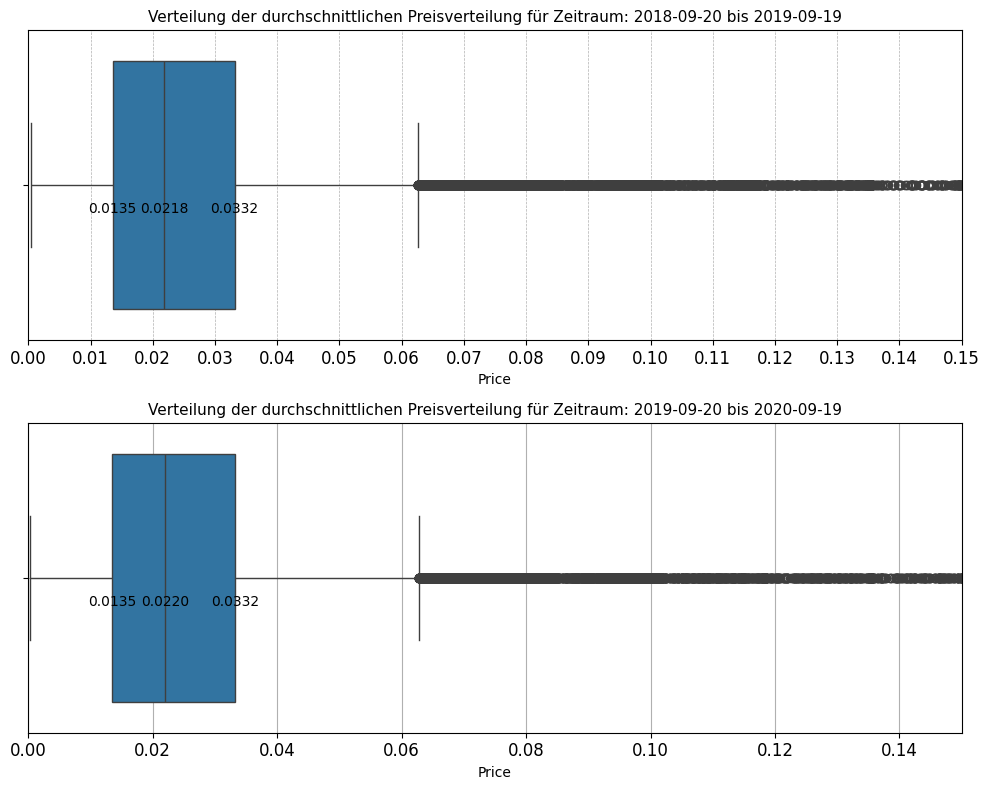

Durchschnittspreis für den Zeitraum 2018-09-20 - 2019-09-19: 0.0282
Durchschnittspreises für den Zeitraum 2018-09-20 - 2019-09-19: 0.0276
Prozentuale Änderung des Durchschnittspreises: -1.86%


In [ ]:
# Termine für die Einteilung festlegen / Определяем даты для разделения
split_date1 = pd.to_datetime('2019-09-20')
split_date2 = pd.to_datetime('2020-09-20')
# Teilen Sie die Daten in zwei Zeiträume auf Разделяем данные на два периода
period1_transactions = df_transactions[df_transactions['t_dat'] < split_date1].copy()
period2_transactions = df_transactions[(df_transactions['t_dat'] >= split_date1) & (df_transactions['t_dat'] < split_date2)].copy()
# Hinzufügen einer Periodenspalte / Добавляем колонку периода
period1_transactions['period'] = '2018-09-20 to 2019-09-19'
period2_transactions['period'] = '2019-09-20 to 2020-09-19'
# Kombinieren Daten aus zwei Zeiträumen / Объединяем данные двух периодов
all_transactions = pd.concat([period1_transactions, period2_transactions])

# Visualisierung der durchschnittlichen Preisverteilung mittels Boxplot für jeden Zeitraum
# Визуализация распределения среднего прайса с помощью box plot для каждого периода
plt.figure(figsize=(10, 8))

# Daten auf Zeitraum 1 und 2 /  Данные для периода 1 и 2
# Berechnung des Durchschnittspreises für jeden Artikel für jeden Zeitraum / Вычисление среднего прайса по каждой позиции для каждого периода
avg_price_per_article_period1 = period1_transactions.groupby('article_id')['price'].mean().reset_index(name='avg_price')
avg_price_per_article_period2 = period2_transactions.groupby('article_id')['price'].mean().reset_index(name='avg_price')

# Boxplot für Zeitraum 1 / Box plot для периода 1
plt.subplot(2, 1, 1)
sns.boxplot(x=avg_price_per_article_period1['avg_price'])
plt.title('Verteilung der durchschnittlichen Preisverteilung für Zeitraum: 2018-09-20 bis 2019-09-19', fontsize=11)
plt.xlabel('Price')
plt.xlim(0, 0.15)
plt.xticks(np.arange(0, 0.16, 0.01))  # Установка тиков с шагом 0.01
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)  # Включение сетки с интервалом 0.01

# Berechnung von Quartilen / Вычисление квартилей
quartiles1_avg = avg_price_per_article_period1['avg_price'].quantile([0.25, 0.5, 0.75]).values
# Anmerkungen für Quartile hinzufügen / Добавление аннотаций для квартилей
for q, value in zip([0.25, 0.5, 0.75], quartiles1_avg):
    plt.annotate(f'{value:.4f}', xy=(value, 0.01), xytext=(value, 0.1),
                 textcoords='data', ha='center', va='bottom',
                 fontsize=10, color='black')
plt.xticks(fontsize=12)

# Boxplot für Zeitraum 2 / Box plot для периода 2
plt.subplot(2, 1, 2)
sns.boxplot(x=avg_price_per_article_period2['avg_price'])
plt.title('Verteilung der durchschnittlichen Preisverteilung für Zeitraum: 2019-09-20 bis 2020-09-19', fontsize=11)
plt.xlabel('Price')
plt.xlim(0, 0.15)
plt.grid(True)

# Berechnung von Quartilen / Вычисление квартилей
quartiles2_avg = avg_price_per_article_period2['avg_price'].quantile([0.25, 0.5, 0.75]).values
# Anmerkungen für Quartile hinzufügen / Добавление аннотаций для квартилей
for q, value in zip([0.25, 0.5, 0.75], quartiles2_avg):
    plt.annotate(f'{value:.4f}', xy=(value, 0.01), xytext=(value, 0.1),
                 textcoords='data', ha='center', va='bottom',
                 fontsize=10, color='black')
plt.xticks(fontsize=12)

plt.tight_layout()
#plt.savefig('/content/DurchschnittlichenPreisverteilungZweiPeriodeBoxPlot.png')
plt.show()

avg_price_period1 = avg_price_per_article_period1['avg_price'].mean()
avg_price_period2 = avg_price_per_article_period2['avg_price'].mean()
print(f"Durchschnittspreis für den Zeitraum 2018-09-20 - 2019-09-19: {avg_price_period1:.4f}")
print(f"Durchschnittspreises für den Zeitraum 2018-09-20 - 2019-09-19: {avg_price_period2:.4f}")
# Berechnung der prozentualen Änderung / Вычисление процентного изменения
percent_change_price = ((avg_price_period2 - avg_price_period1) / avg_price_period1) * 100
print(f"Prozentuale Änderung des Durchschnittspreises: {percent_change_price:.2f}%")

In [ ]:
avg_price_per_article_period1.describe()

article_id  avg_price
count     70873.0000 70873.0000
mean  643041885.1231     0.0282
std   103203941.2455     0.0260
min   108775015.0000     0.0004
25%   582462004.0000     0.0135
50%   654951002.0000     0.0218
75%   716550001.0000     0.0332
max   845541001.0000     0.5068

In [ ]:
avg_price_per_article_period2.describe()

article_id  avg_price
count     70857.0000 70857.0000
mean  735769173.0903     0.0276
std   123625194.3446     0.0252
min   108775015.0000     0.0002
25%   671505004.0000     0.0135
50%   753372003.0000     0.0220
75%   825139002.0000     0.0332
max   956217002.0000     0.5068

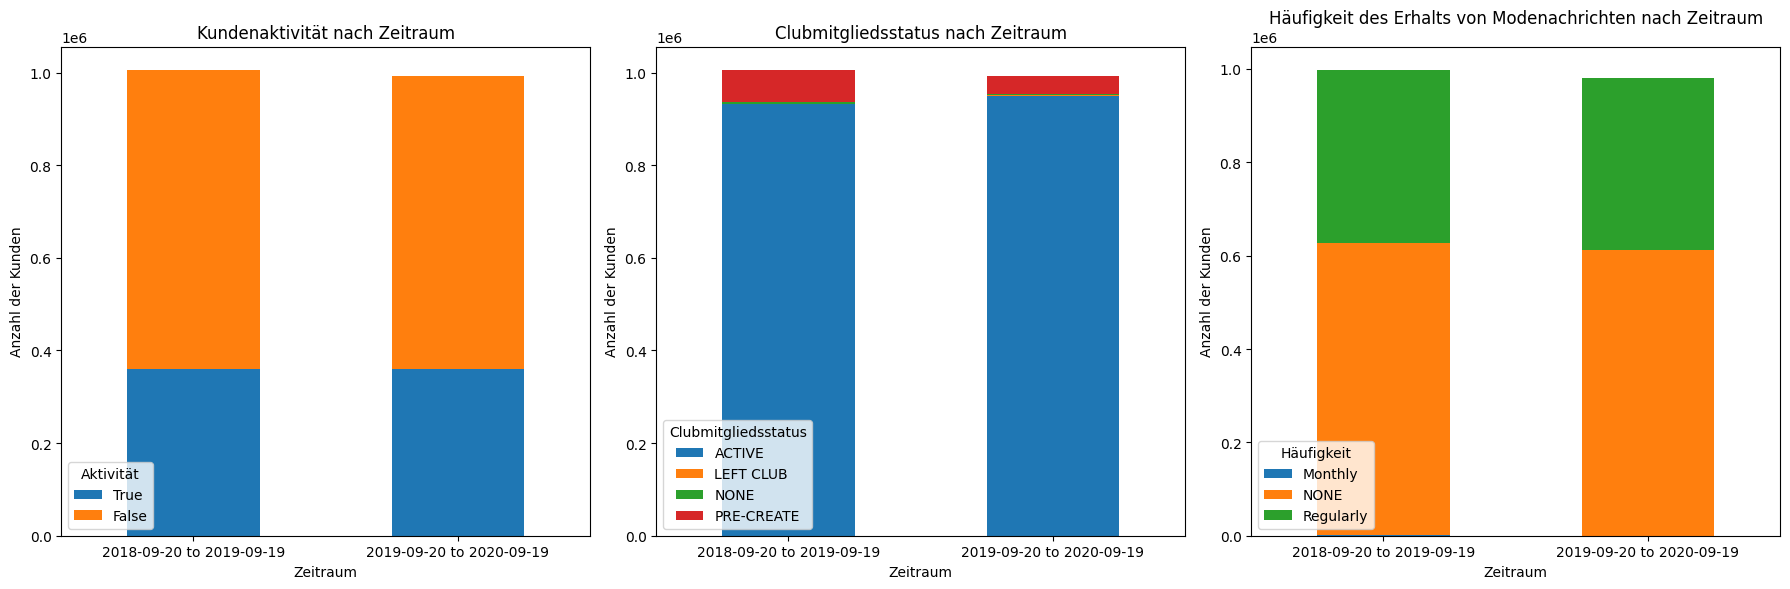

In [ ]:
# Termine für die Einteilung festlegen / Определяем даты для разделения
split_date1 = pd.to_datetime('2019-09-20')
split_date2 = pd.to_datetime('2020-09-20')
# Teilen Sie die Daten in zwei Zeiträume auf Разделяем данные на два периода
period1_transactions = df_transactions[df_transactions['t_dat'] < split_date1]
period2_transactions = df_transactions[(df_transactions['t_dat'] >= split_date1) & (df_transactions['t_dat'] < split_date2)]
# Entfernen Duplikate auf der Ebene „customer_id“ für jeden Zeitraum / Удаляем дубликаты на уровне customer_id для каждого периода
period1_grouped = period1_transactions.drop_duplicates(subset='customer_id').reset_index(drop=True)
period2_grouped = period2_transactions.drop_duplicates(subset='customer_id').reset_index(drop=True)
# Hinzufügen einer Periodenspalte / Добавляем колонку периода
period1_grouped['period'] = '2018-09-20 to 2019-09-19'
period2_grouped['period'] = '2019-09-20 to 2020-09-19'
# Kombinieren Daten aus zwei Zeiträumen / Объединяем данные двух периодов
grouped_data = pd.concat([period1_grouped, period2_grouped])
# Wir kombinieren Daten mit Kundeninformationen / Объединяем данные с информацией о клиентах
merged_data = pd.merge(grouped_data, df_customers, on='customer_id', how='left')

# Erstellen eines Figuren- und Subplot-Arrays mit einer Zeile und drei Spalten / Создание фигуры и массива подграфиков с одной строкой и тремя столбцами
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Analyse der Kundenaktivität / Анализ активности клиентов
active_counts = merged_data.pivot_table(index='period', columns='Active', values='customer_id', aggfunc='count', fill_value=0)
active_counts = active_counts.reindex(columns=[True, False])
active_counts.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Kundenaktivität nach Zeitraum')
axes[0].set_xlabel('Zeitraum')
axes[0].set_ylabel('Anzahl der Kunden')
axes[0].legend(title='Аktivität', loc='lower left')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Analyse des Status der Clubmitglieder / Анализ статуса членов клуба
club_status_counts = merged_data.pivot_table(index='period', columns='club_member_status', values='customer_id', aggfunc='count', fill_value=0)
club_status_counts.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Clubmitgliedsstatus nach Zeitraum')
axes[1].set_xlabel('Zeitraum')
axes[1].set_ylabel('Anzahl der Kunden')
axes[1].legend(title='Clubmitgliedsstatus', loc='lower left')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

# Analyse der Häufigkeit des Empfangs von Modenachrichten / Анализ частоты получения модных новостей
fashion_news_counts = merged_data.pivot_table(index='period', columns='fashion_news_frequency', values='customer_id', aggfunc='count', fill_value=0)
fashion_news_counts.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Häufigkeit des Erhalts von Modenachrichten nach Zeitraum')
axes[2].set_xlabel('Zeitraum')
axes[2].set_ylabel('Anzahl der Kunden')
axes[2].legend(title='Häufigkeit', loc='lower left')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)

plt.tight_layout()
#plt.savefig('/content/АktivitätClubmitgliedsstatusHäufigkeit.png')
plt.show()
